# Imports and filter creation

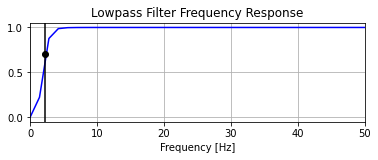

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.fftpack
import librosa
from scipy.signal import butter, lfilter, freqz, sosfreqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(highcut, fs, order=1):
    nyq = 0.5 * fs
    high = highcut / nyq
    b = butter(order, high, btype='high', output='sos')
    return b

def butter_highpass_filter(data, highcut, fs, order=1):
    b= butter_highpass(highcut, fs, order=order)
    y = sosfiltfilt(b, data)
    return y

# Filter requirements.
order = 3
fs = 22500.0       # sample rate, Hz
cutoff = 2.3  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b = butter_highpass(cutoff, fs, order)

# Plot the frequency response.
w, h = sosfreqz(b, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 50)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [8]:
"""
data format: array of {x:x,y:[y1,y2,y3,...],xlabel:xlabel,ylabel:ylabel,xlim:(),ylim:(),legends=[]}
"""
from matplotlib.pyplot import figure
def plotting(data):
    for i in range(len(data["y"])):
        figure(figsize=(20, 6), dpi=80)
        plt.plot(data["x"],data["y"][i],label=data["legends"][i])
        plt.ylabel(data["ylabel"])
        plt.xlabel(data["xlabel"])
        plt.ylim(data["ylim"])
        plt.xlim(data["xlim"])
        plt.grid()
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plt.show()

In [9]:
def get_fft(signal, length, num_samples):
    return scipy.fftpack.fft(signal), np.linspace(0.0, 1.0/(2.0*length), num_samples//2)

# Filtering the modulated signal

In [539]:
audio, sr = librosa.load('rhythms.wav')
num_samples = 22050
length = 1/sr

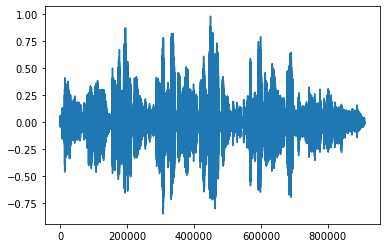

In [540]:
plt.plot(audio)

In [541]:
sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)
cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
sin_modulated = audio[:22050]*sin_modulation
cos_modulated = audio[:22050]*cos_modulation

[-7.46746798e-07 -3.91743677e-06 -9.97945114e-06 ... -5.79781084e-03
 -3.26071961e-03 -5.64059413e-04]


ValueError: x and y must have same first dimension, but have shapes (44100,) and (22050,)

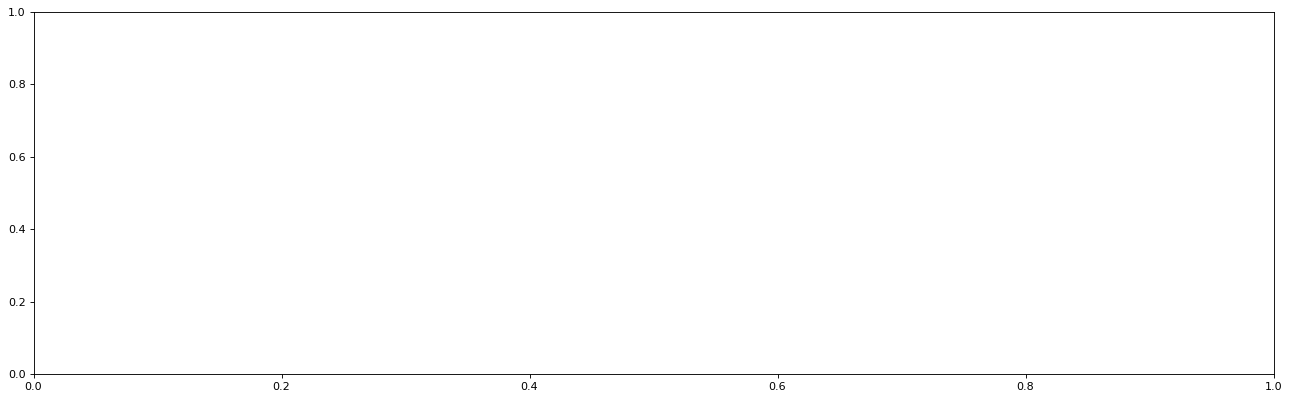

In [687]:
cutoff = 50
order = 2

signal_filtered = butter_lowpass_filter(sin_modulated, cutoff, fs, order)
signal_filtered_cos = butter_lowpass_filter(cos_modulated, cutoff, fs, order)

sin_demod = 2*signal_filtered*sin_modulation
cos_demod = 2*signal_filtered_cos*cos_modulation

summed = sin_demod+cos_demod
print(summed)

plot_sins = {"x": x, "y":[audio[:22050], sin_demod, cos_demod, summed], "legends": ["signal", "sin_demod", "cos_demod", "summed"], 
             "xlabel": "time", "ylabel": "amp", "xlim": (0,0.1), "ylim": (-1,1)}

fft_sig, x_fft = get_fft(audio[:22050],length,num_samples)
fft_modulation = scipy.fftpack.fft(sin_modulation)
fft_modulated = scipy.fftpack.fft(sin_modulated)
fft_filtered = scipy.fftpack.fft(signal_filtered)
fft_demod = scipy.fftpack.fft(sin_demod)

fft_modulation_cos = scipy.fftpack.fft(cos_modulation)
fft_modulated_cos = scipy.fftpack.fft(cos_modulated)
fft_filtered_cos = scipy.fftpack.fft(signal_filtered_cos)
fft_demod_cos = scipy.fftpack.fft(cos_demod)

fft_fin = scipy.fftpack.fft(summed)

plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
            "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
            "xlim": (0,3200), "ylim": (0,0.02)}

plot_fft_cos = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_modulation_cos[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated_cos[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered_cos[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod_cos[:num_samples//2]), 2.0/num_samples * np.abs(fft_fin[:num_samples//2])], 
            "legends": ["cos modulation", "cos modulated", "cos filtered", "cos demod", "summed"], "xlabel": "frequency", "ylabel": "amp", 
            "xlim": (0,3200), "ylim": (0,0.02)}

plotting(plot_sins)
plotting(plot_fft)
plotting(plot_fft_cos)

# cos modulation

In [535]:
from scipy import signal
signal_frequencies = [i for i in range(10,3000,30)]
f_modulation = 1000 #Hz
fs = 22050 #sampling freq
num_samples = fs
length = 1/fs ## seconds

0.018140589569160998


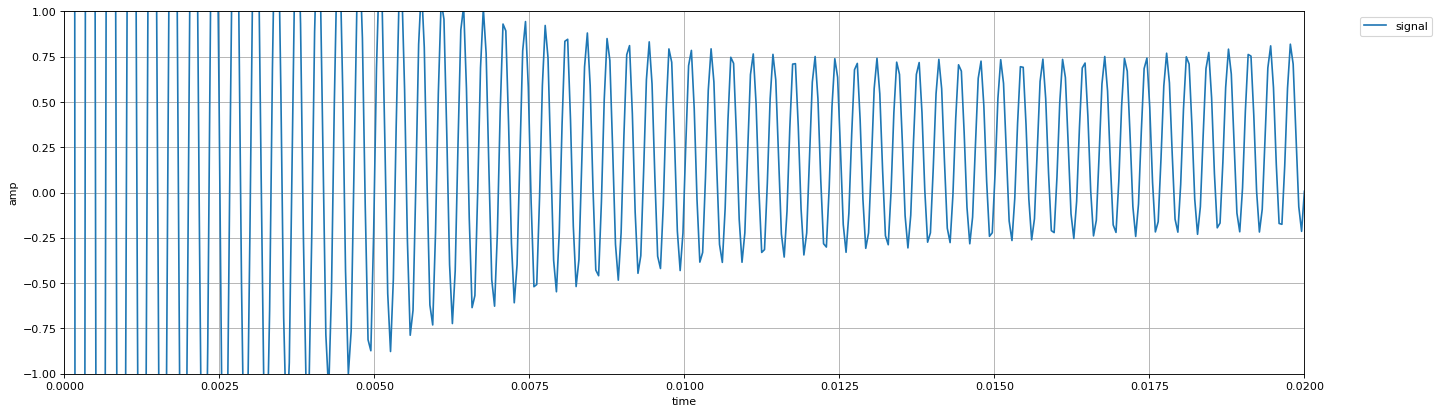

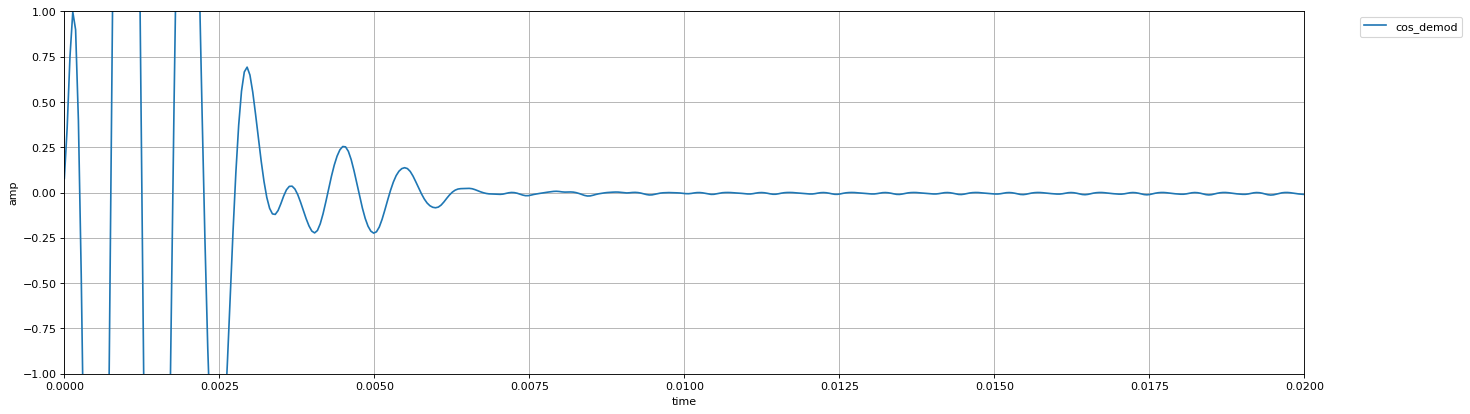

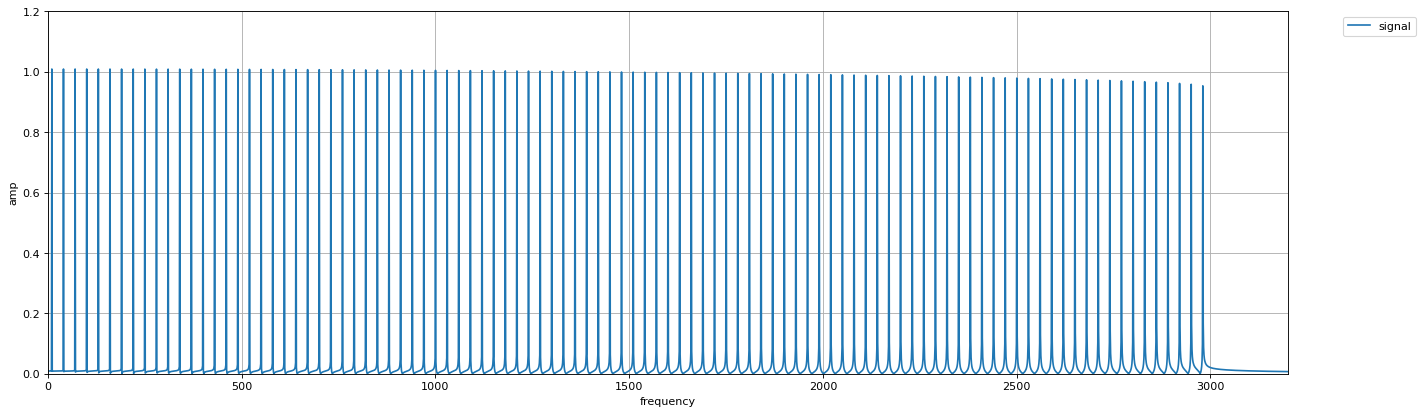

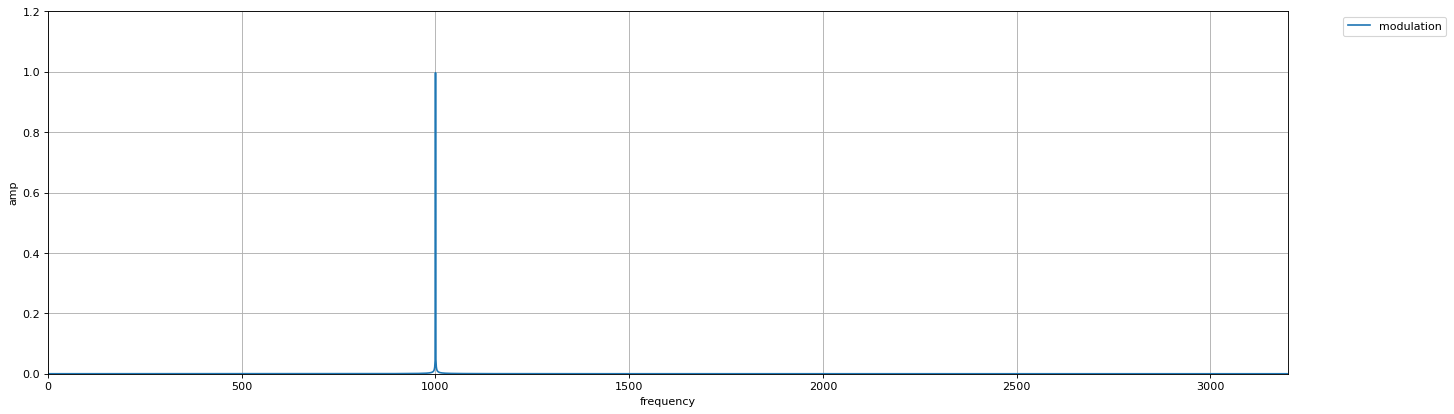

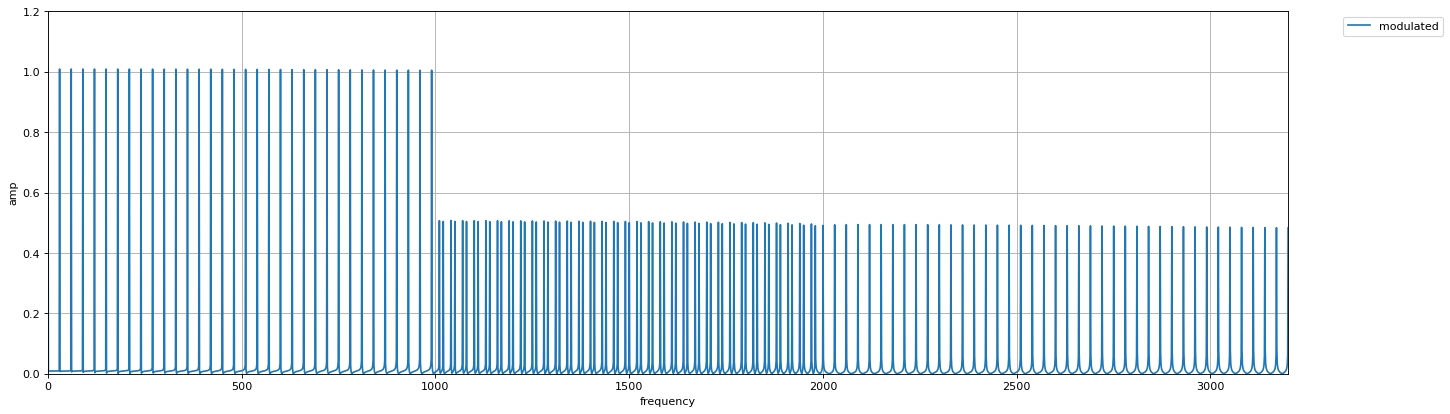

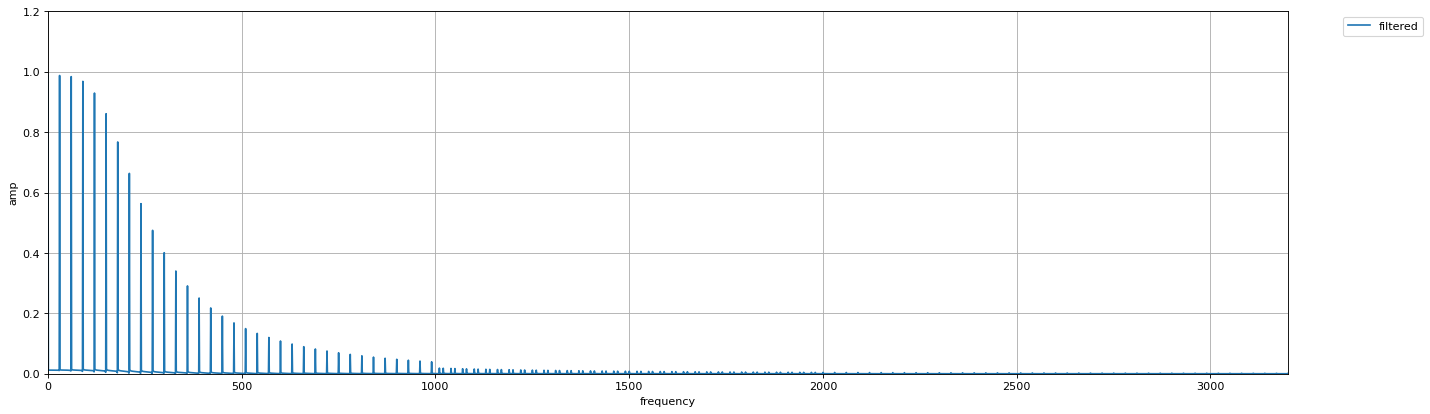

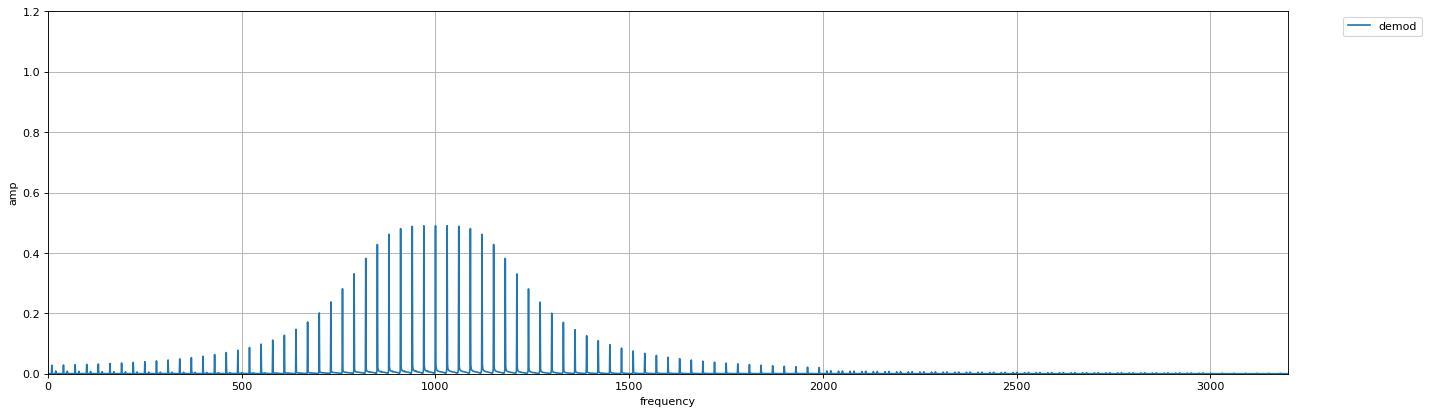

In [536]:
"""
plot_xxxx = {"x": , "y": , "legends": , "xlabel": , "ylabel": , "xlim": (), "ylim": ()}
Frequencies
"""
amp_signal = 1
phase_signal = 0

amp_modulation = 1
phase_modulation = 0

x = np.linspace(0.0, num_samples*length, num_samples)

cos_sig = 0
for i in signal_frequencies:
    cos_sig += amp_signal*np.cos(2*np.pi*i*(x)+phase_signal)

cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
cos_modulated = cos_sig*cos_modulation

cutoff = 200
order = 2

signal_filtered = butter_lowpass_filter(cos_modulated, cutoff, fs, order)

cos_demod = signal_filtered*cos_modulation

plot_waves = {"x": x, "y":[cos_sig, cos_demod], "legends": ["signal", "cos_demod"], 
             "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1,1)}

fft_sig, x_fft = get_fft(cos_sig,length,num_samples)
fft_modulation = scipy.fftpack.fft(cos_modulation)
fft_modulated = scipy.fftpack.fft(cos_modulated)
fft_filtered = scipy.fftpack.fft(signal_filtered)
fft_demod = scipy.fftpack.fft(cos_demod)

plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
            "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
            "xlim": (0,3200), "ylim": (0,1.2)}

plotting(plot_waves)
plotting(plot_fft)

# sin modulation 

0.018140589569160998


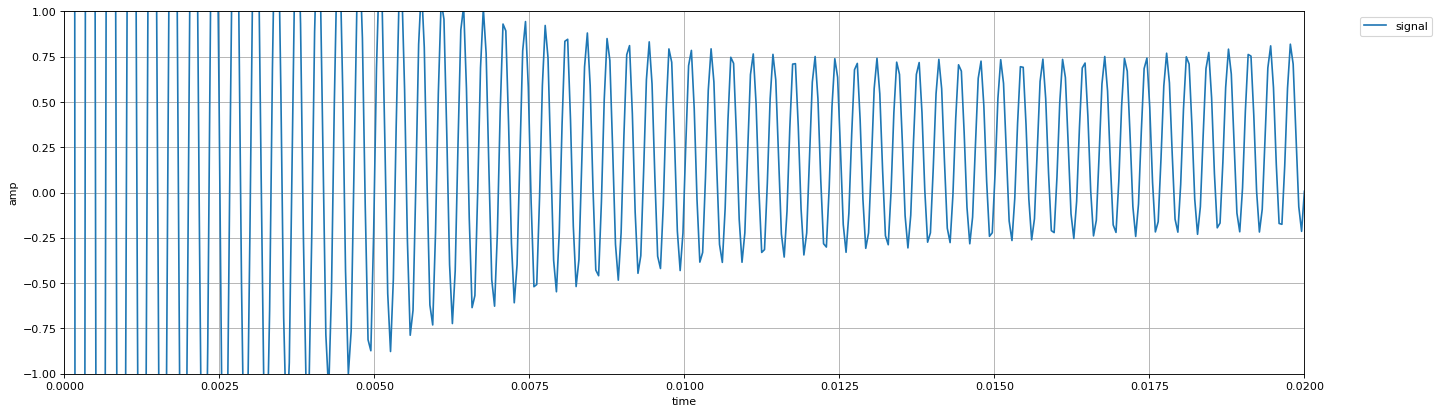

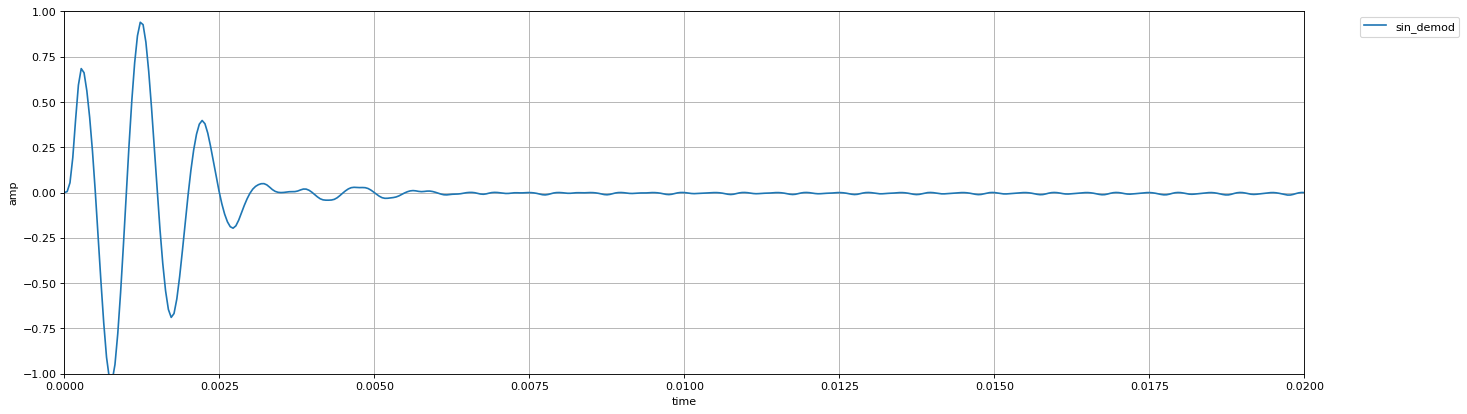

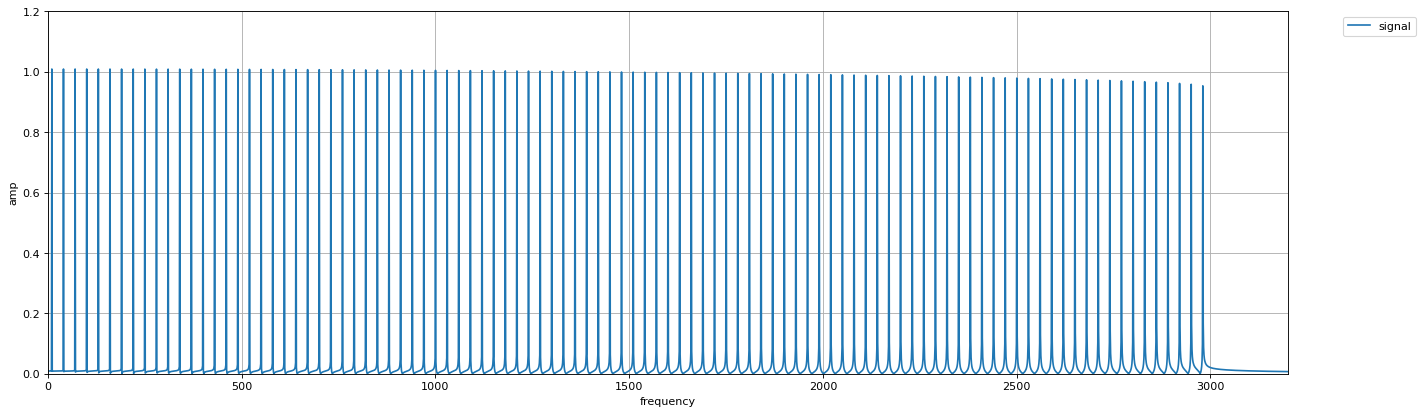

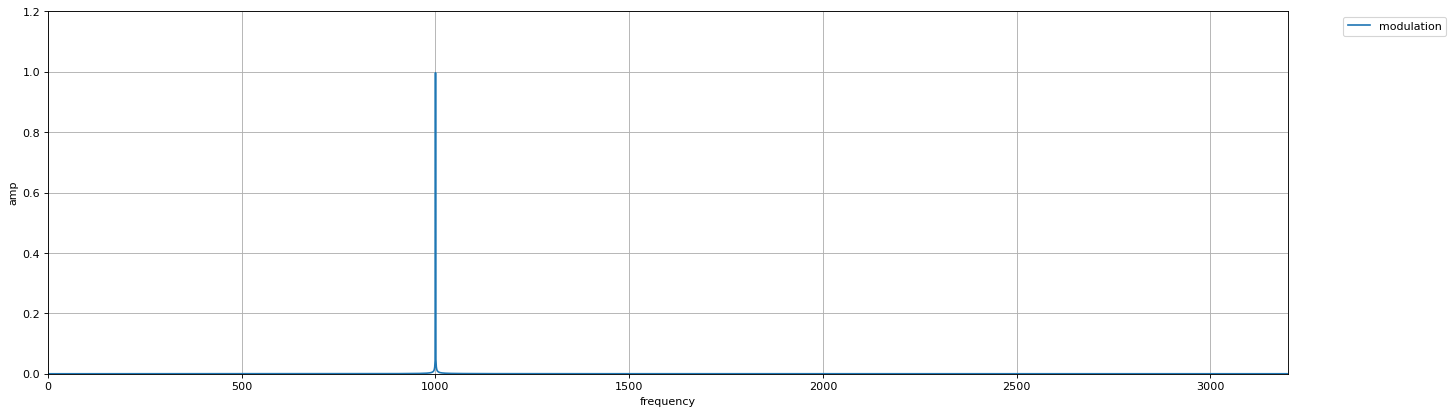

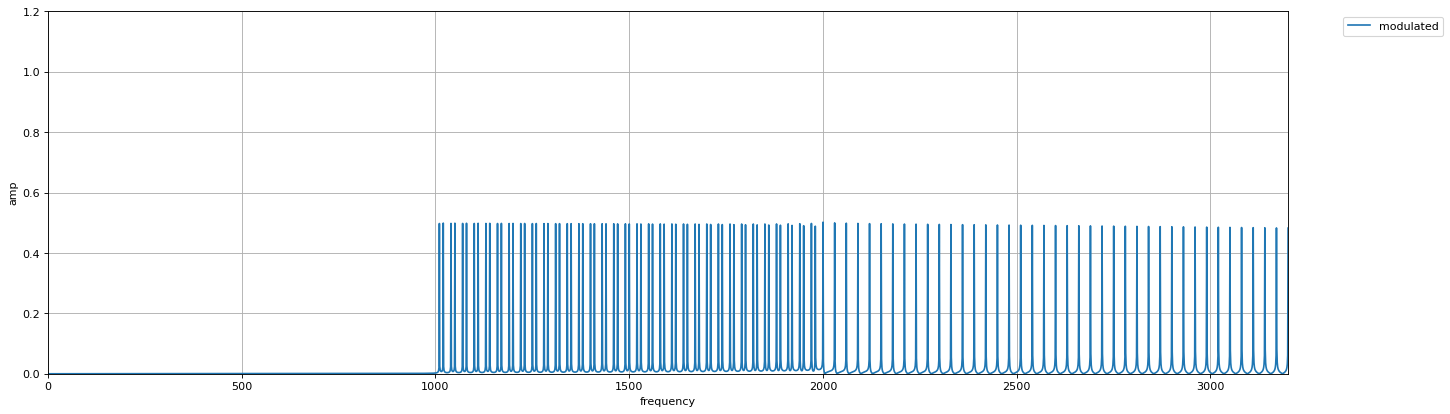

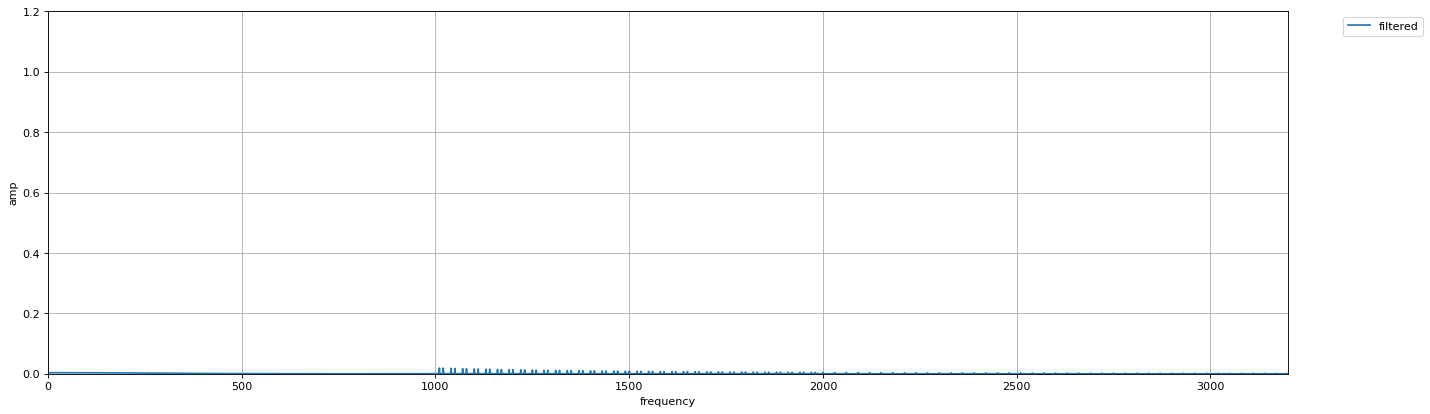

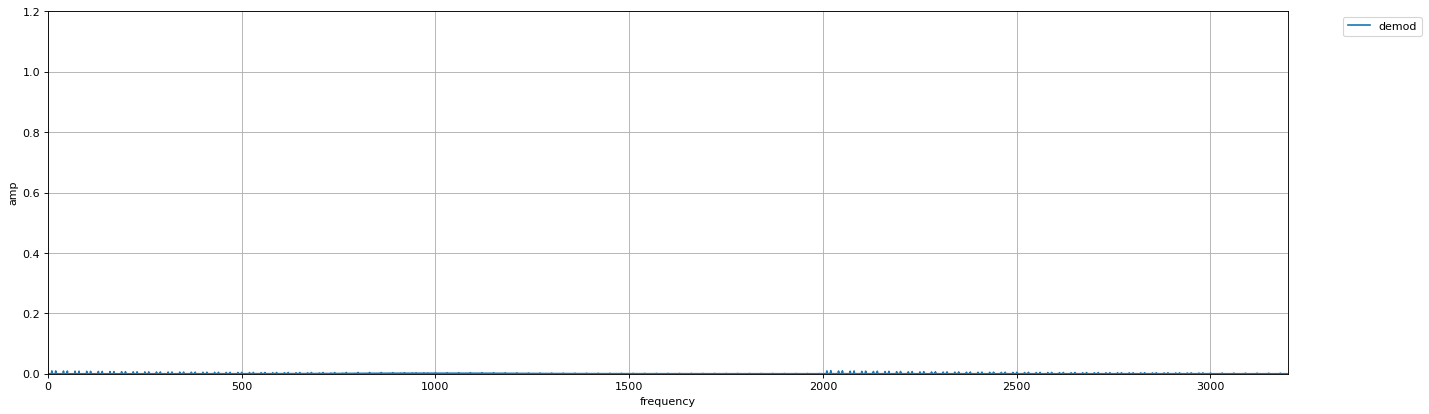

In [537]:
"""
plot_xxxx = {"x": , "y": , "legends": , "xlabel": , "ylabel": , "xlim": (), "ylim": ()}
Frequencies
"""
amp_signal = 1
phase_signal = 0

amp_modulation = 1
phase_modulation = 0

x = np.linspace(0.0, num_samples*length, num_samples)

sin_sig = 0
for i in signal_frequencies:
    sin_sig += amp_signal*np.cos(2*np.pi*i*(x)+phase_signal)

sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)
sin_modulated = sin_sig*sin_modulation

cutoff = 200 ## Q of 12
order = 2

signal_filtered = butter_lowpass_filter(sin_modulated, cutoff, fs, order)

sin_demod = signal_filtered*sin_modulation

plot_waves = {"x": x, "y":[sin_sig, sin_demod], "legends": ["signal", "sin_demod"], 
             "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1,1)}

fft_sig, x_fft = get_fft(sin_sig,length,num_samples)
fft_modulation = scipy.fftpack.fft(sin_modulation)
fft_modulated = scipy.fftpack.fft(sin_modulated)
fft_filtered = scipy.fftpack.fft(signal_filtered)
fft_demod = scipy.fftpack.fft(sin_demod)

plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
            "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
            "xlim": (0,3200), "ylim": (0,1.2)}

plotting(plot_waves)
plotting(plot_fft)

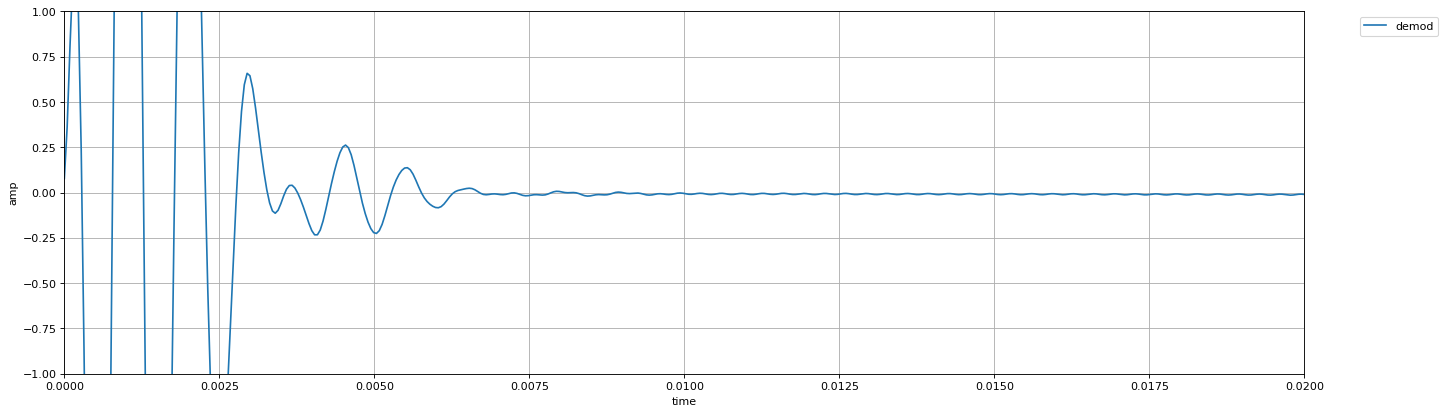

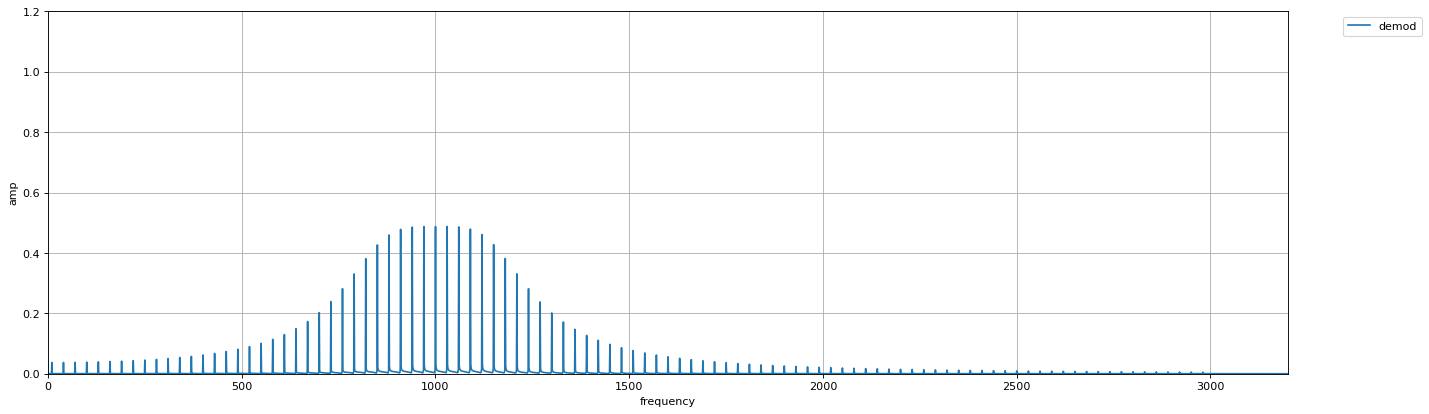

In [538]:
demod = sin_demod+cos_demod

plot_waves = {"x": x, "y":[demod], "legends": ["demod"], 
             "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1,1)}

fft_sig, x_fft = get_fft(demod,length,num_samples)

plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2])],
            "legends": ["demod"], "xlabel": "frequency", "ylabel": "amp", 
            "xlim": (0,3200), "ylim": (0,1.2)}

plotting(plot_waves)
plotting(plot_fft)

In [749]:
def do_demodulation(sig, fs, fm, ylimit_fft=1.2, ylimit_sig=1):
    f_modulation = fm
    fs = fs
    num_samples = fs
    length = 1/fs
    sig = sig[:num_samples]
    
    amp_modulation = 1
    phase_modulation = 0

    x = np.linspace(0.0, num_samples*length, num_samples)

    cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
    cos_modulated = sig*cos_modulation

    cutoff = f_modulation*64/(2*np.pi*75) ## Q of 12
    order = 3

    signal_filtered = butter_lowpass_filter(cos_modulated, cutoff, fs, order)

    cos_demod = signal_filtered*cos_modulation

    plot_waves = {"x": x, "y":[sig, cos_demod], "legends": ["signal", "cos_demod"], 
                 "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1*ylimit_sig,ylimit_sig)}

    fft_sig, x_fft = get_fft(sig,length,num_samples)
    fft_modulation = scipy.fftpack.fft(cos_modulation)
    fft_modulated = scipy.fftpack.fft(cos_modulated)
    fft_filtered = scipy.fftpack.fft(signal_filtered)
    fft_demod = scipy.fftpack.fft(cos_demod)

    plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
                "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
                "xlim": (0,3200), "ylim": (0,ylimit_fft)}

#     plotting(plot_waves)
    plotting(plot_fft)
    
    sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)
    sin_modulated = sig*sin_modulation

    cutoff = f_modulation*64/(2*np.pi*75) ## Q of 12
    order = 3

    signal_filtered = butter_lowpass_filter(sin_modulated, cutoff, fs, order)

    sin_demod = signal_filtered*sin_modulation

    plot_waves = {"x": x, "y":[sig, sin_demod], "legends": ["signal", "sin_demod"], 
                 "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1*ylimit_sig,ylimit_sig)}

    fft_sig, x_fft = get_fft(sig,length,num_samples)
    fft_modulation = scipy.fftpack.fft(sin_modulation)
    fft_modulated = scipy.fftpack.fft(sin_modulated)
    fft_filtered = scipy.fftpack.fft(signal_filtered)
    fft_demod = scipy.fftpack.fft(sin_demod)

    plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
                "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
                "xlim": (0,3200), "ylim": (0,ylimit_fft)}

#     plotting(plot_waves)
#     plotting(plot_fft)

    demod = sin_demod+cos_demod

    plot_waves = {"x": x, "y":[demod], "legends": ["demod"], 
                 "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1*ylimit_sig,ylimit_sig)}

    fft_sig, x_fft = get_fft(demod,length,num_samples)

    plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2])],
                "legends": ["demod_summed"], "xlabel": "frequency", "ylabel": "amp", 
                "xlim": (0,15000), "ylim": (0,ylimit_fft)}

#     plotting(plot_waves)
    plotting(plot_fft)

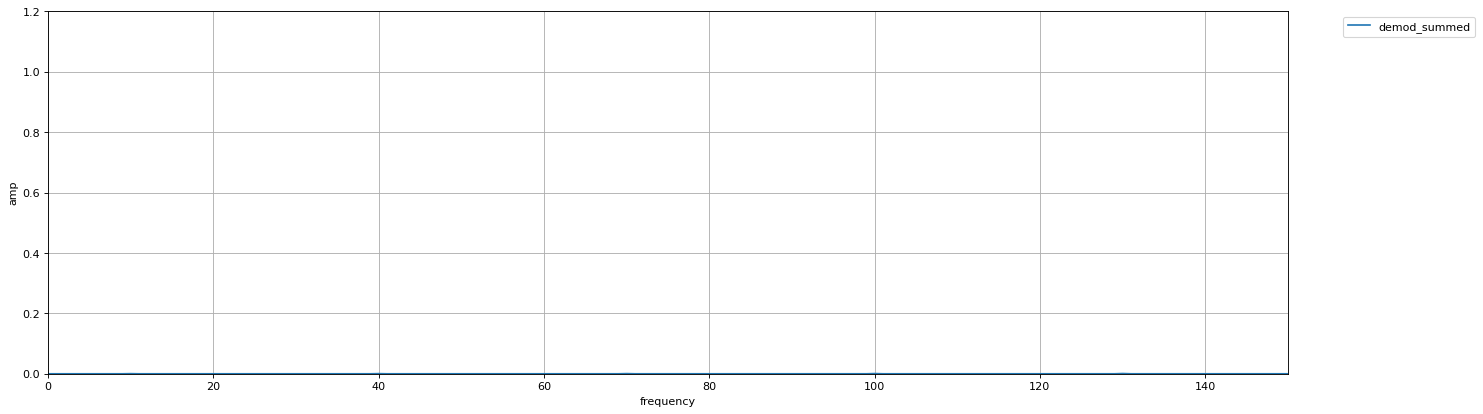

In [730]:
from scipy import signal
signal_frequencies = [i for i in range(10,15000,30)]
f_modulation = 1000 #Hz
fs = 44100 #sampling freq
num_samples = fs
length = 1/fs ## seconds

amp_signal = 1
phase_signal = 0

x = np.linspace(0.0, num_samples*length, num_samples)

sig = 0
for i in signal_frequencies:
    sig += amp_signal*np.cos(2*np.pi*i*(x)+phase_signal)

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
do_demodulation(sig, fs, f_modulation)

# Filter bank creation
### C8 = 4186.01
### D8=4698.63
### E8=5274.04
### F8=5587.65
### G8=6271.93
### A8=7040.00
### B8=7902.13

In [731]:
starting_fm = [7902, 7040, 6271, 5587, 5274, 4698, 4186]
single_bank_fm = []
for i in range(8):
    single_bank_fm.append(starting_fm[0]/(2**i))

In [750]:
signal_frequencies = [i for i in range(10,15000,1)]
fs = 44100 #sampling freq
num_samples = fs
length = 1/fs ## seconds

amp_signal = 1
phase_signal = 0

x = np.linspace(0.0, num_samples*length, num_samples)

sig = 0
for i in signal_frequencies:
    sig += amp_signal*np.cos(2*np.pi*i*(x)+phase_signal)

[4186.0, 2093.0, 1046.5, 523.25, 261.625, 130.8125, 65.40625, 32.703125]
[1705.529834963645, 852.7649174818225, 426.38245874091126, 213.19122937045563, 106.59561468522782, 53.29780734261391, 26.648903671306954, 13.324451835653477]


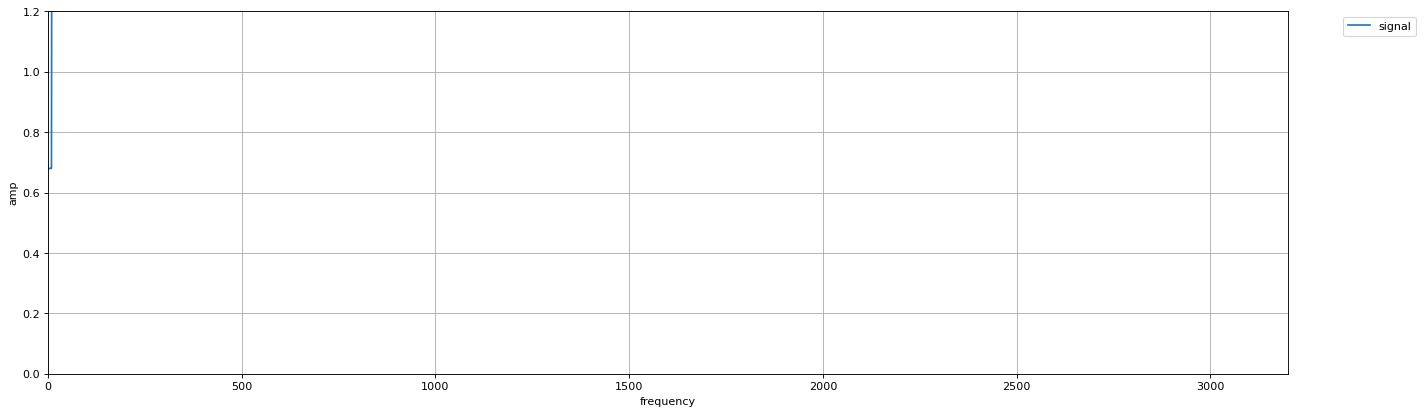

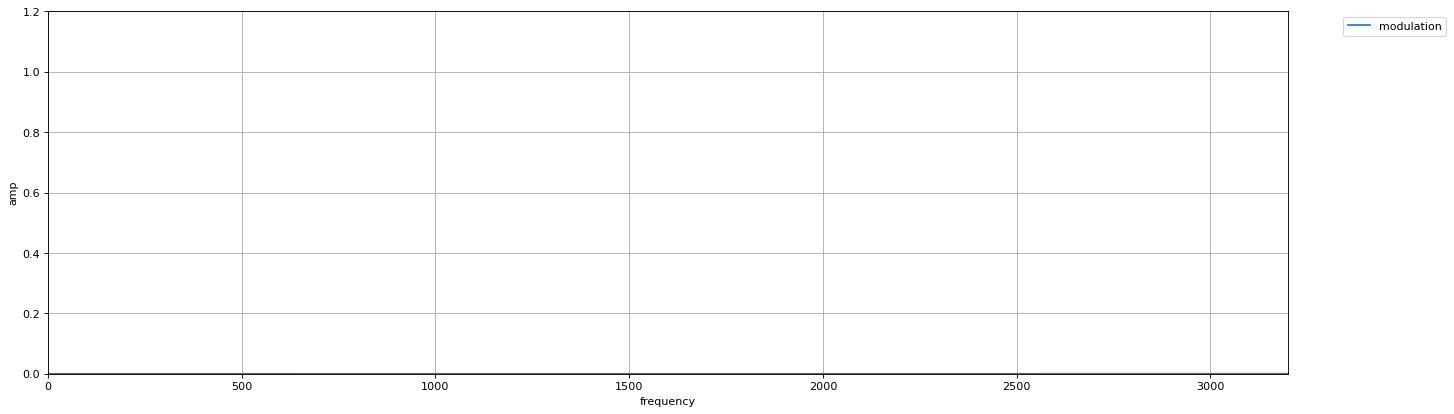

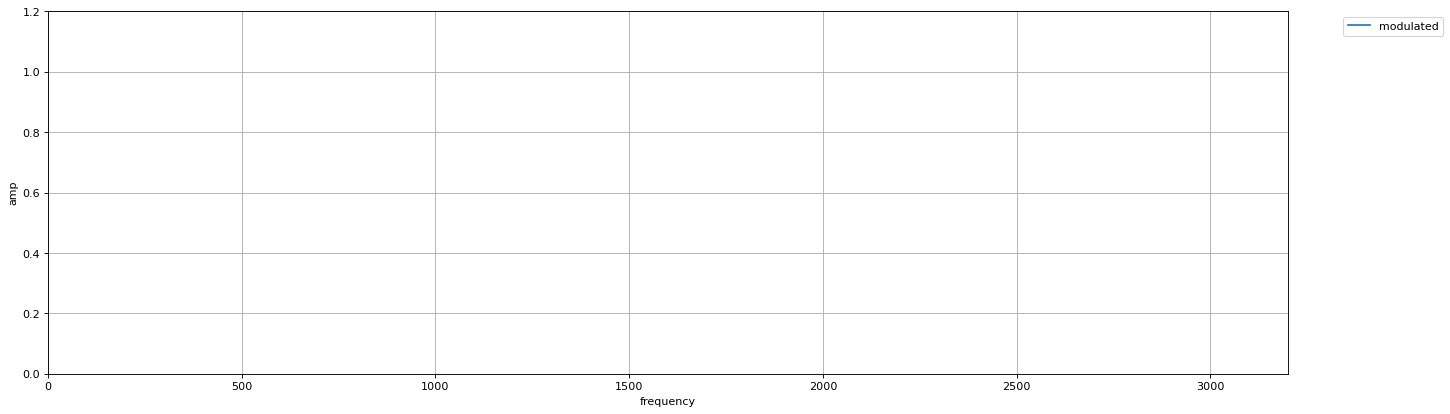

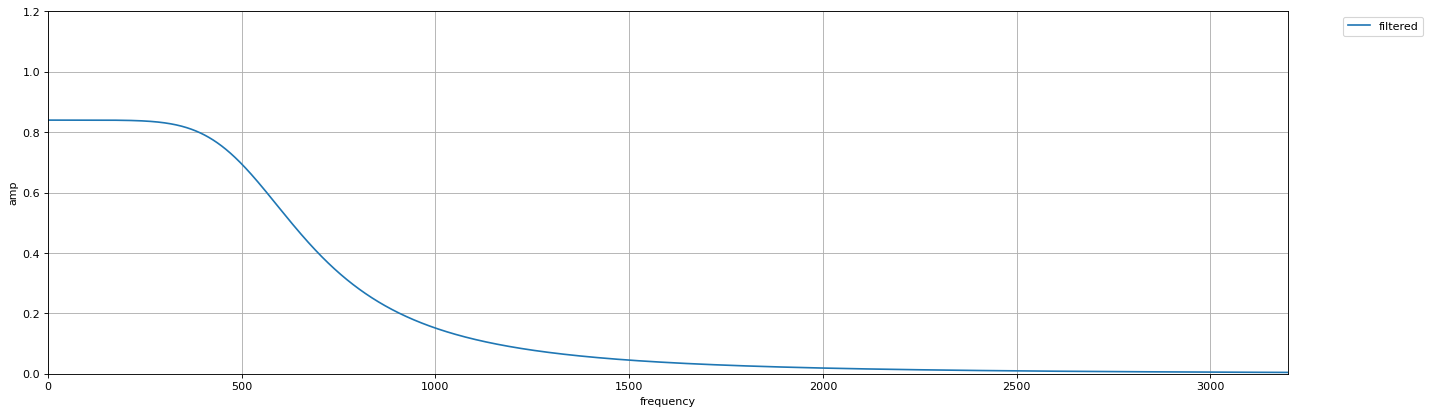

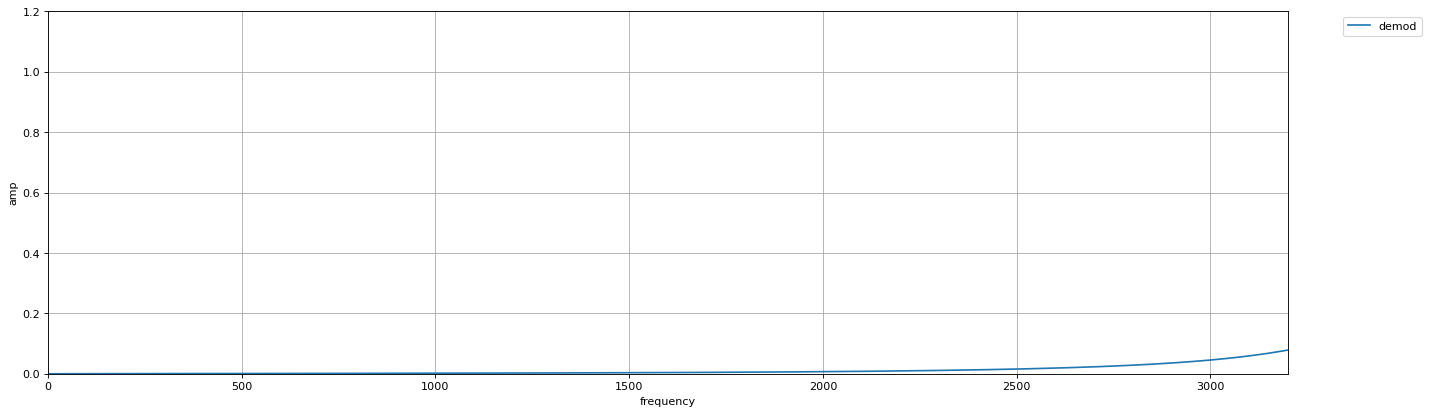

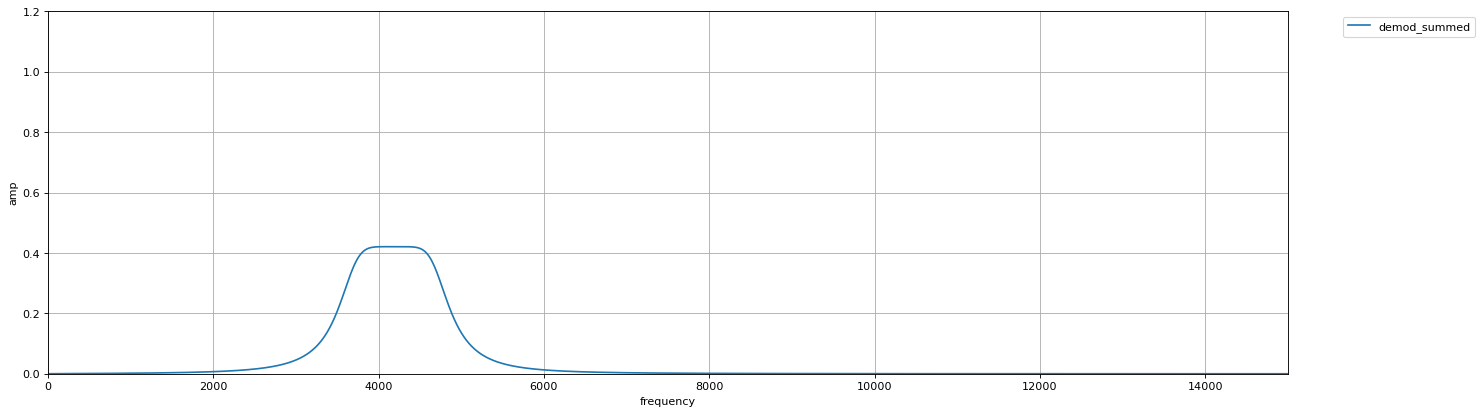

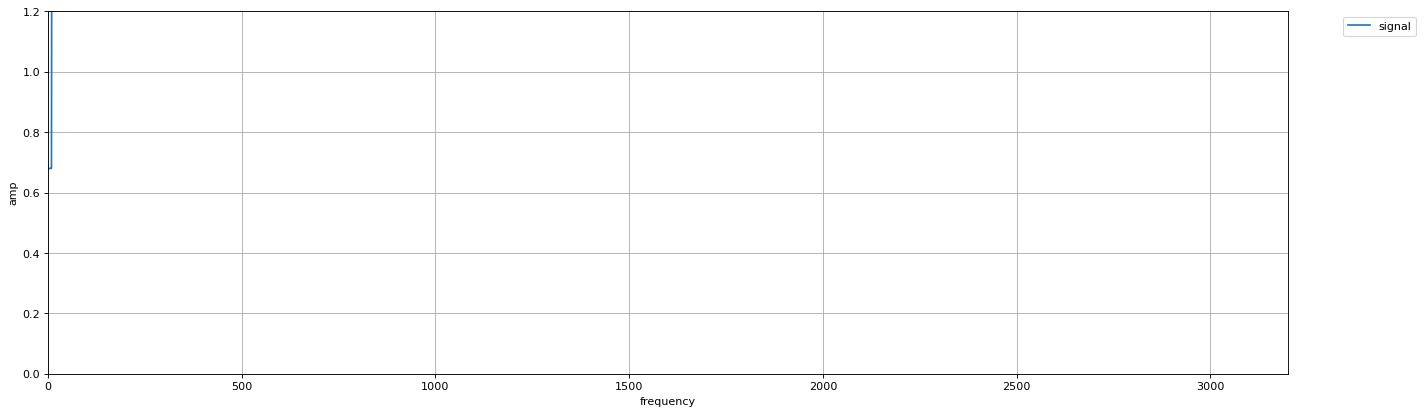

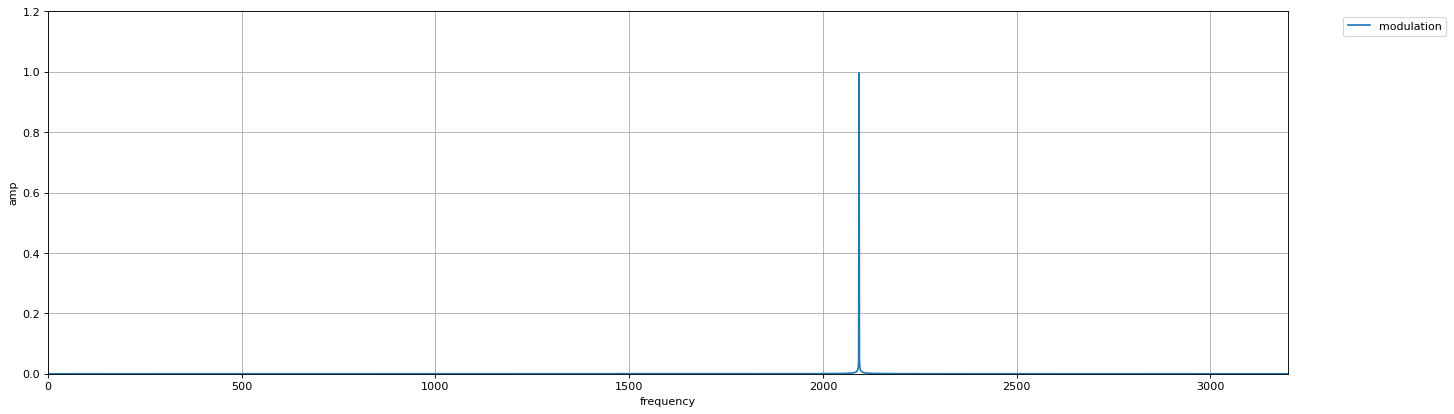

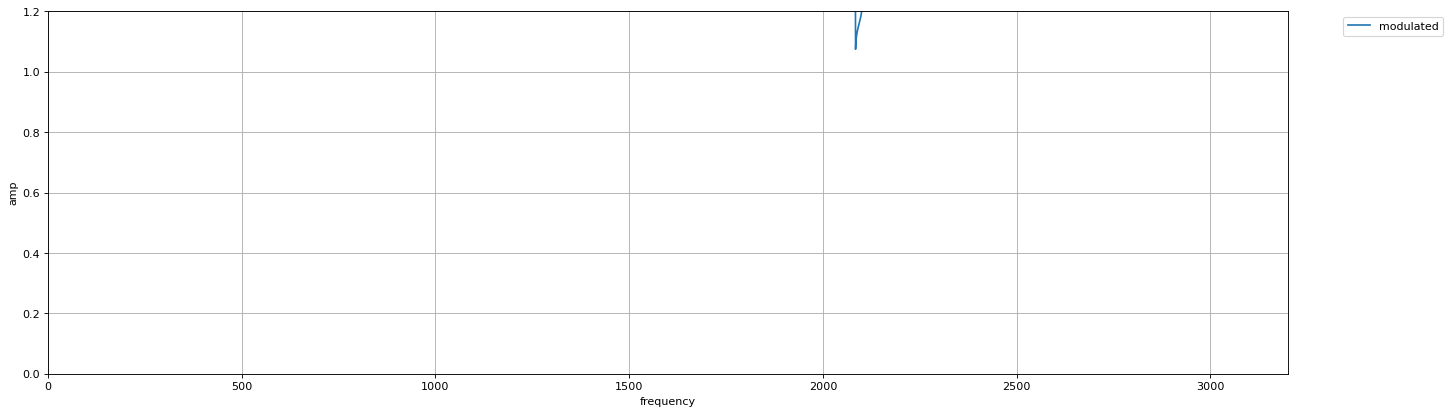

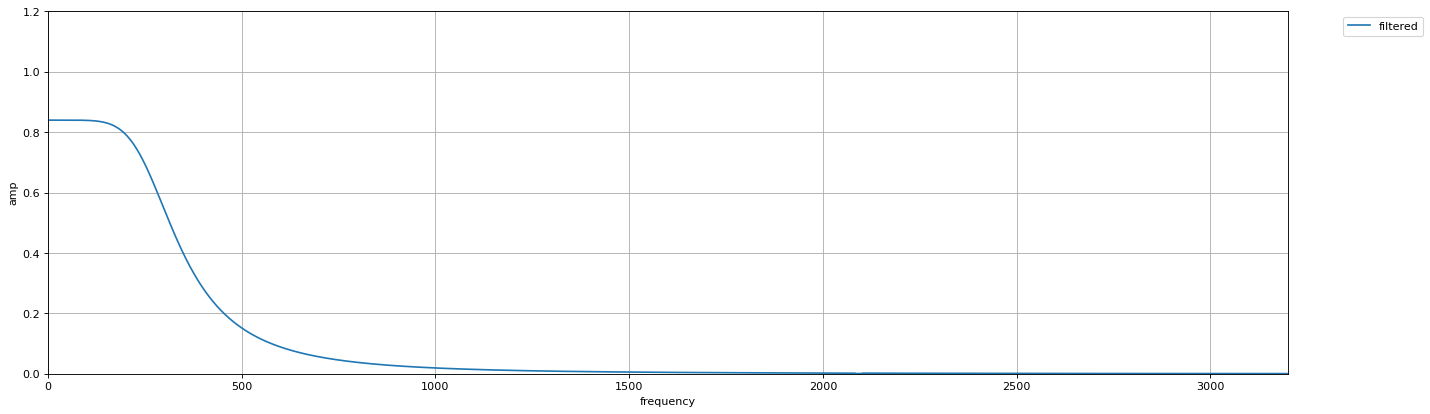

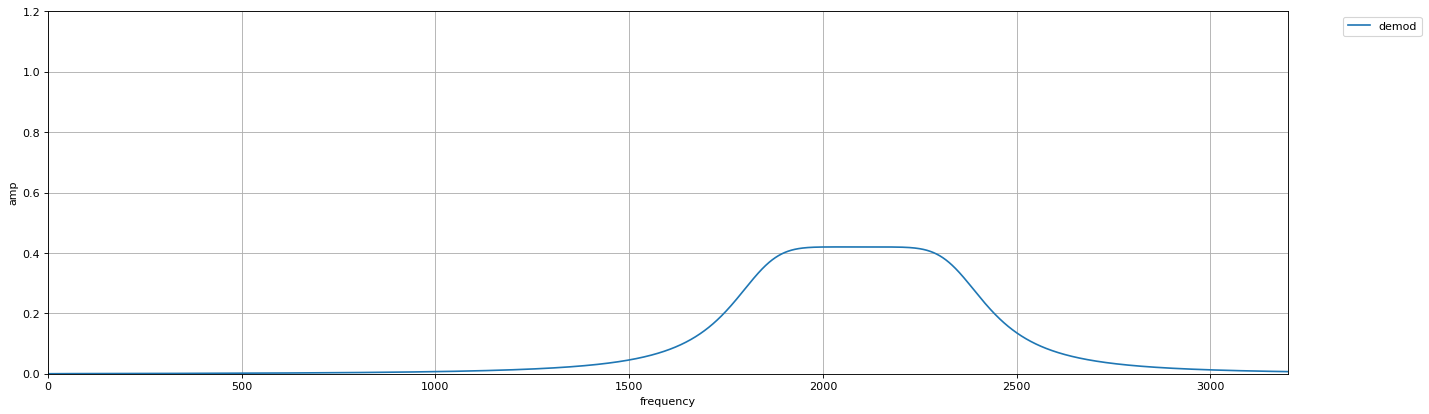

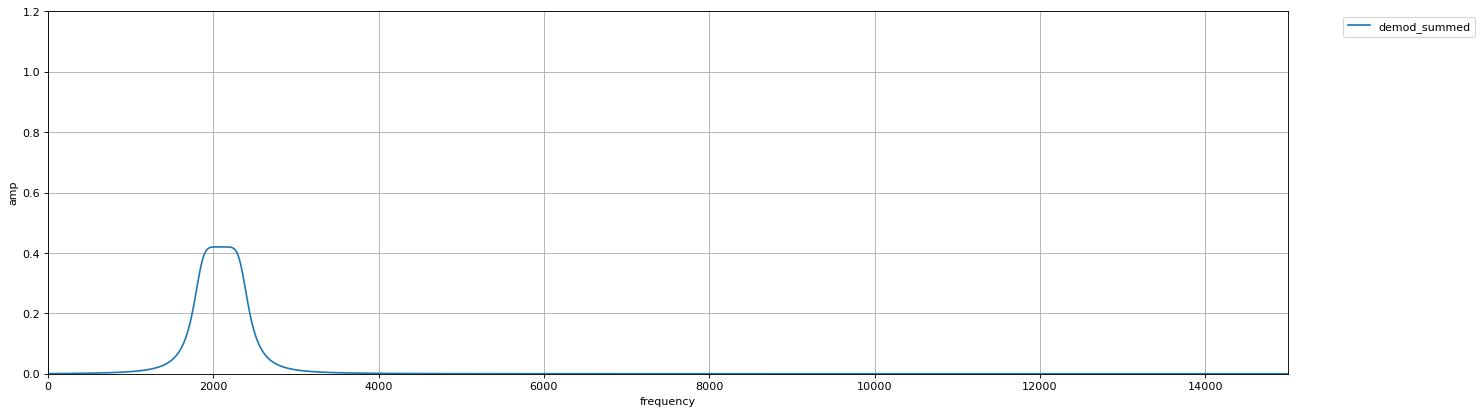

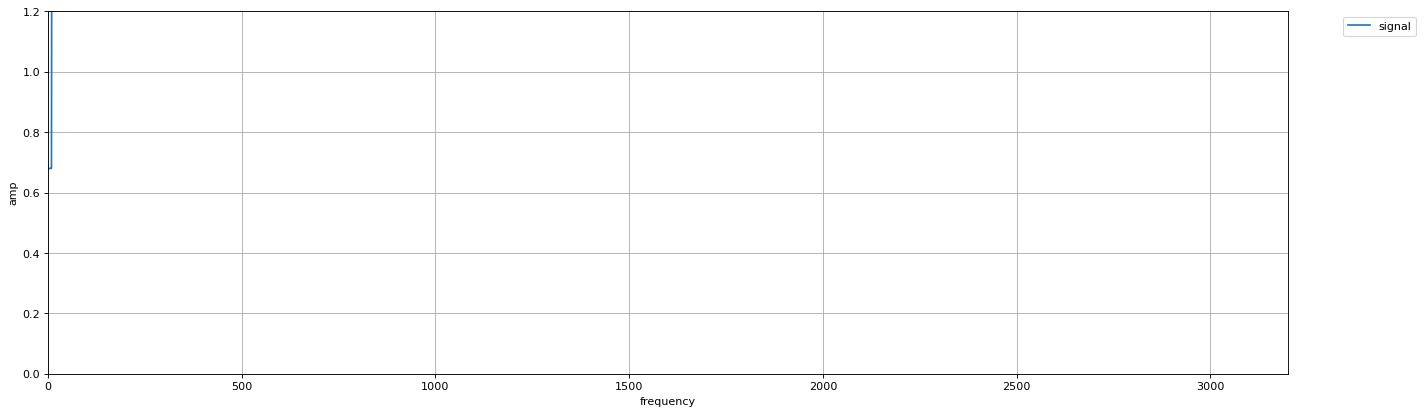

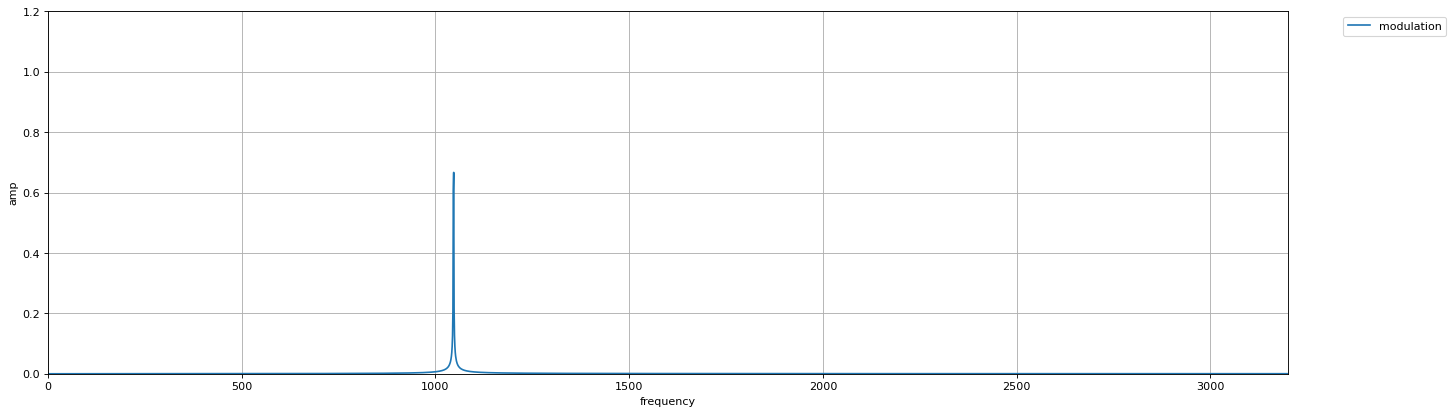

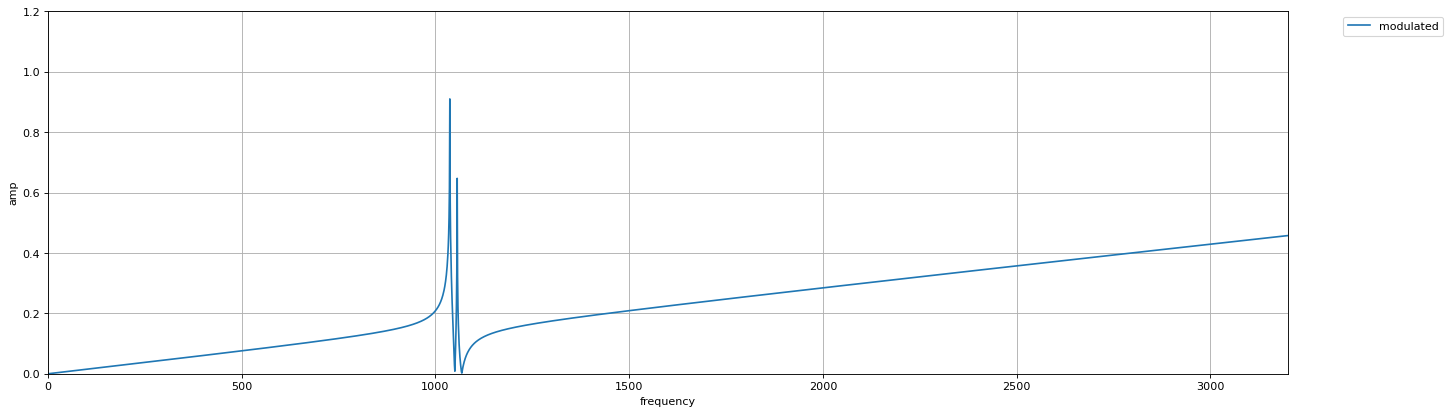

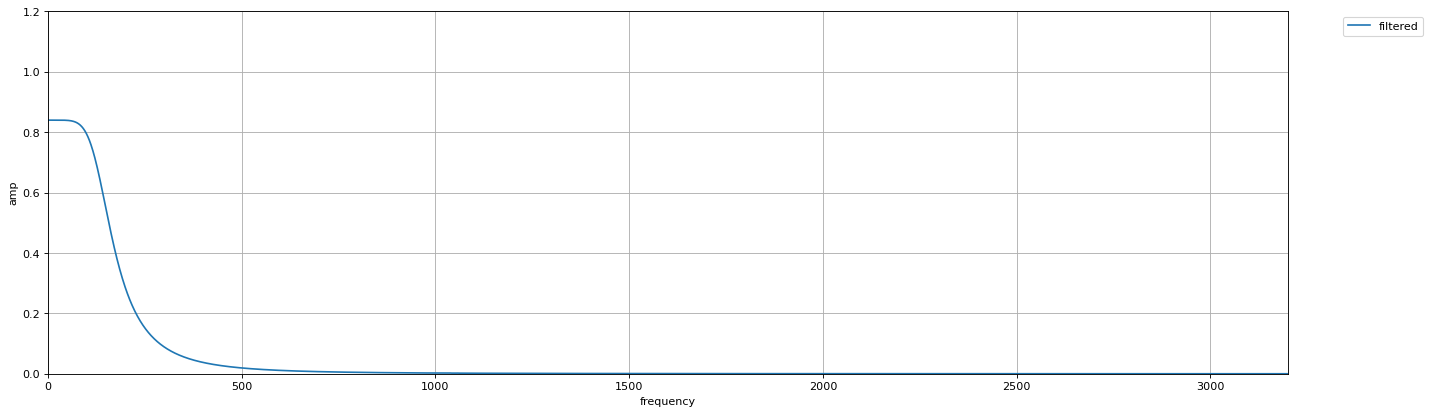

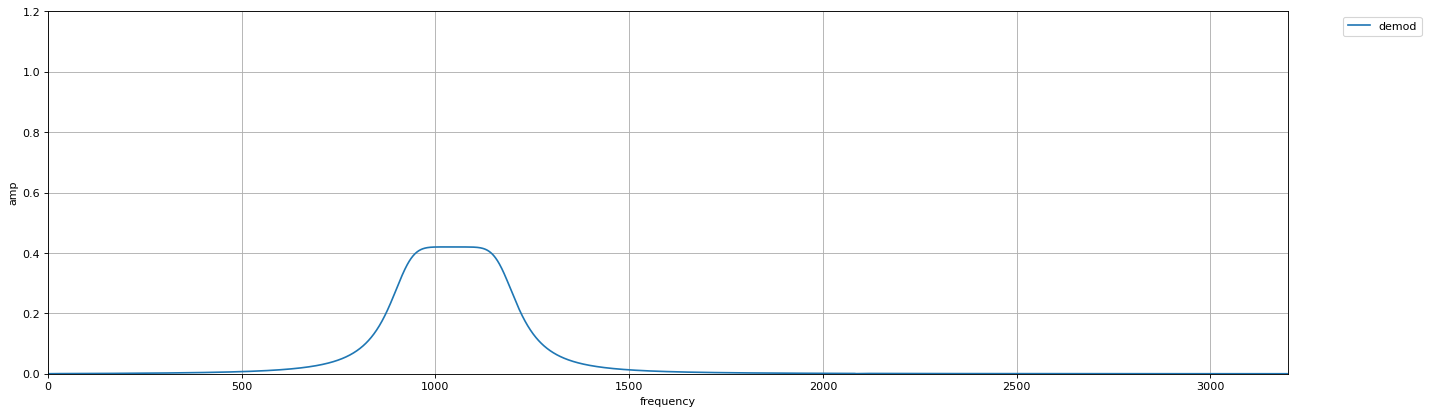

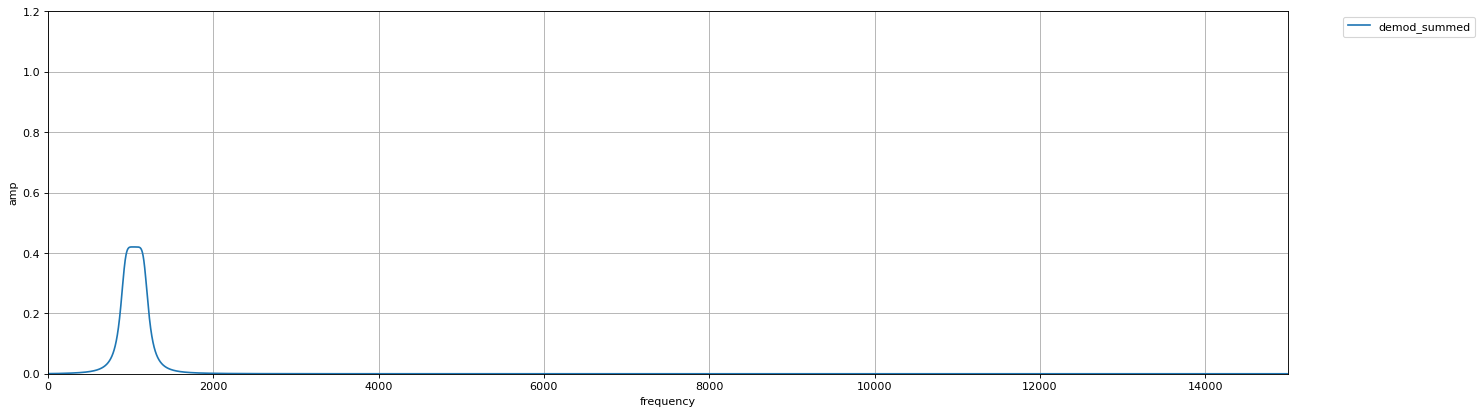

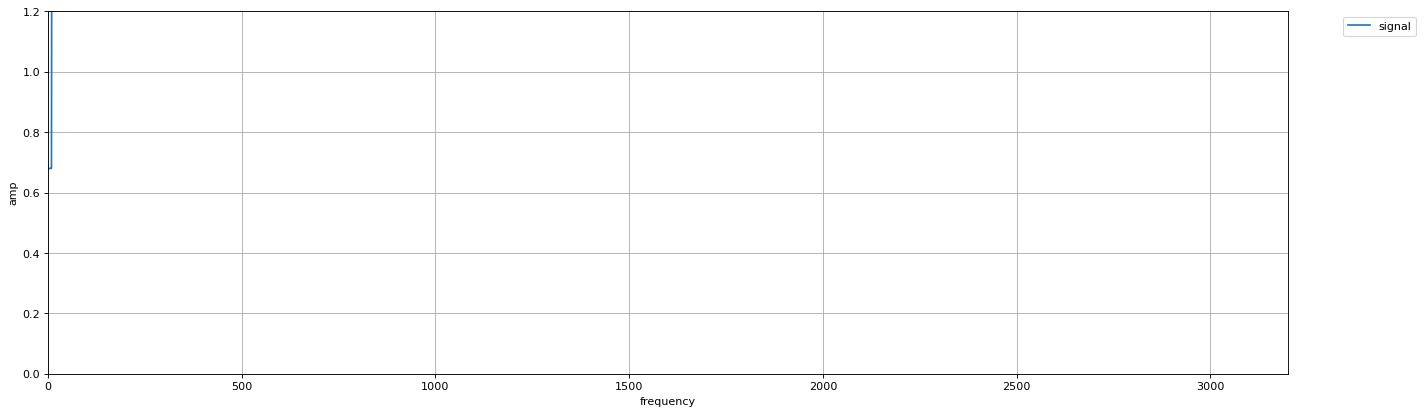

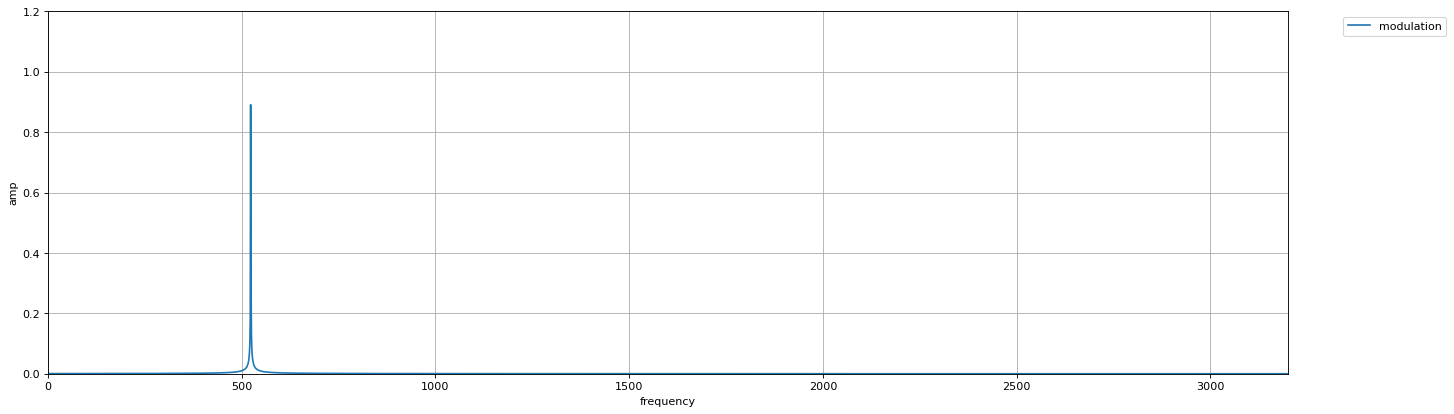

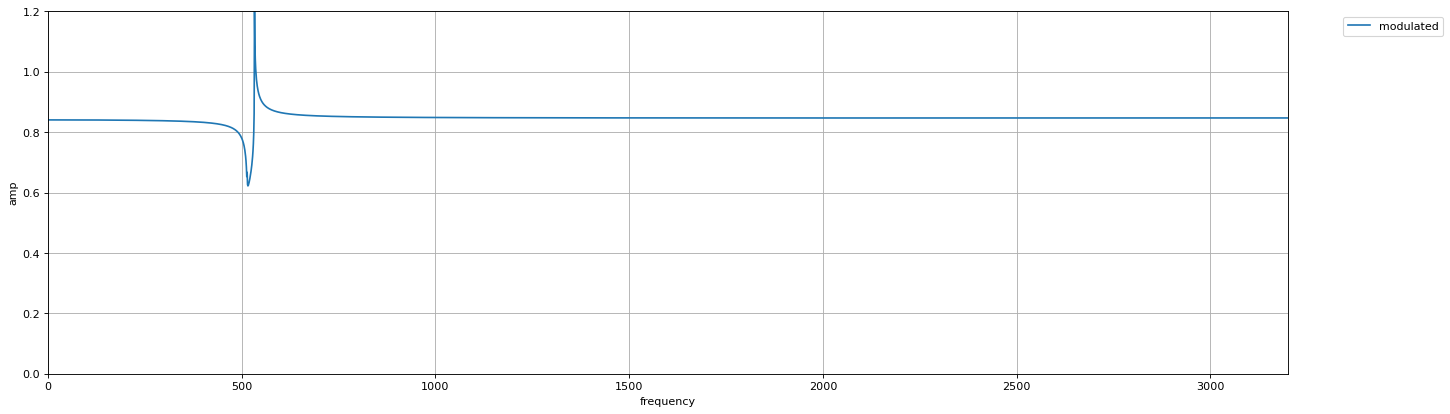

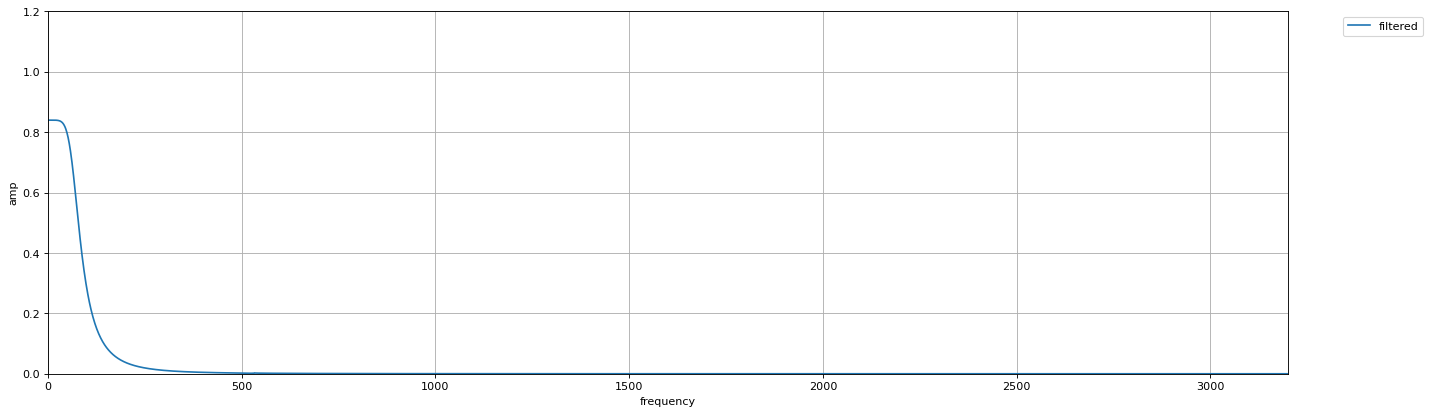

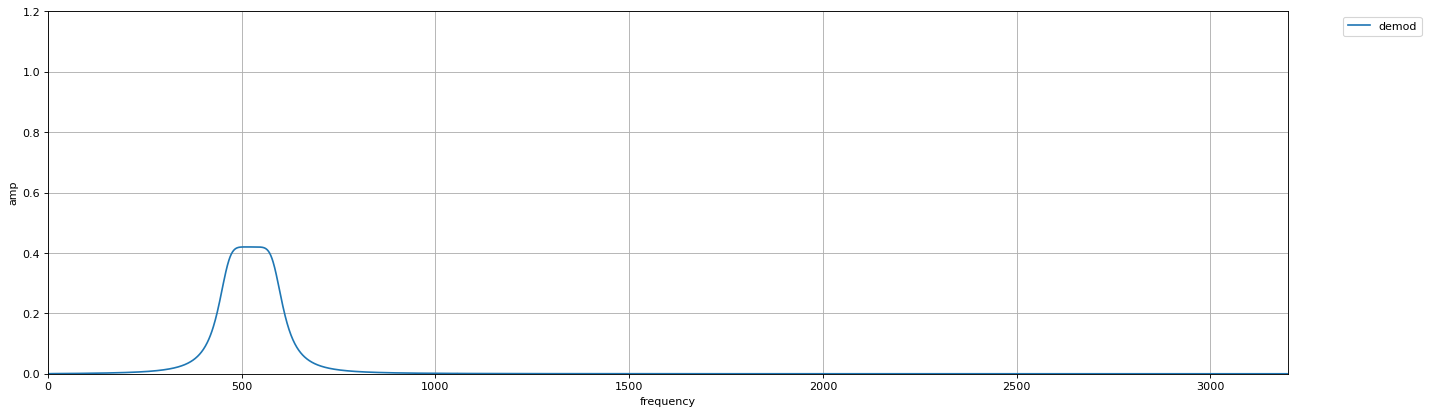

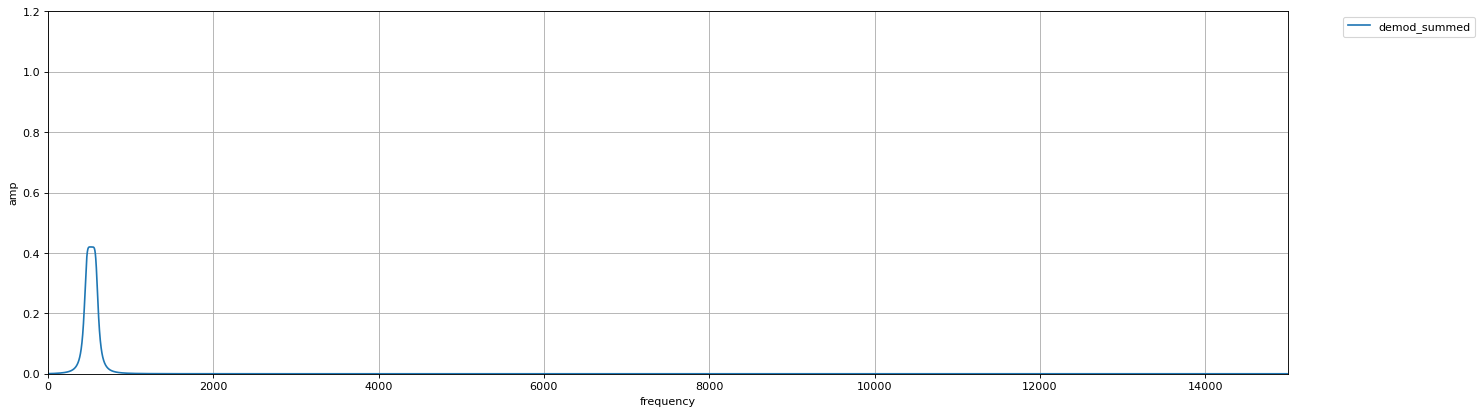

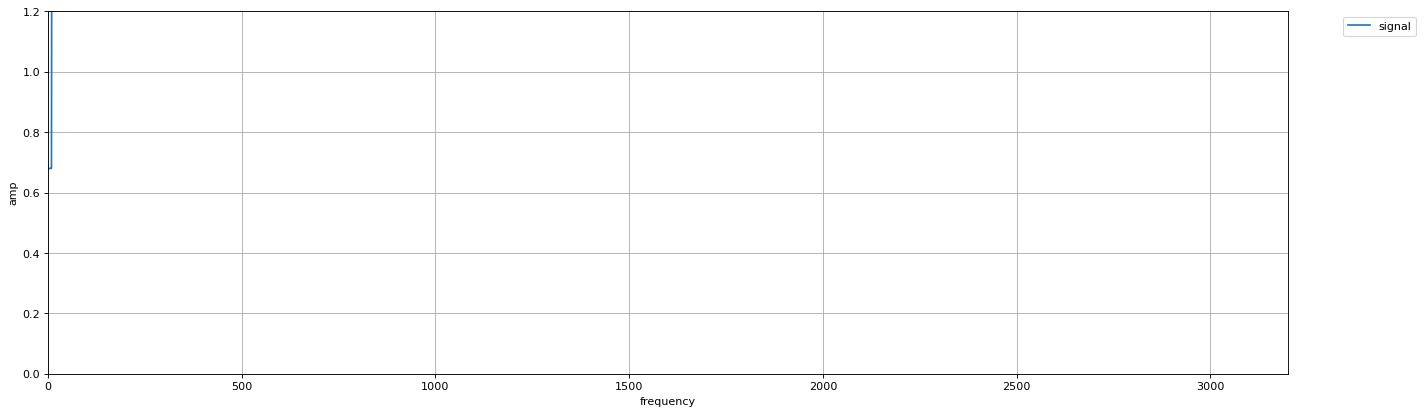

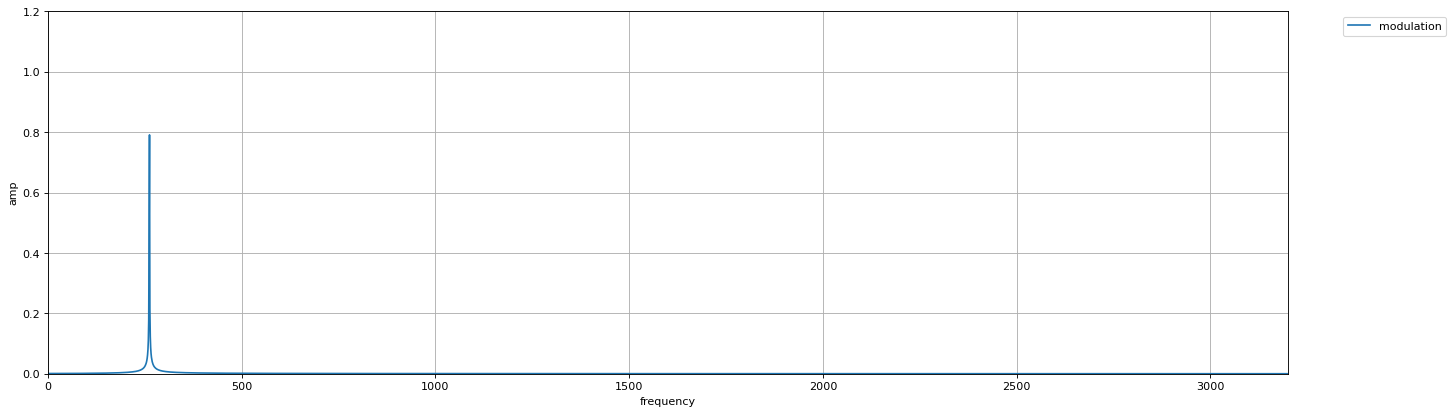

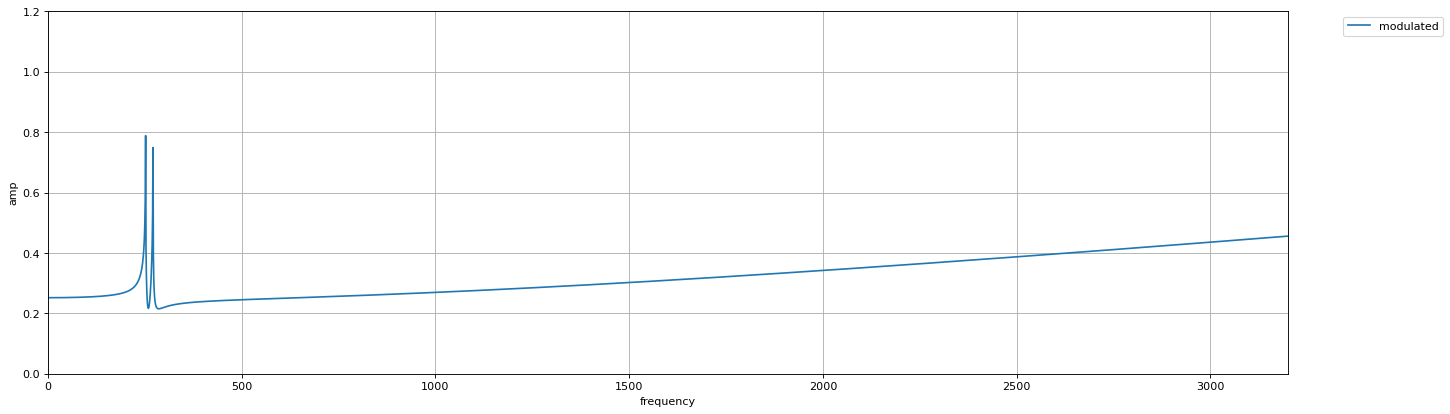

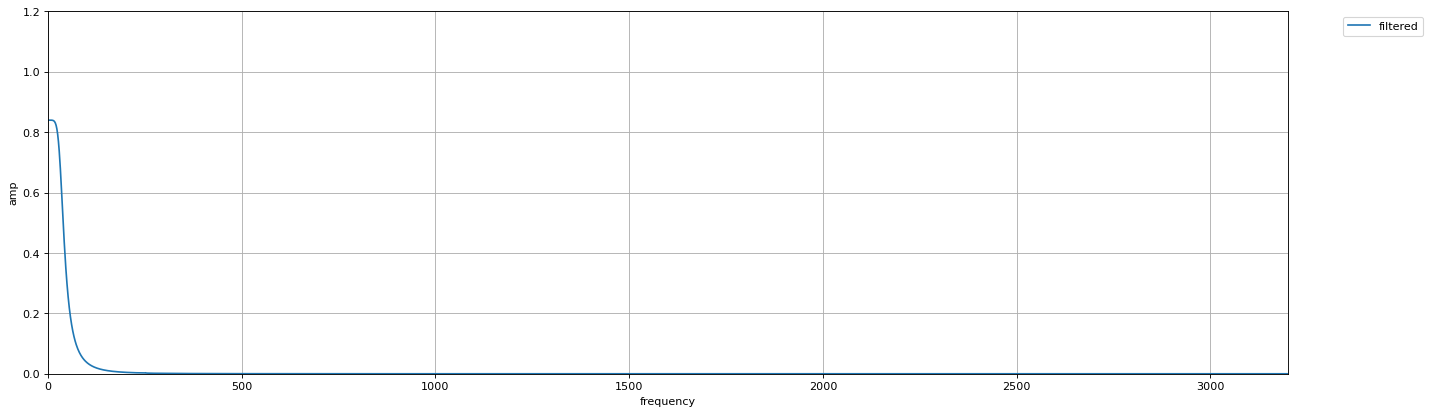

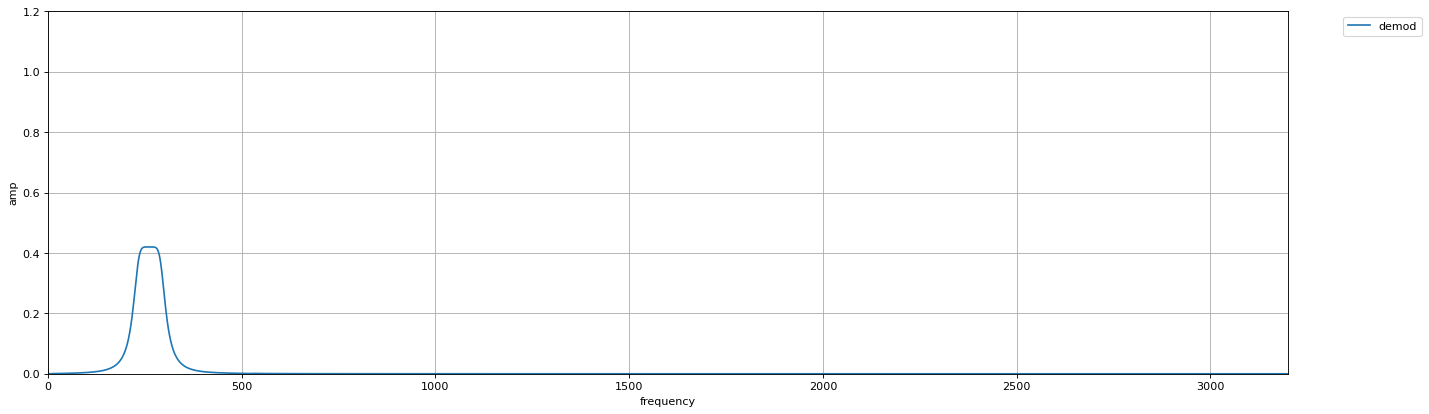

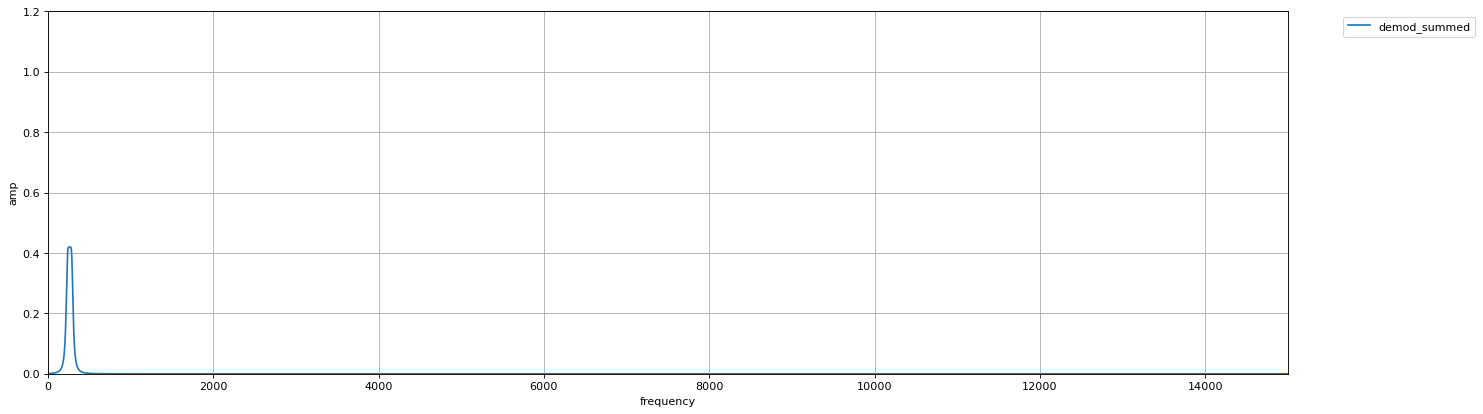

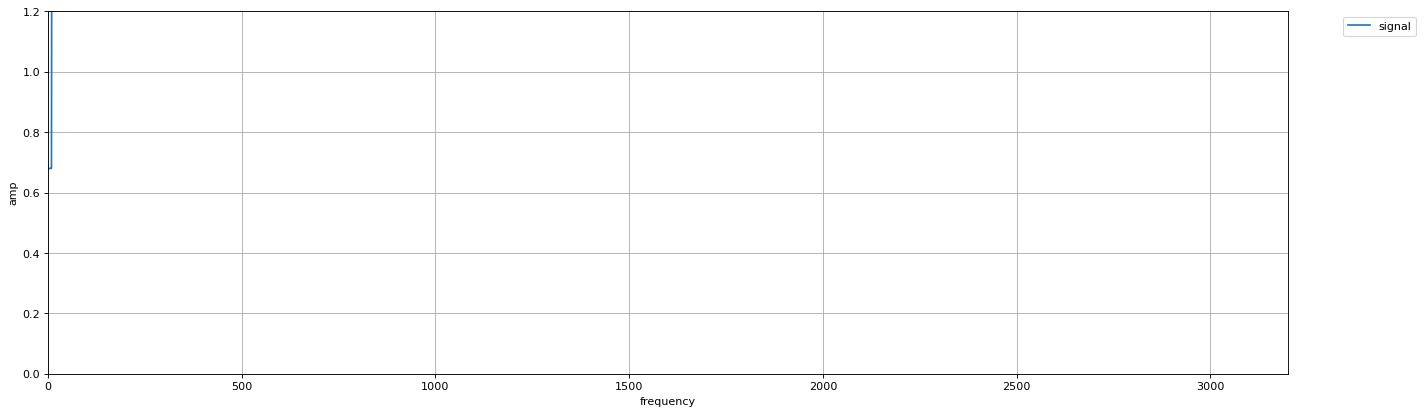

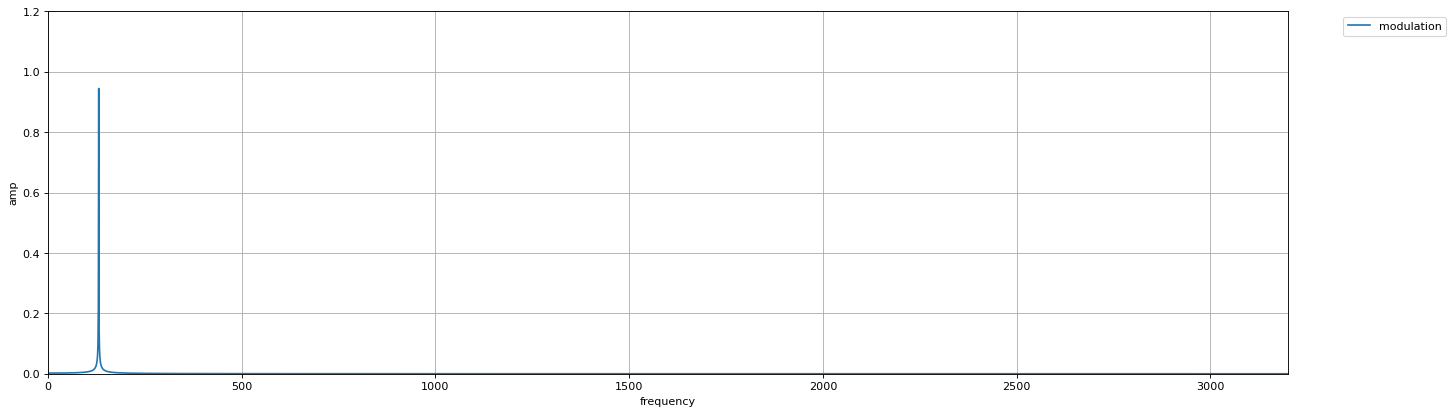

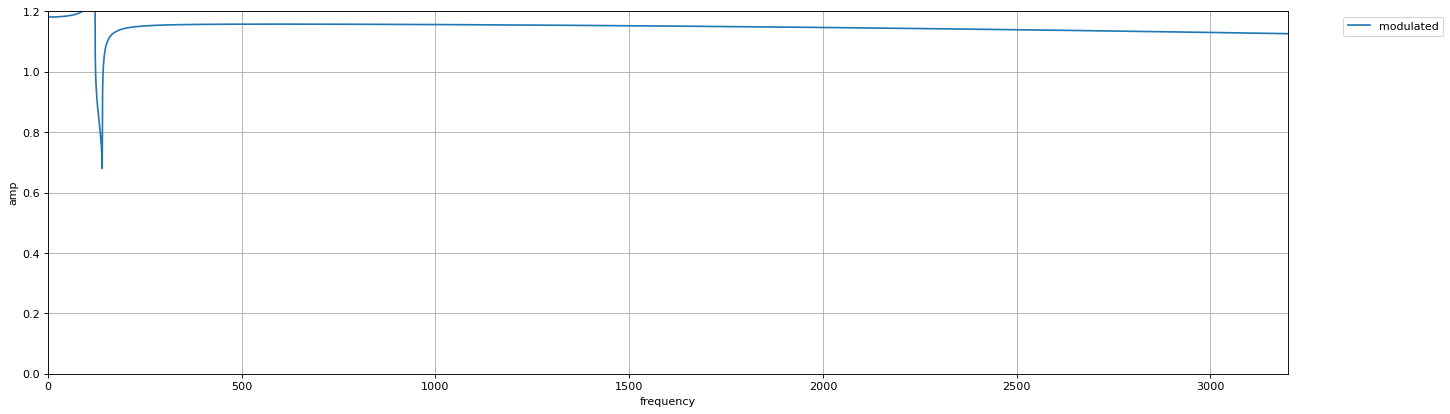

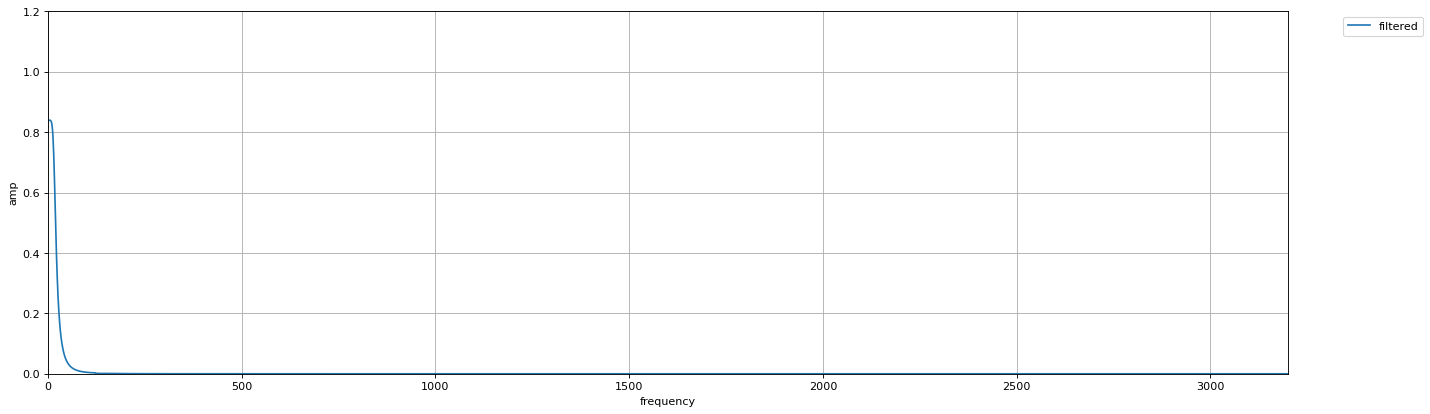

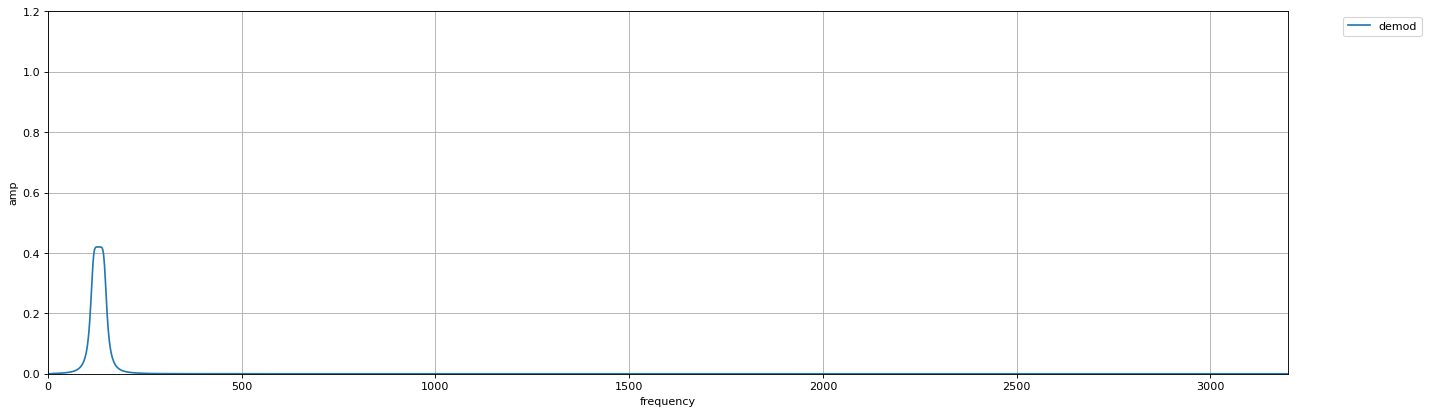

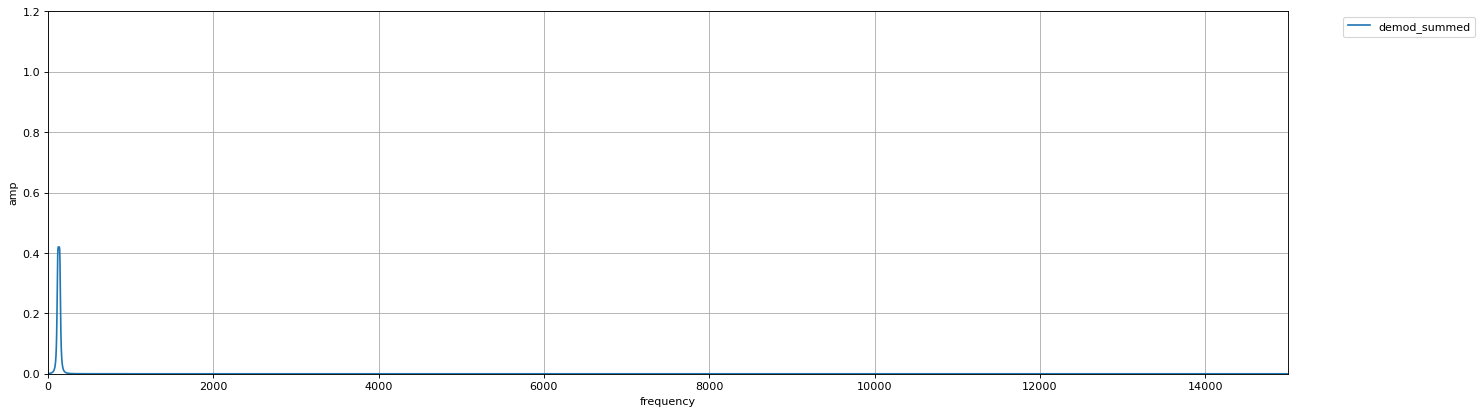

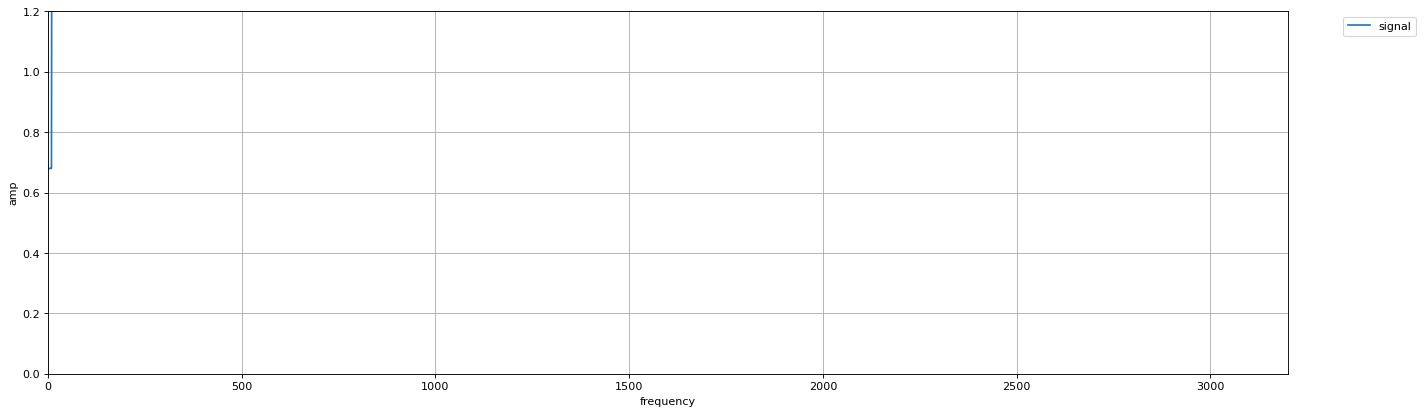

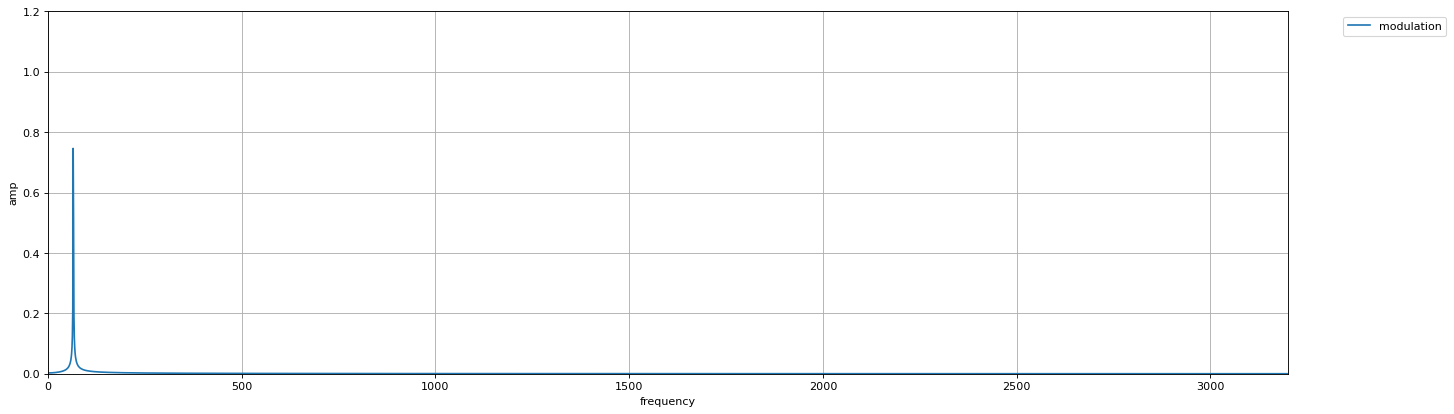

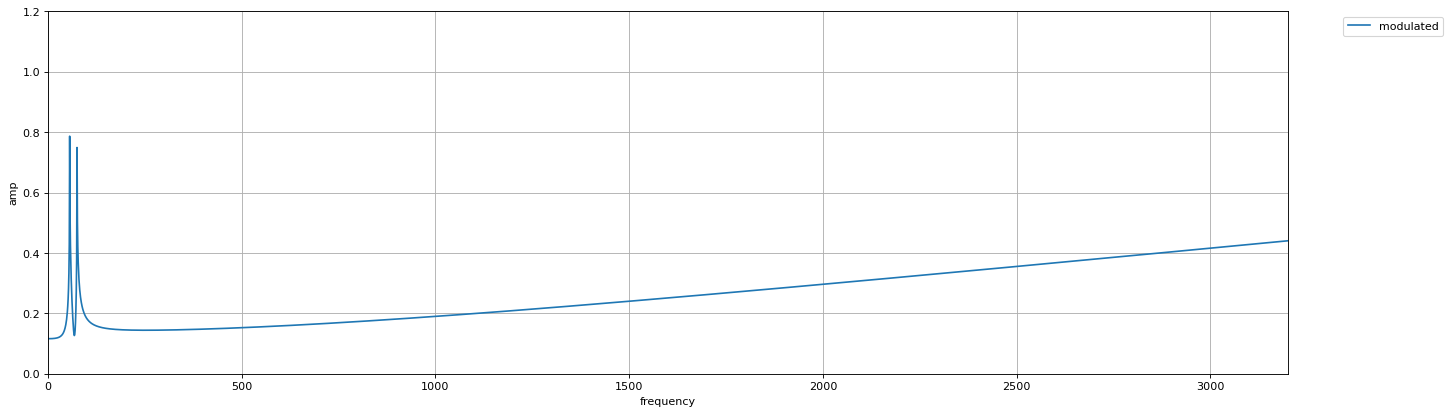

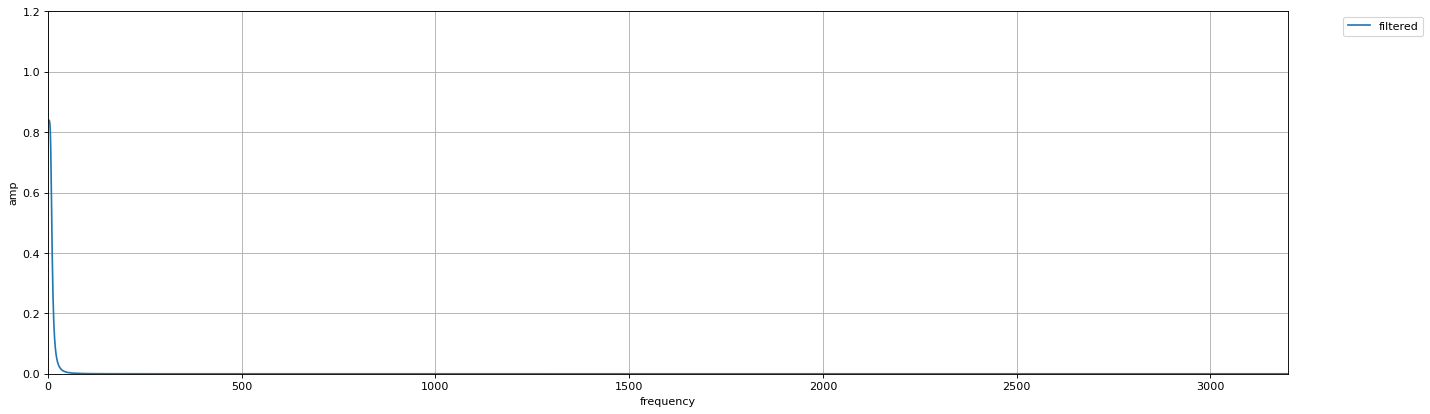

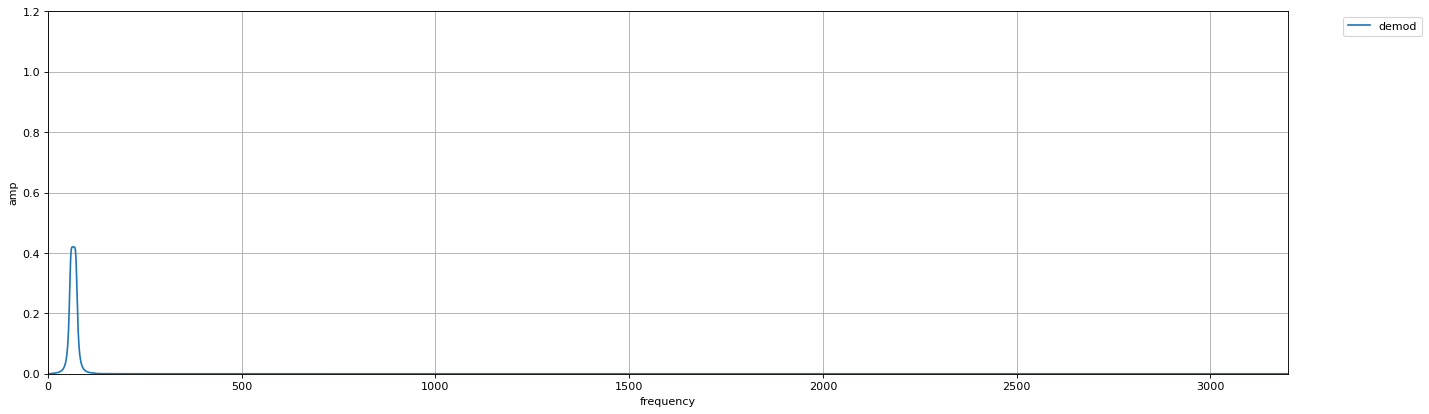

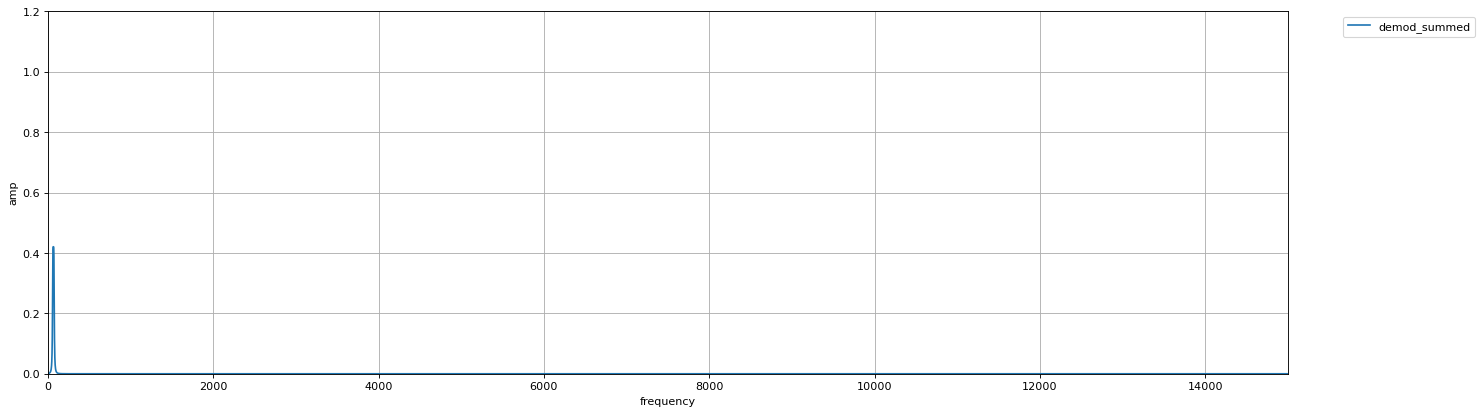

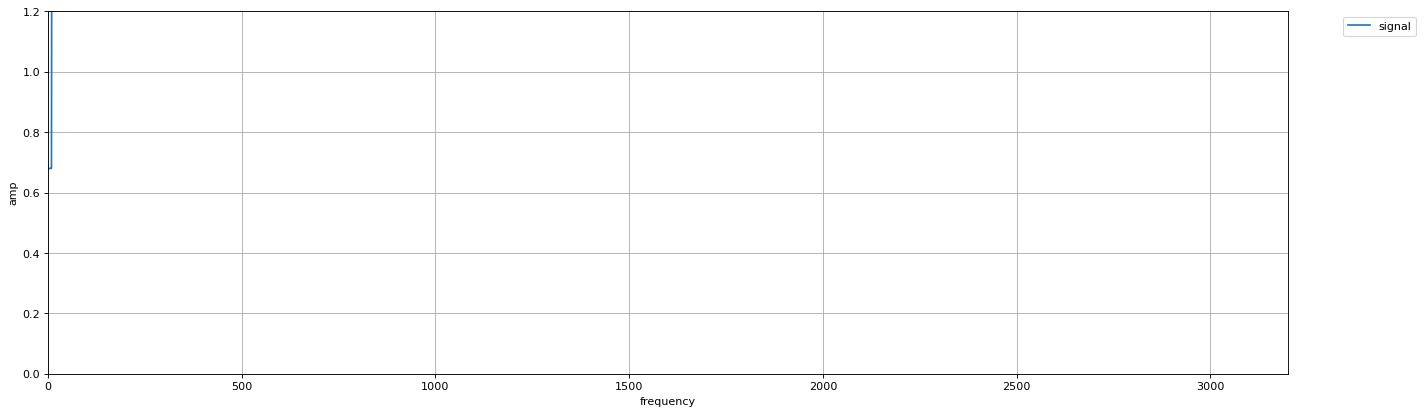

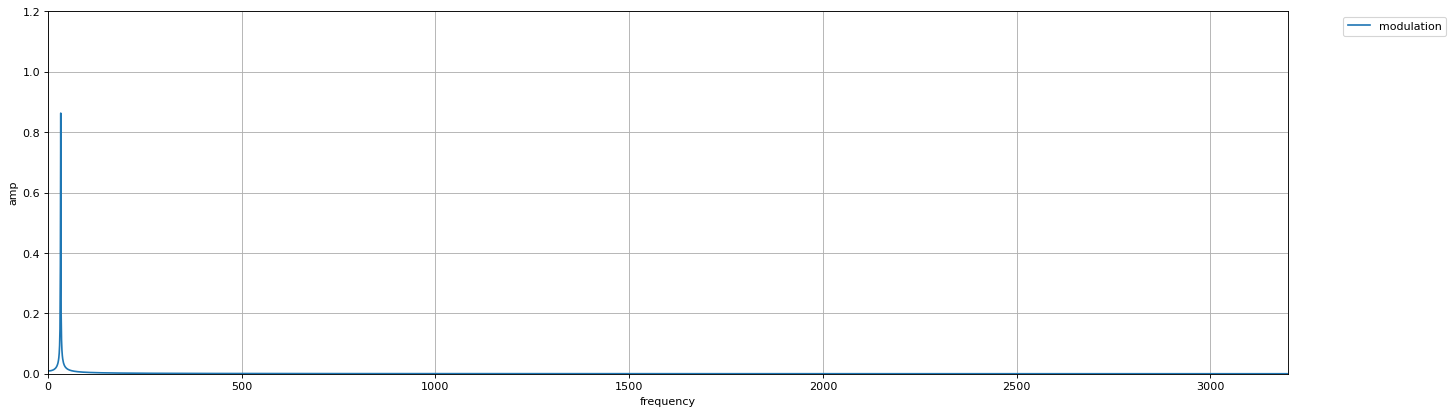

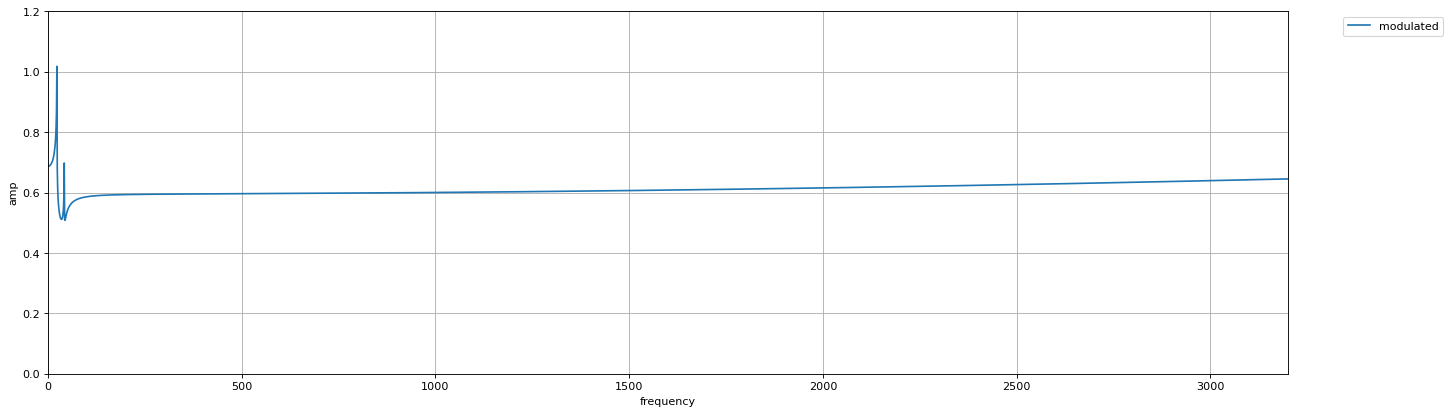

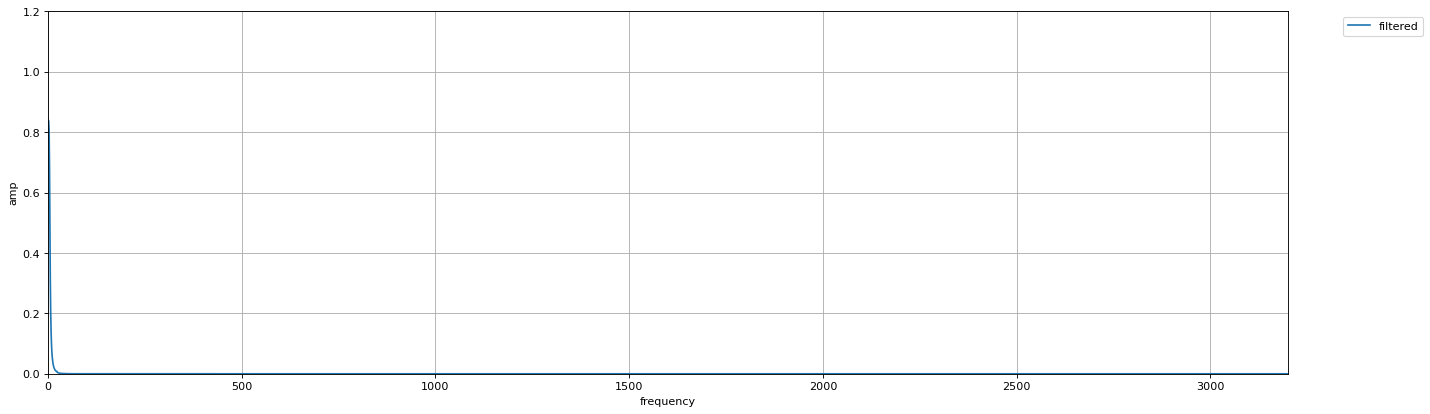

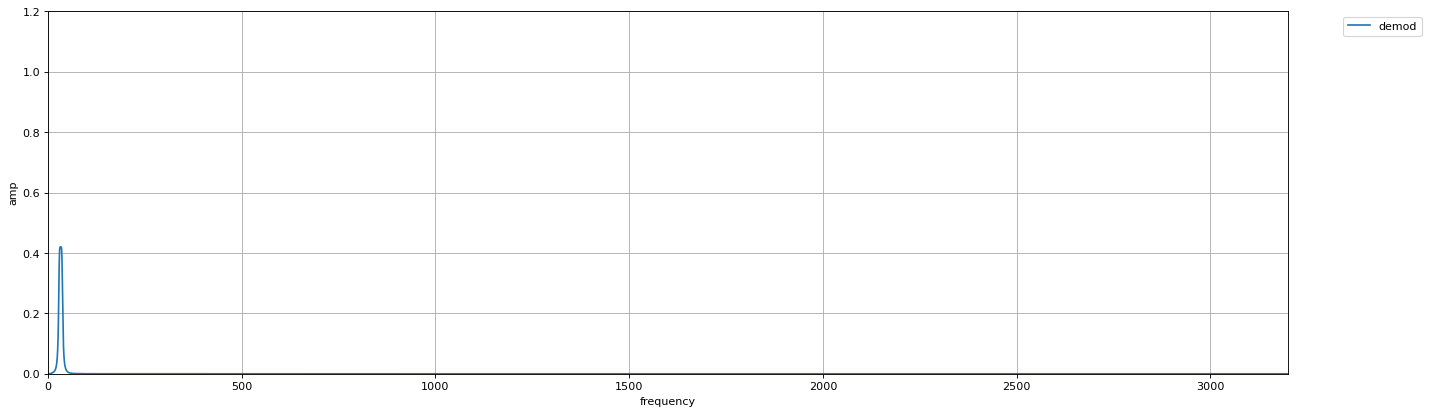

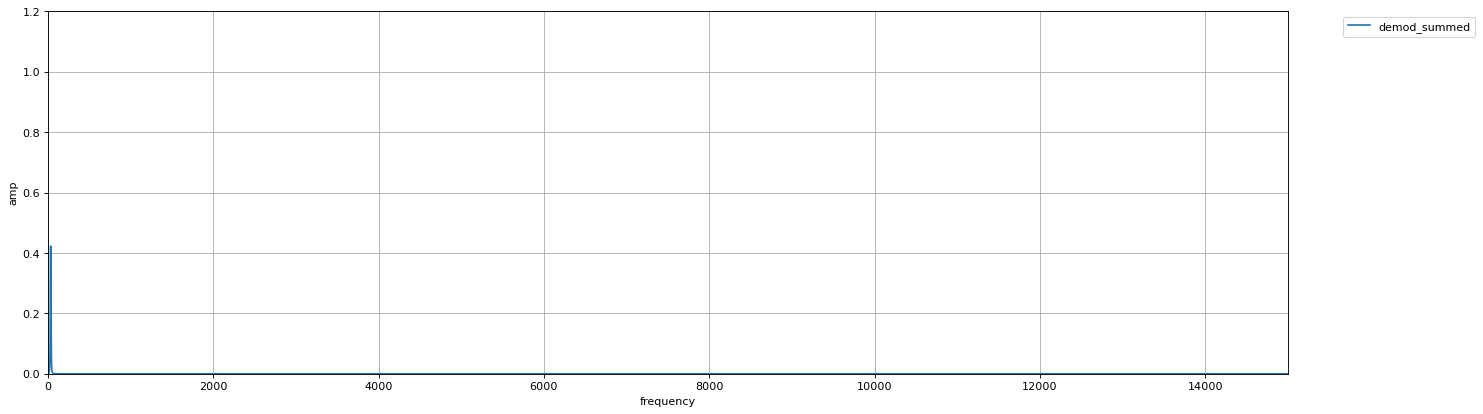

In [751]:
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])
for i in single_bank_fm:
    do_demodulation(sig, fs, i)

[7040.0, 3520.0, 1760.0, 880.0, 440.0, 220.0, 110.0, 55.0]
[2868.3540463793743, 1434.1770231896871, 717.0885115948436, 358.5442557974218, 179.2721278987109, 89.63606394935545, 44.81803197467772, 22.40901598733886]


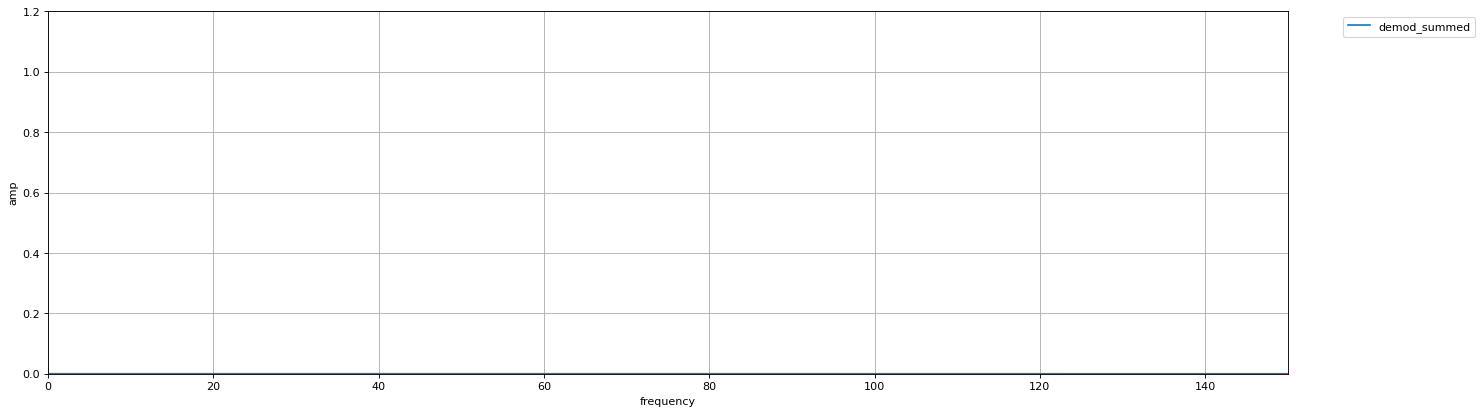

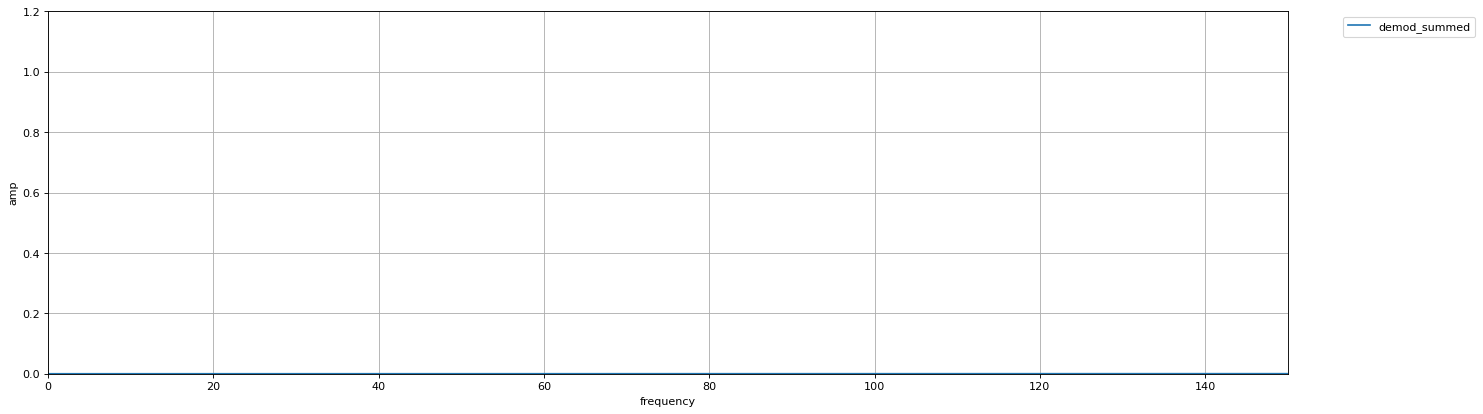

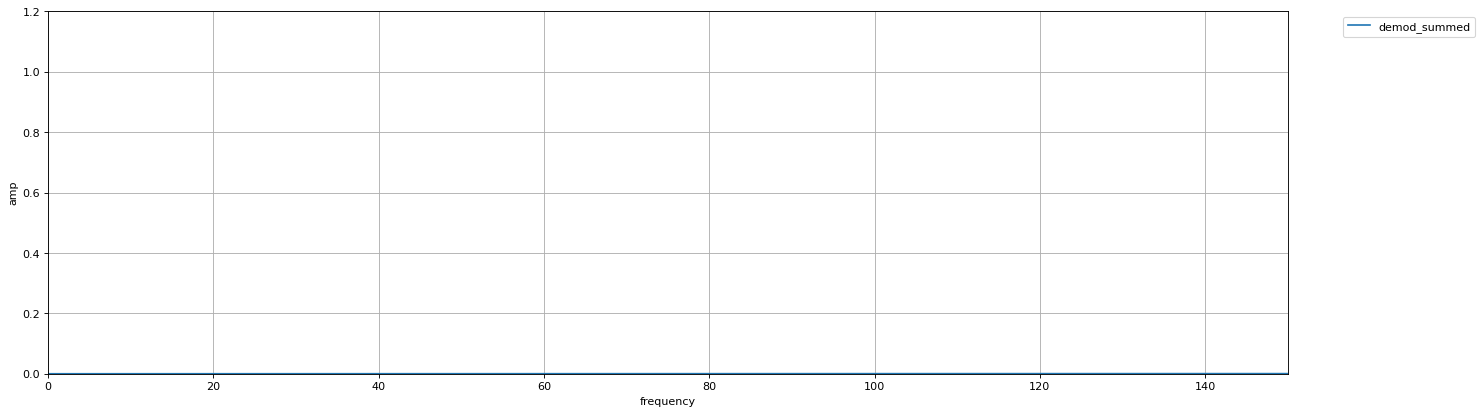

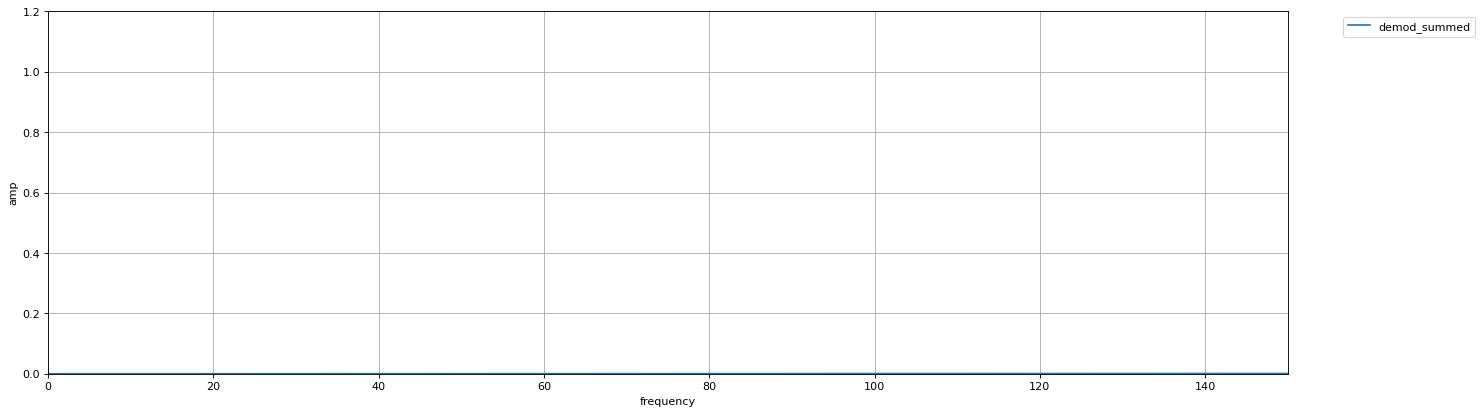

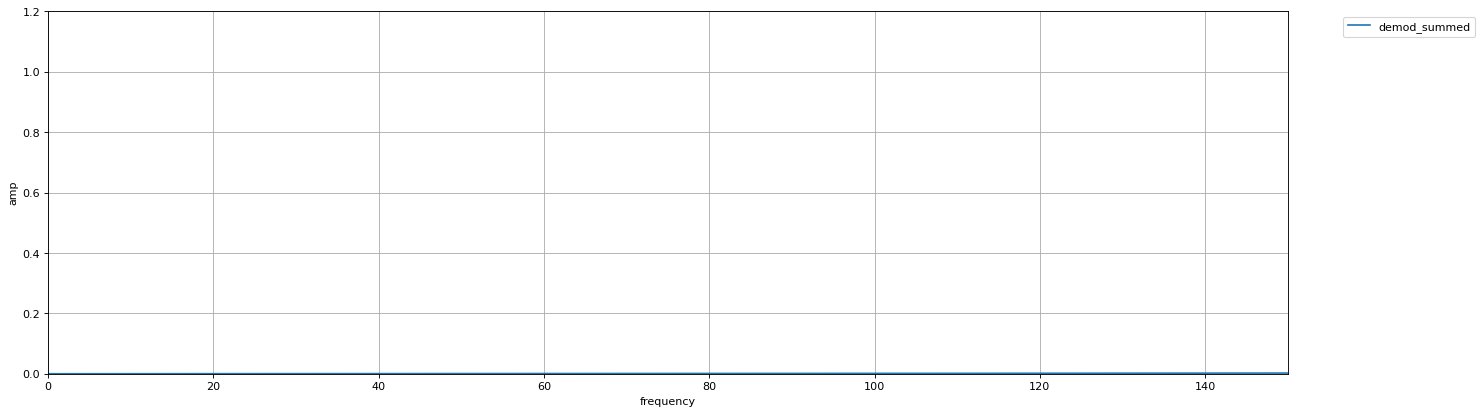

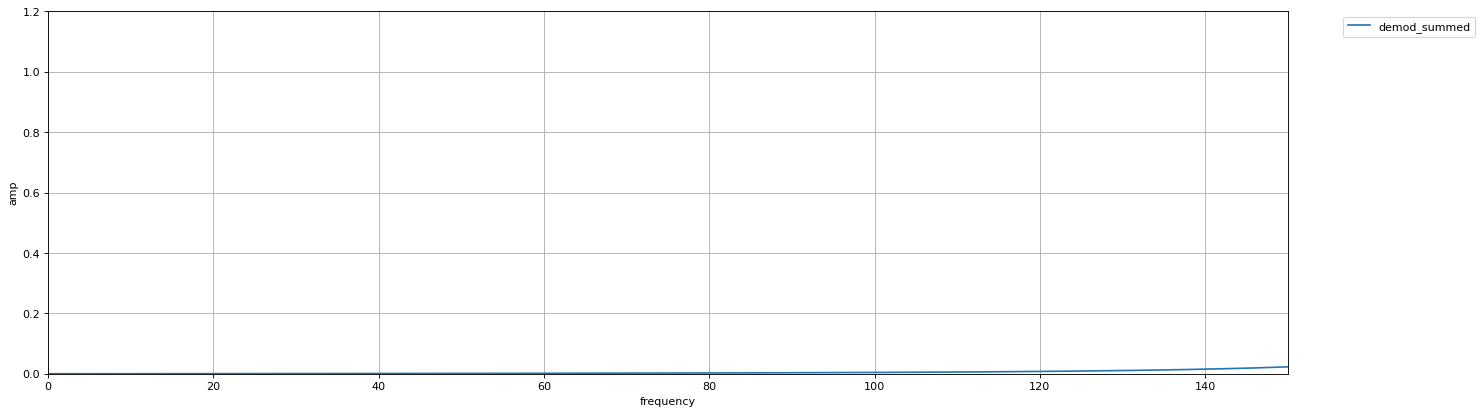

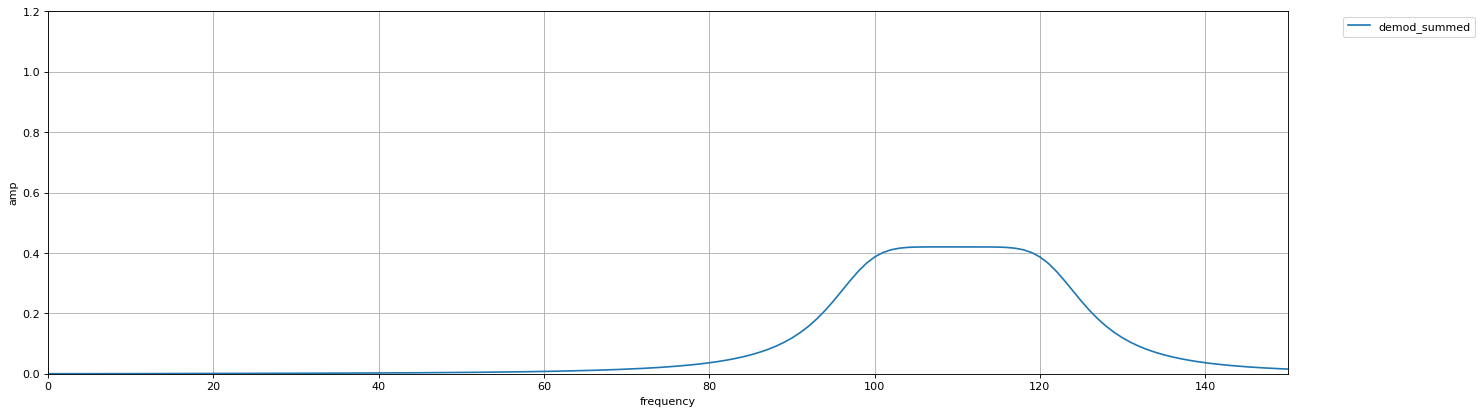

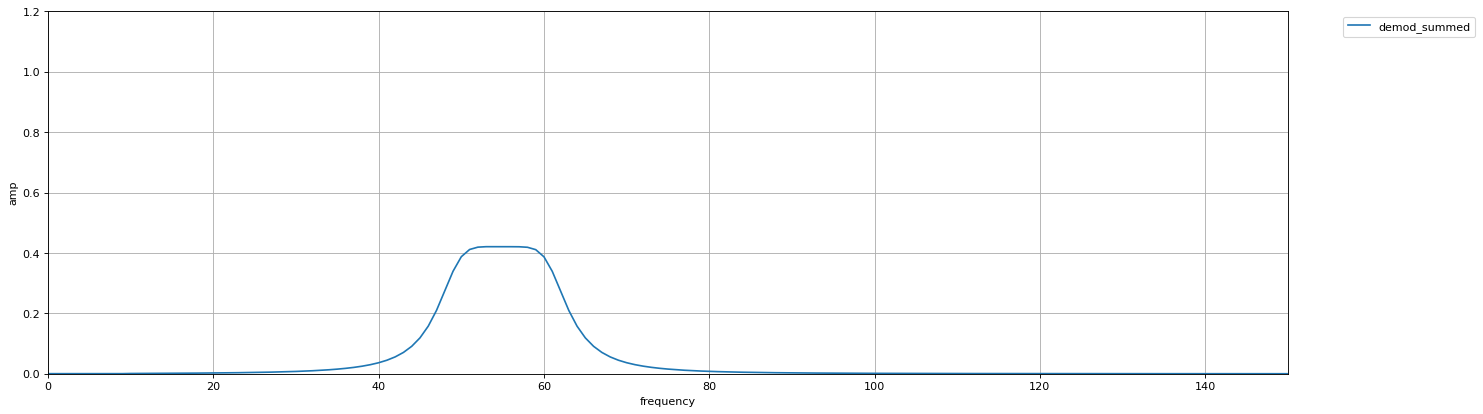

In [734]:
single_bank_fm = []
for i in range(8):
    single_bank_fm.append(starting_fm[1]/(2**i))
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])
for i in single_bank_fm:
    do_demodulation(sig, fs, i)

[6271.0, 3135.5, 1567.75, 783.875, 391.9375, 195.96875, 97.984375, 48.9921875]
[2555.0352592109457, 1277.5176296054728, 638.7588148027364, 319.3794074013682, 159.6897037006841, 79.84485185034205, 39.92242592517103, 19.961212962585513]


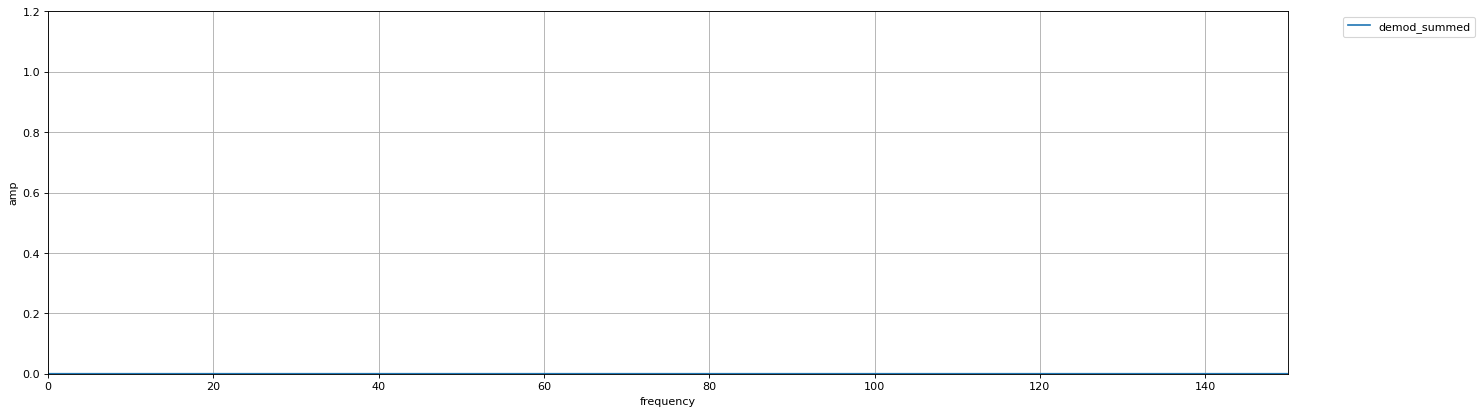

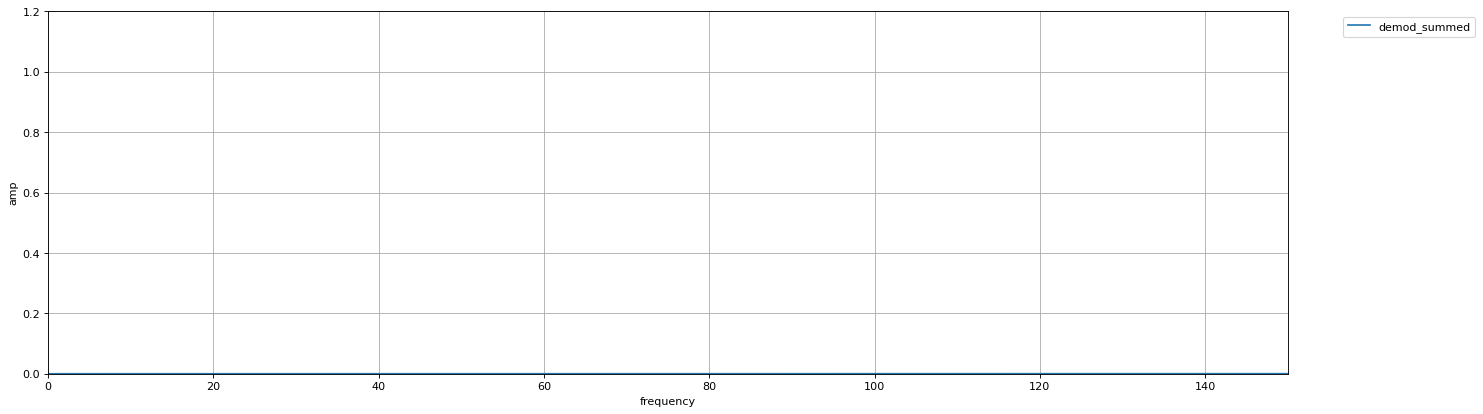

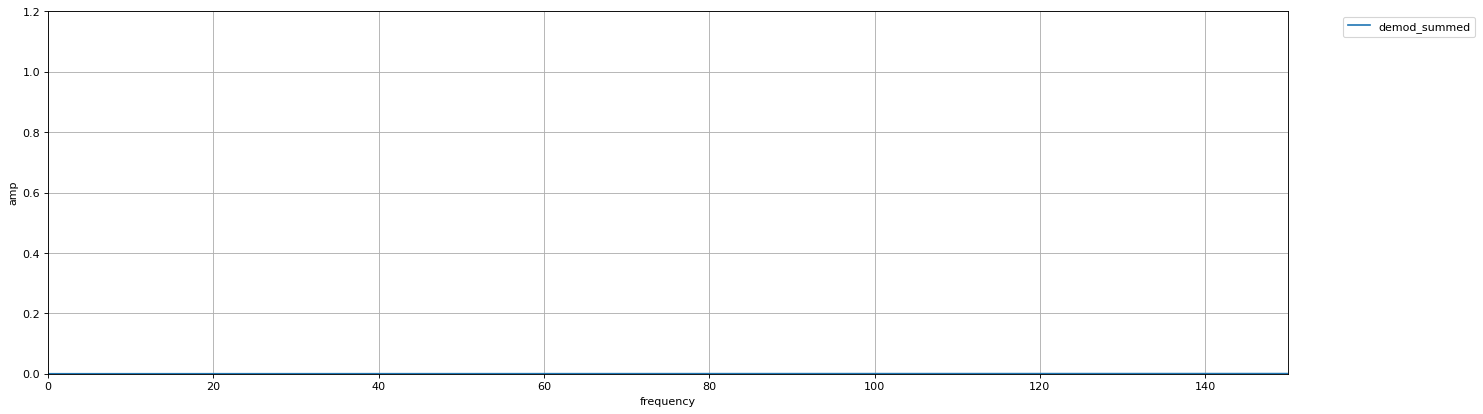

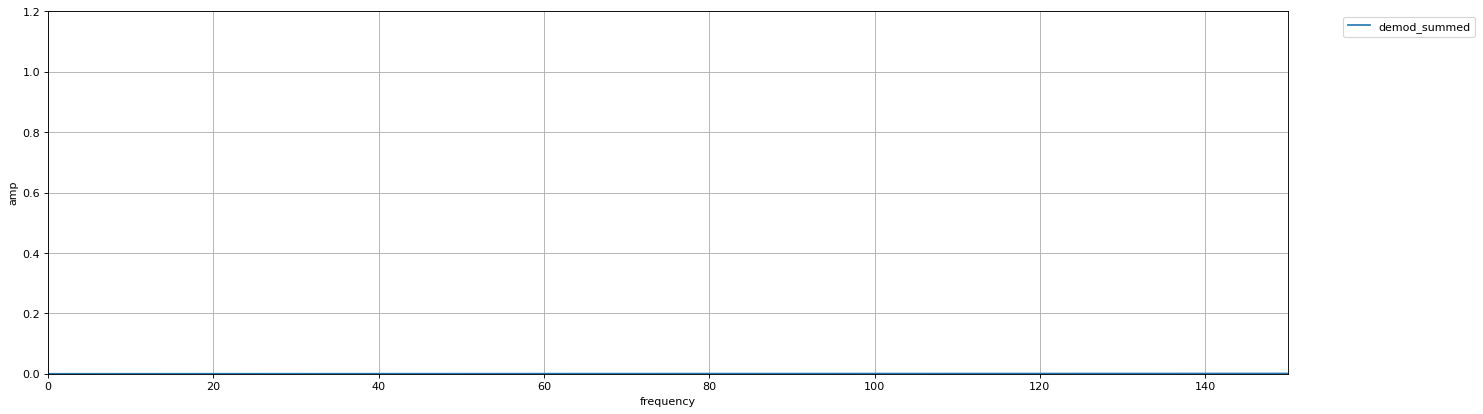

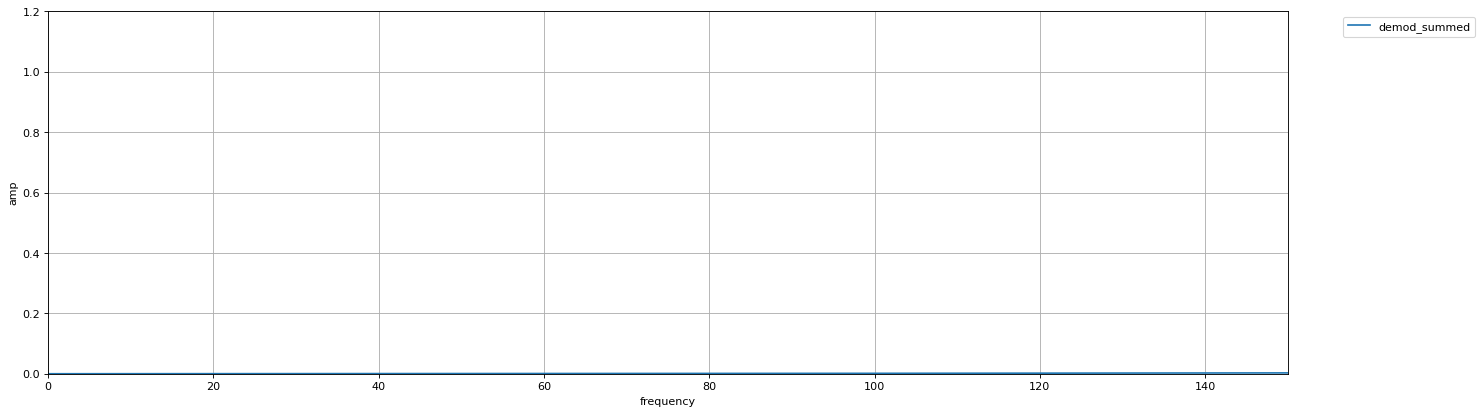

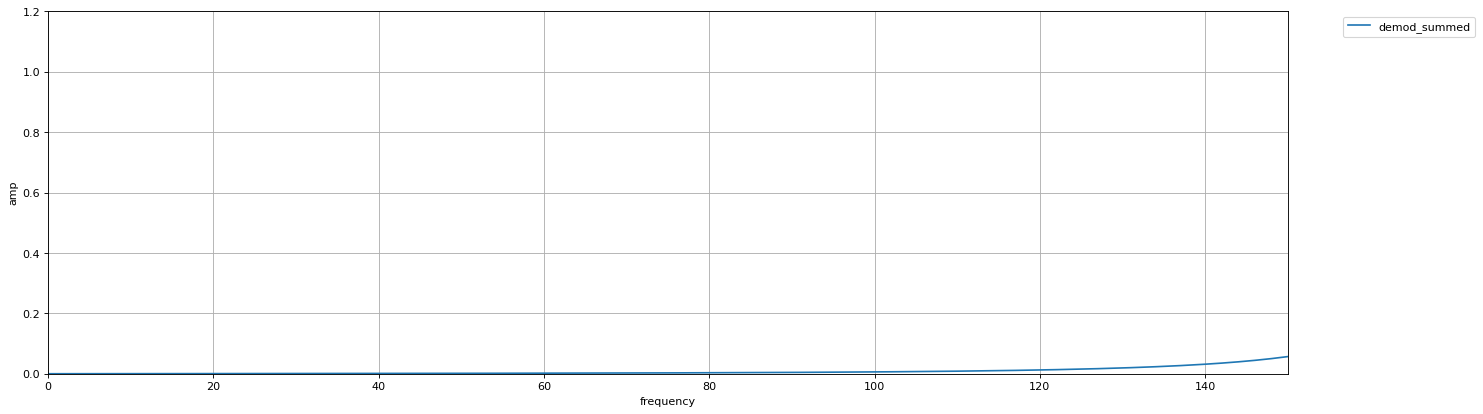

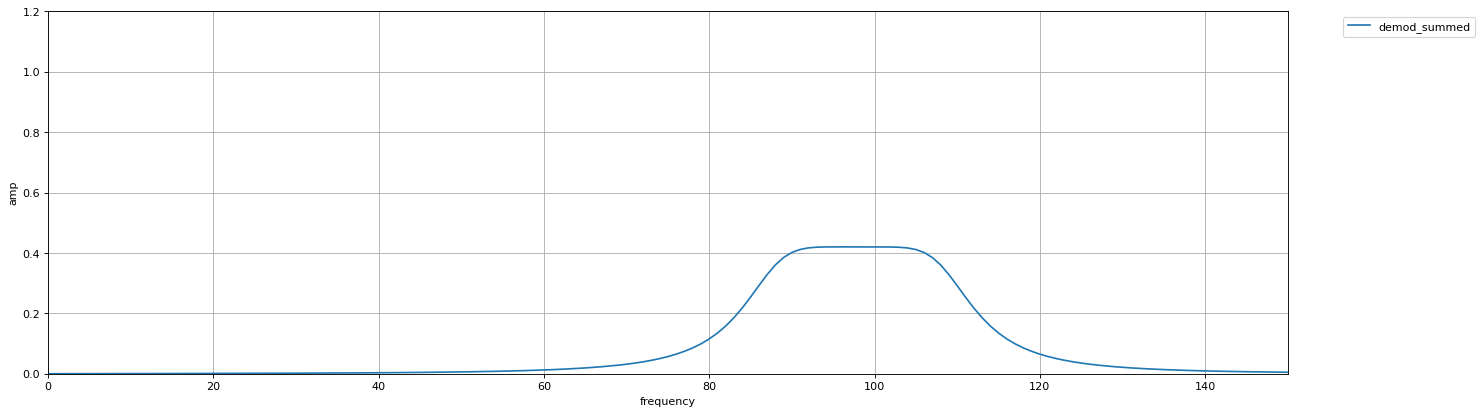

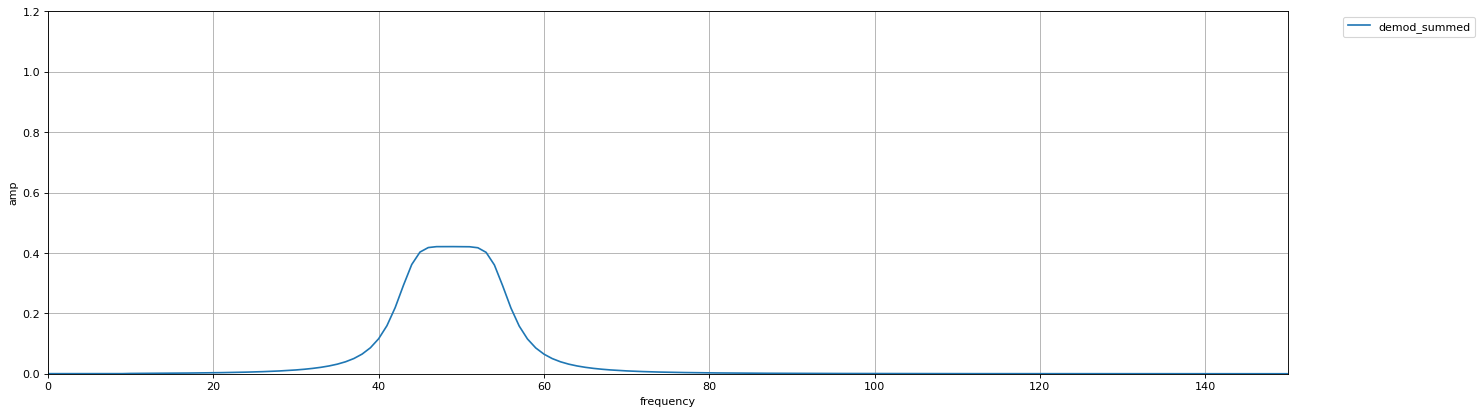

In [735]:
single_bank_fm = []

for i in range(8):
    single_bank_fm.append(starting_fm[2]/(2**i))
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])

for i in single_bank_fm:
    do_demodulation(sig, fs, i)

[5587.0, 2793.5, 1396.75, 698.375, 349.1875, 174.59375, 87.296875, 43.6484375]
[2276.348587659313, 1138.1742938296566, 569.0871469148283, 284.54357345741414, 142.27178672870707, 71.13589336435354, 35.56794668217677, 17.783973341088384]


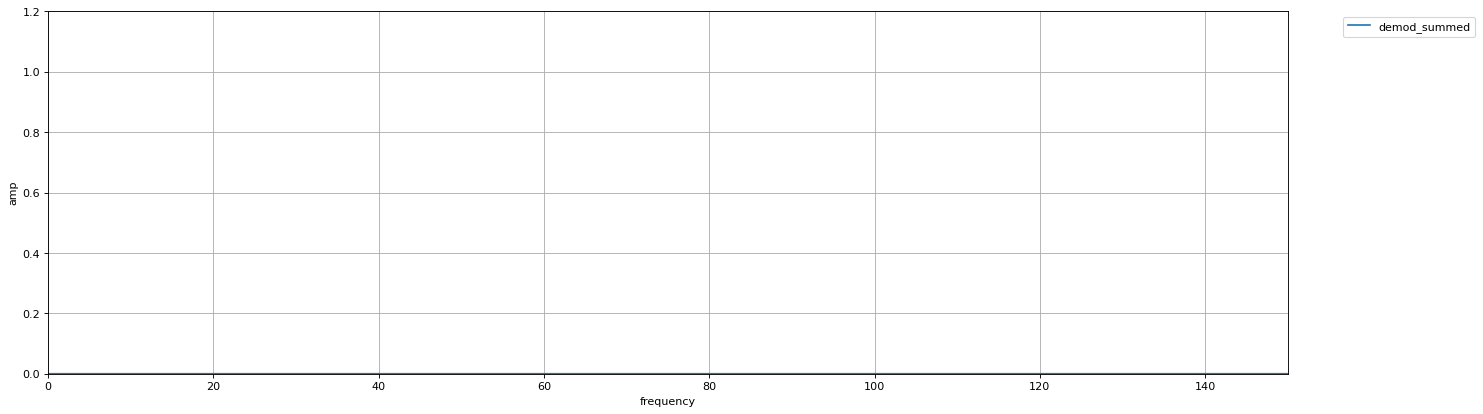

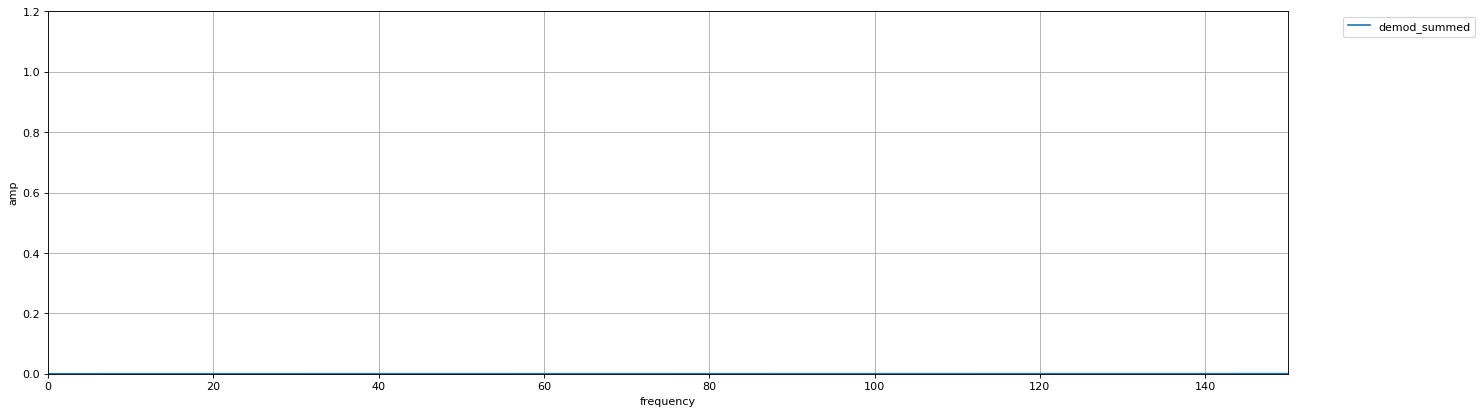

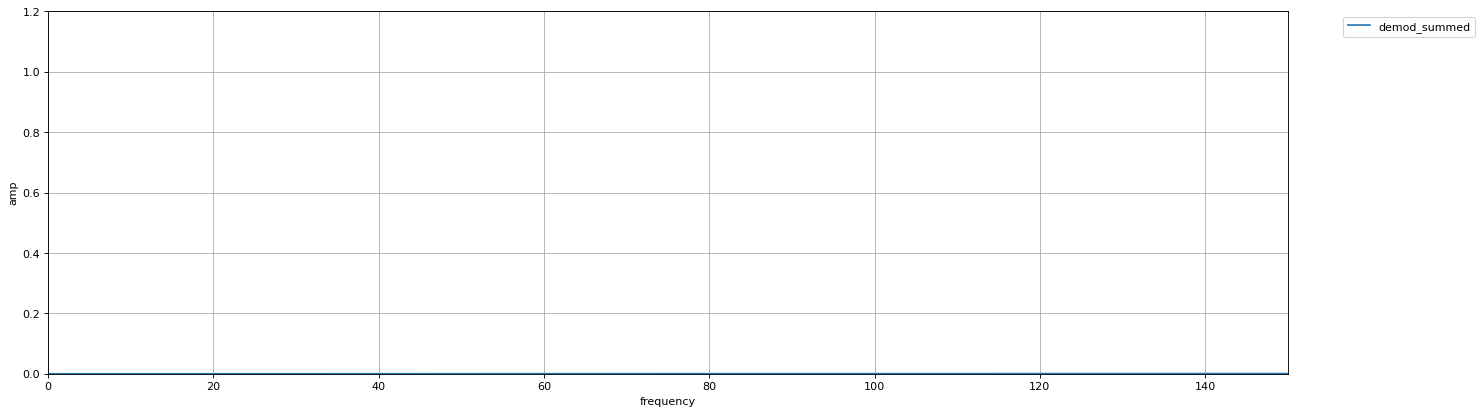

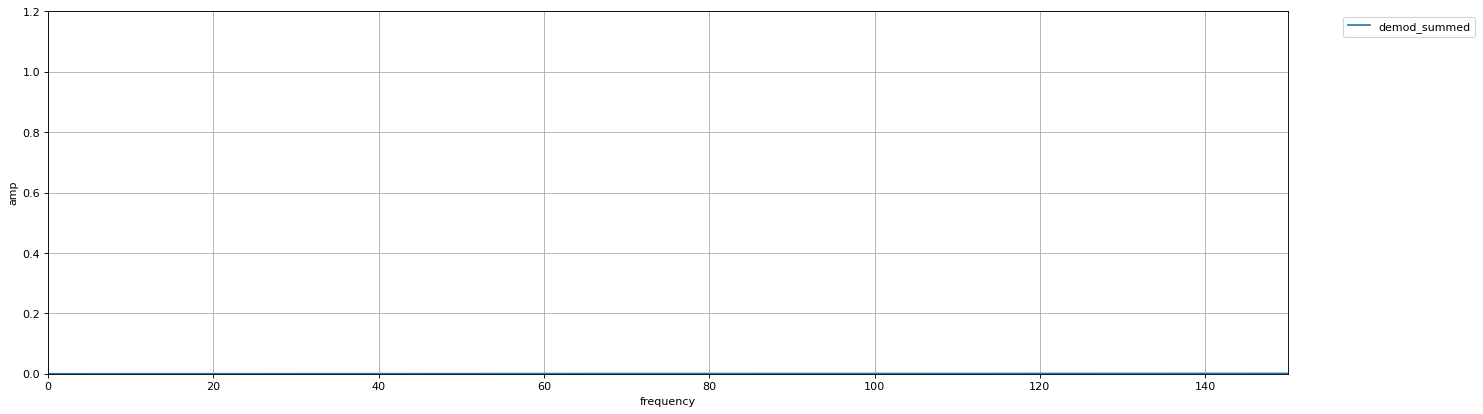

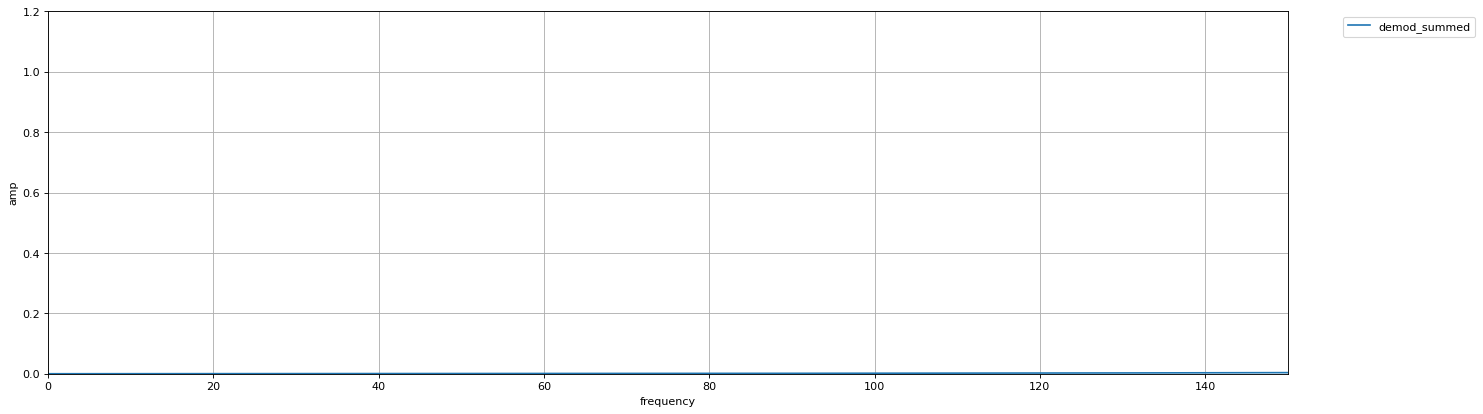

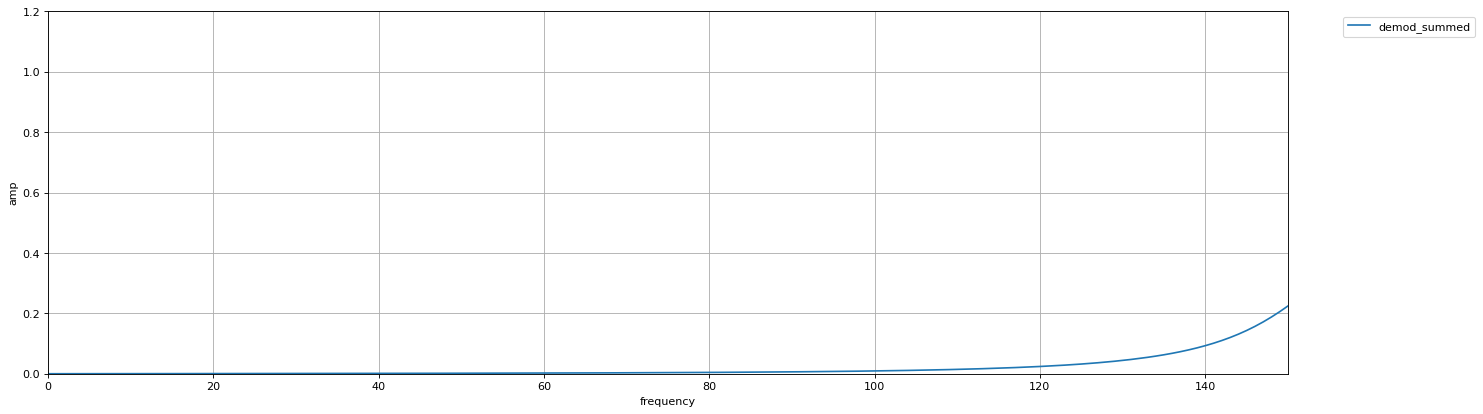

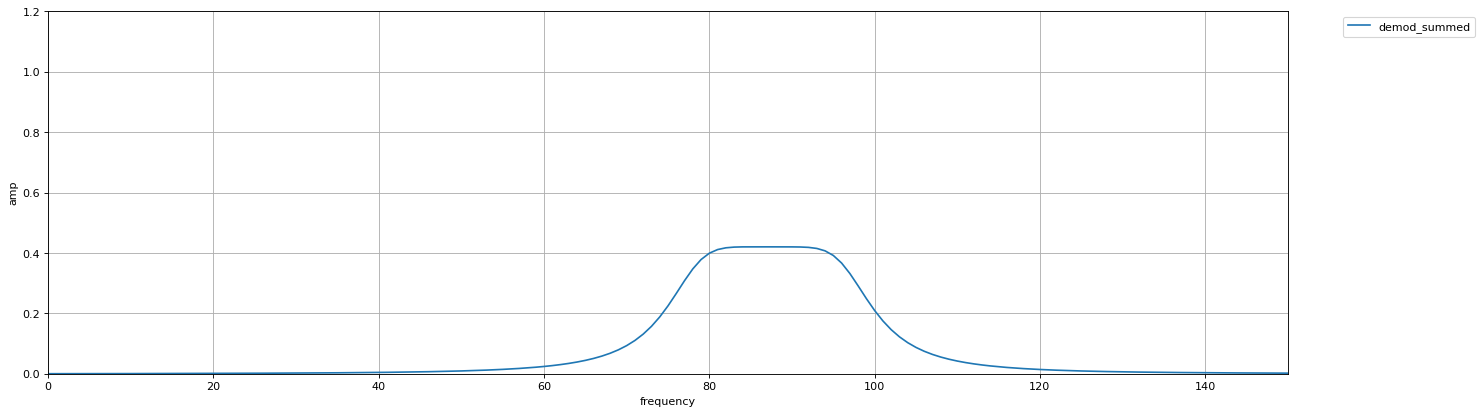

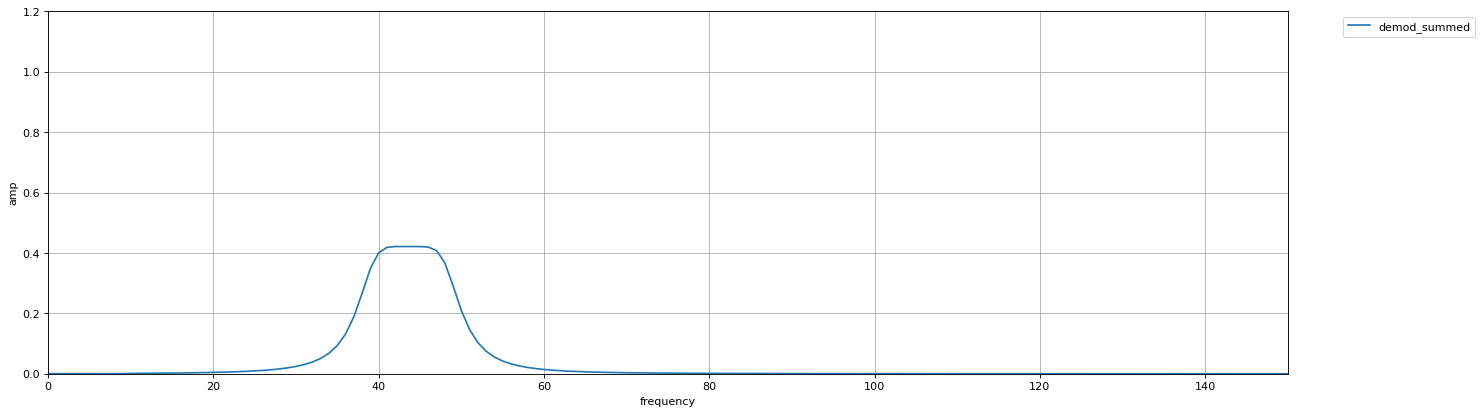

In [736]:
single_bank_fm = []

for i in range(8):
    single_bank_fm.append(starting_fm[3]/(2**i))
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])

for i in single_bank_fm:
    do_demodulation(sig, fs, i)

[5274.0, 2637.0, 1318.5, 659.25, 329.625, 164.8125, 82.40625, 41.203125]
[2148.8209148586393, 1074.4104574293196, 537.2052287146598, 268.6026143573299, 134.30130717866496, 67.15065358933248, 33.57532679466624, 16.78766339733312]


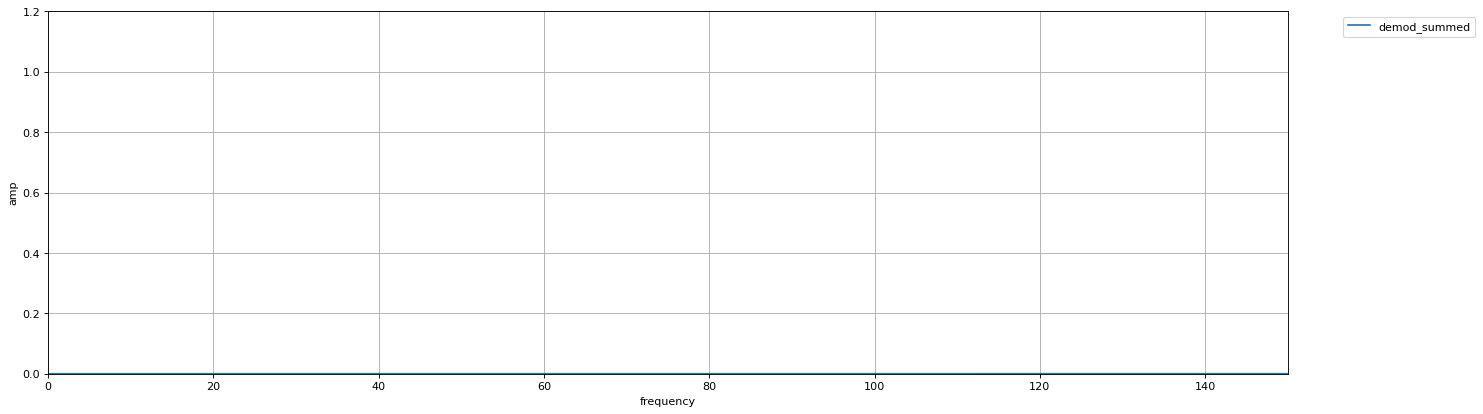

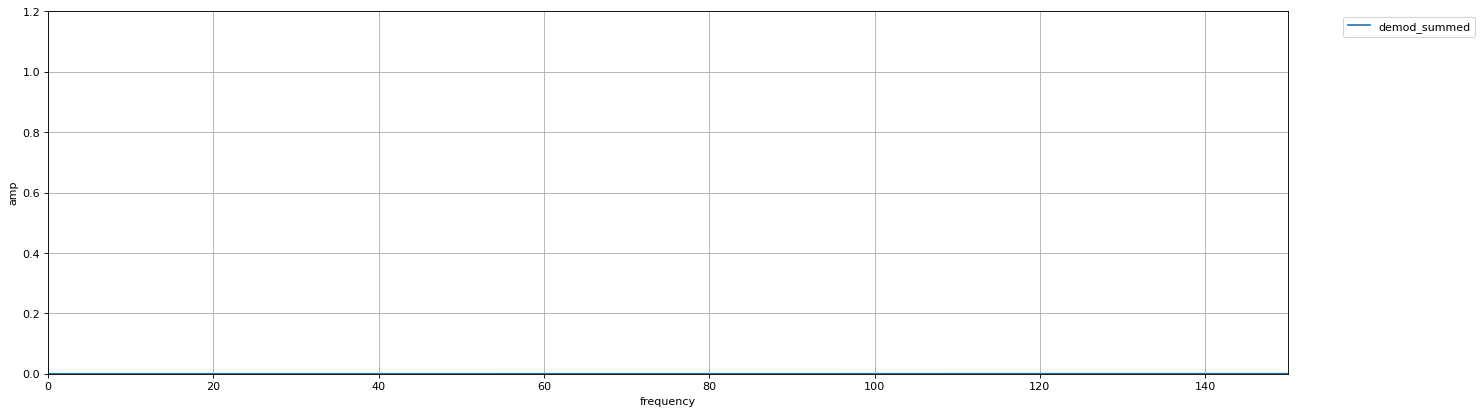

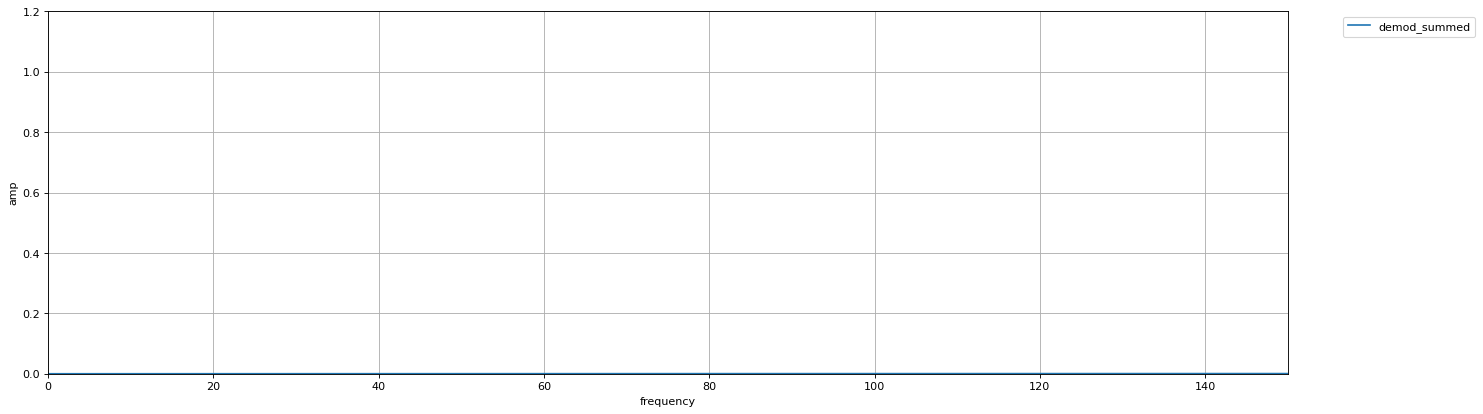

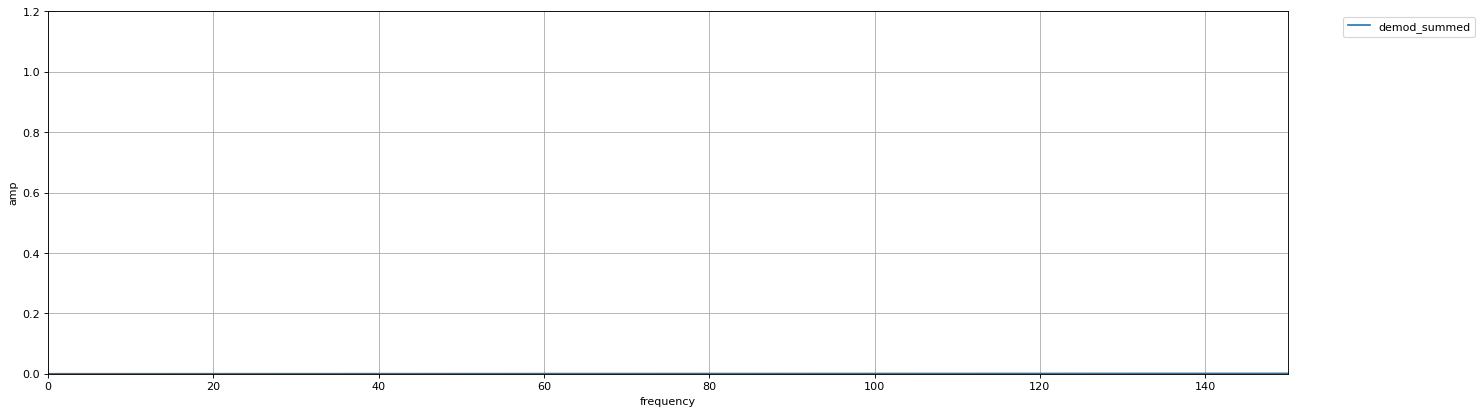

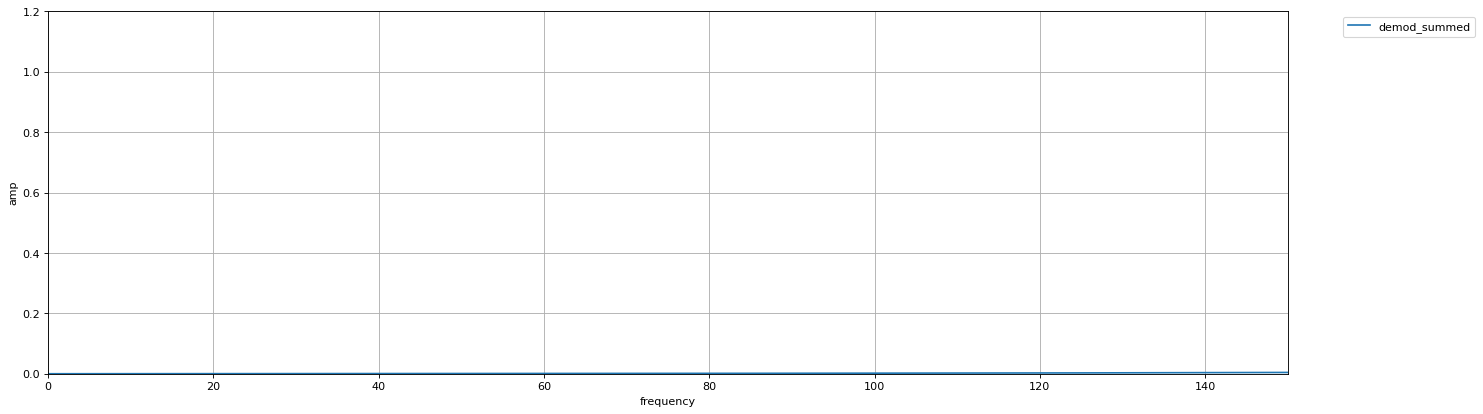

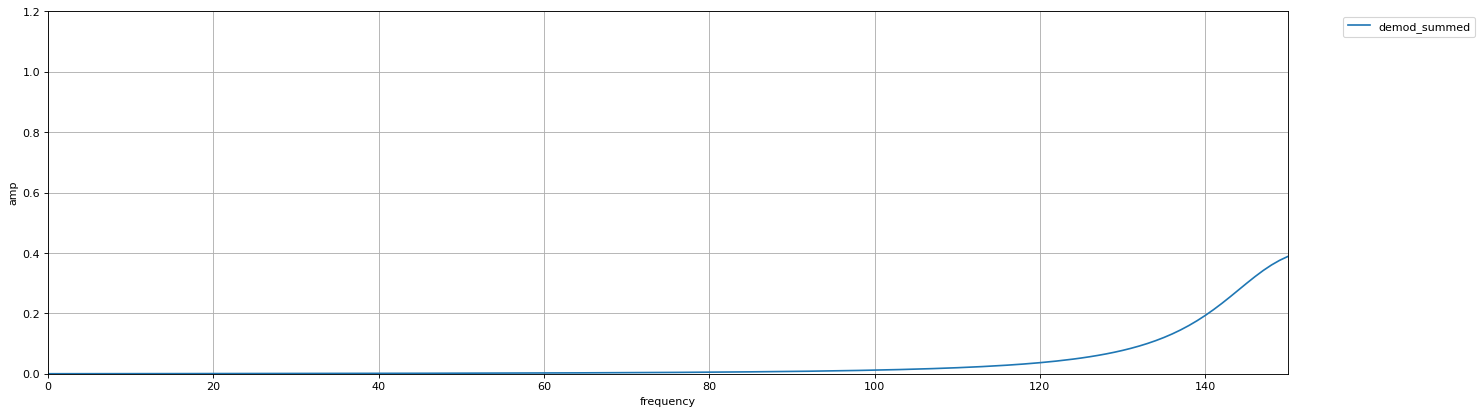

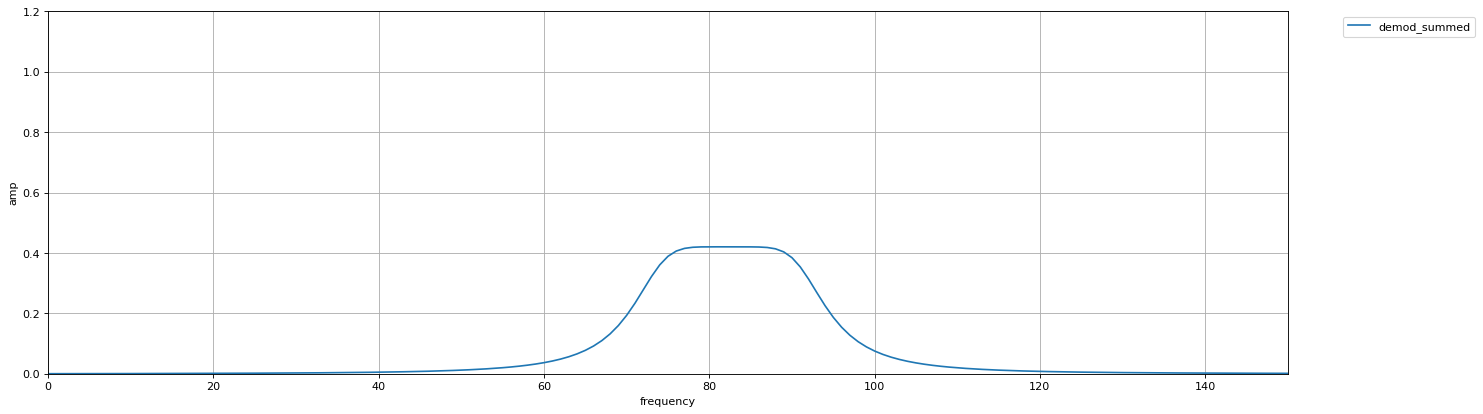

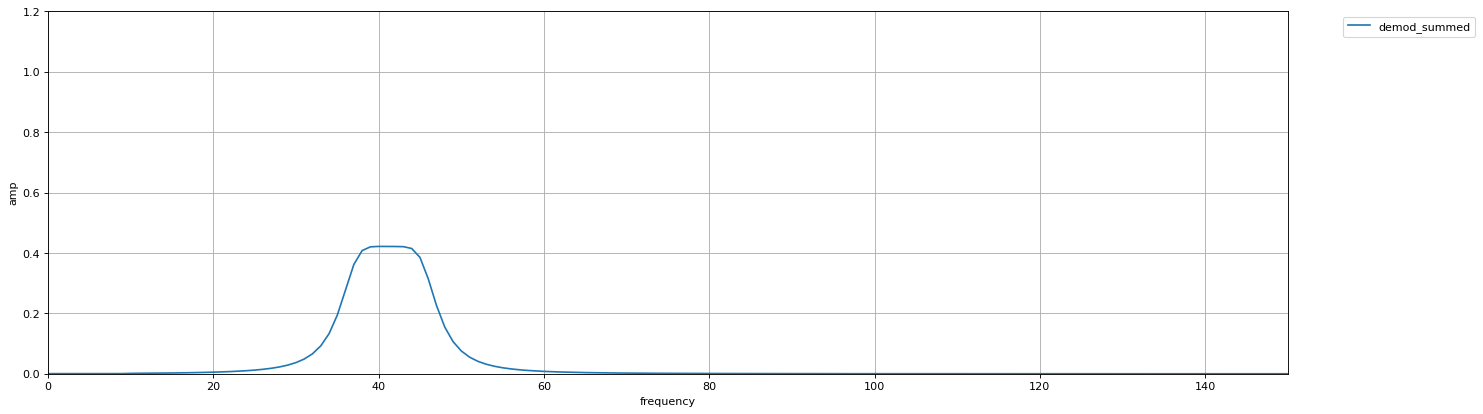

In [737]:
single_bank_fm = []

for i in range(8):
    single_bank_fm.append(starting_fm[4]/(2**i))
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])

for i in single_bank_fm:
    do_demodulation(sig, fs, i)

[4698.0, 2349.0, 1174.5, 587.25, 293.625, 146.8125, 73.40625, 36.703125]
[1914.1374019730542, 957.0687009865271, 478.53435049326356, 239.26717524663178, 119.63358762331589, 59.816793811657945, 29.908396905828972, 14.954198452914486]


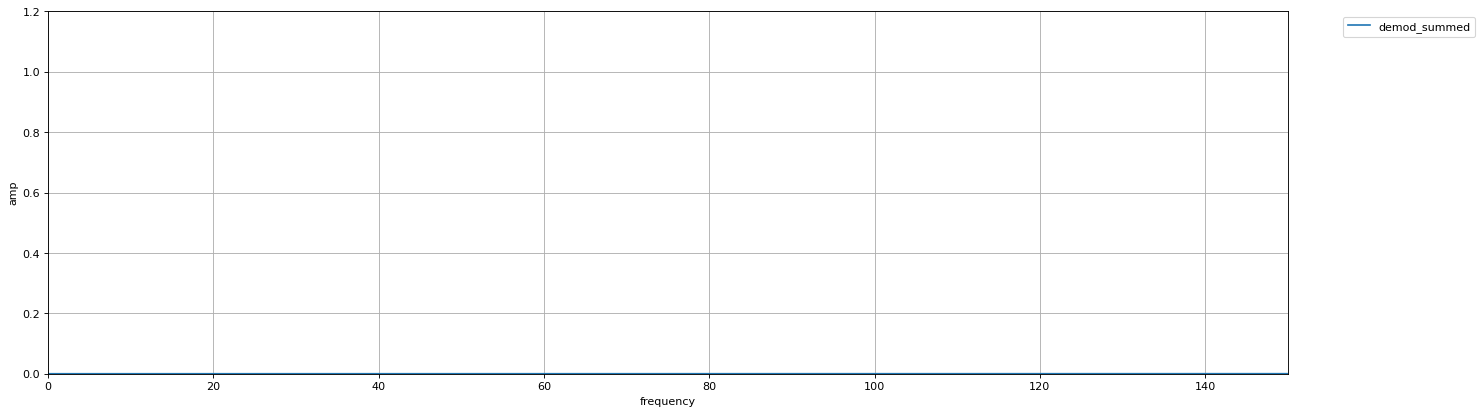

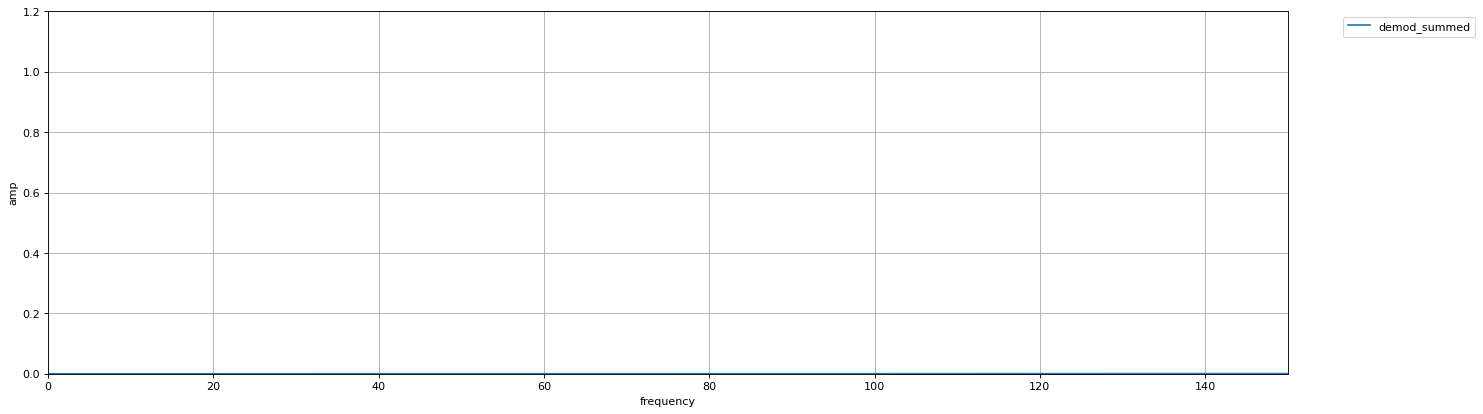

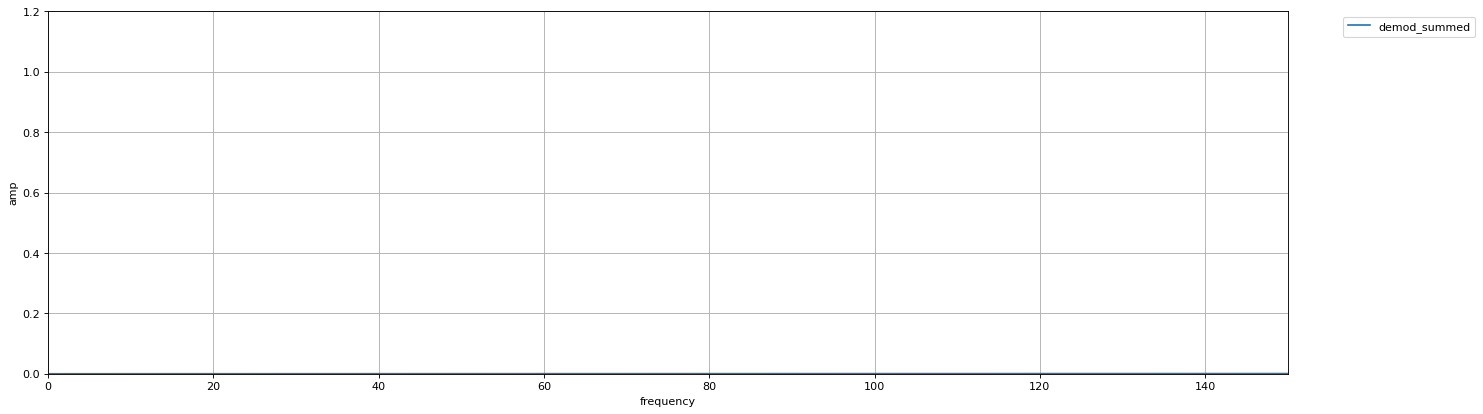

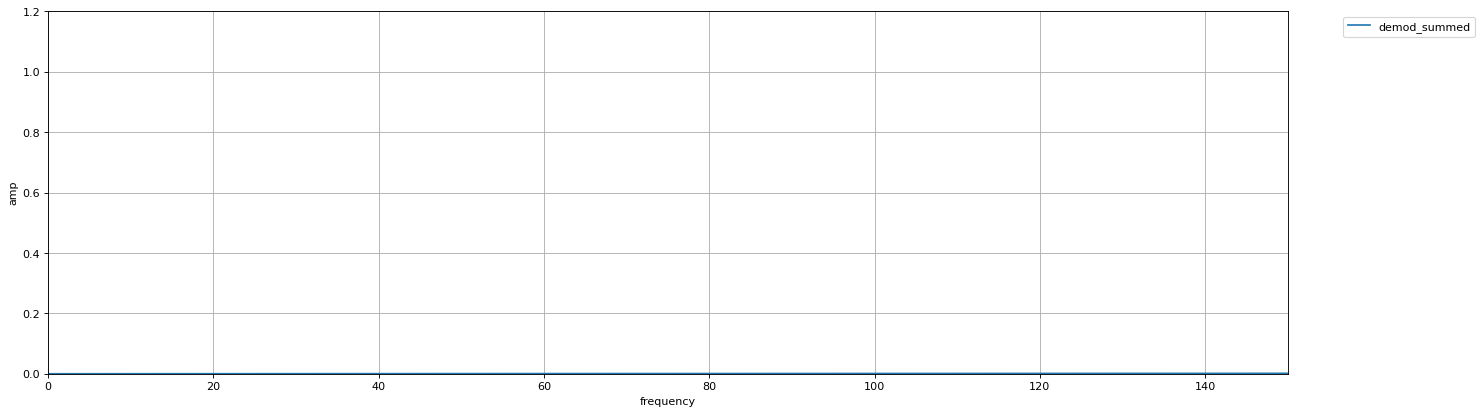

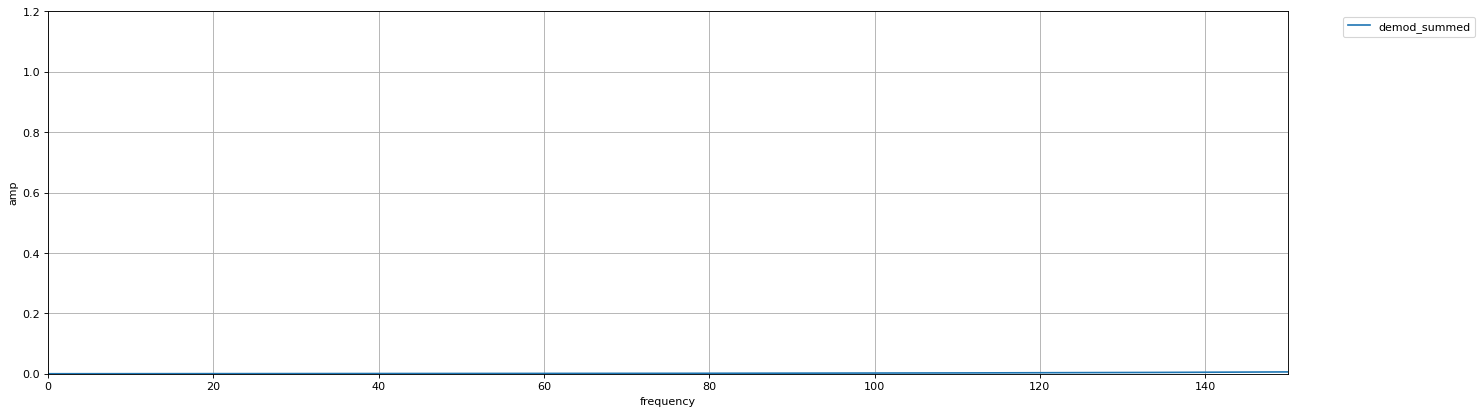

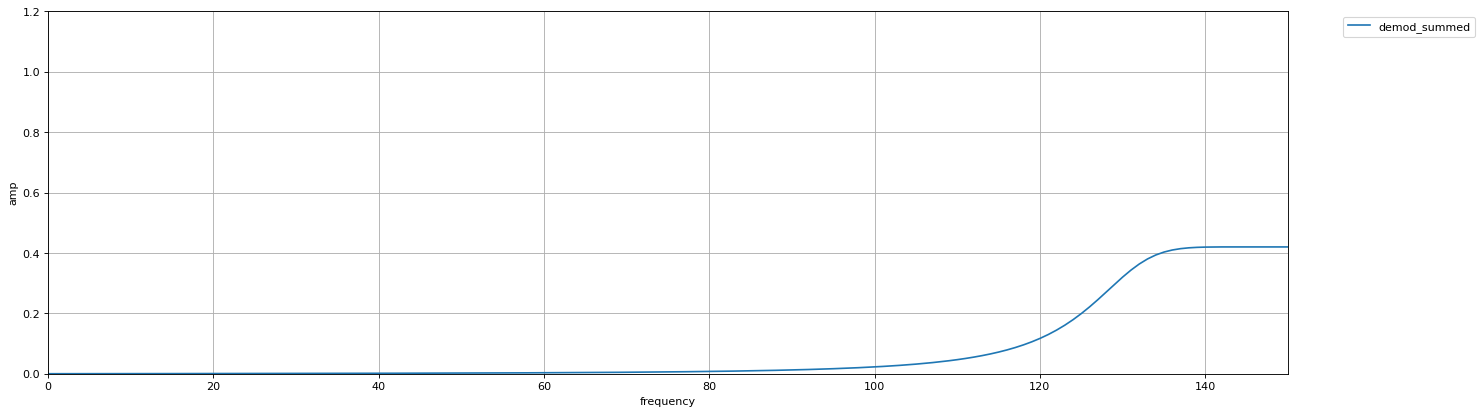

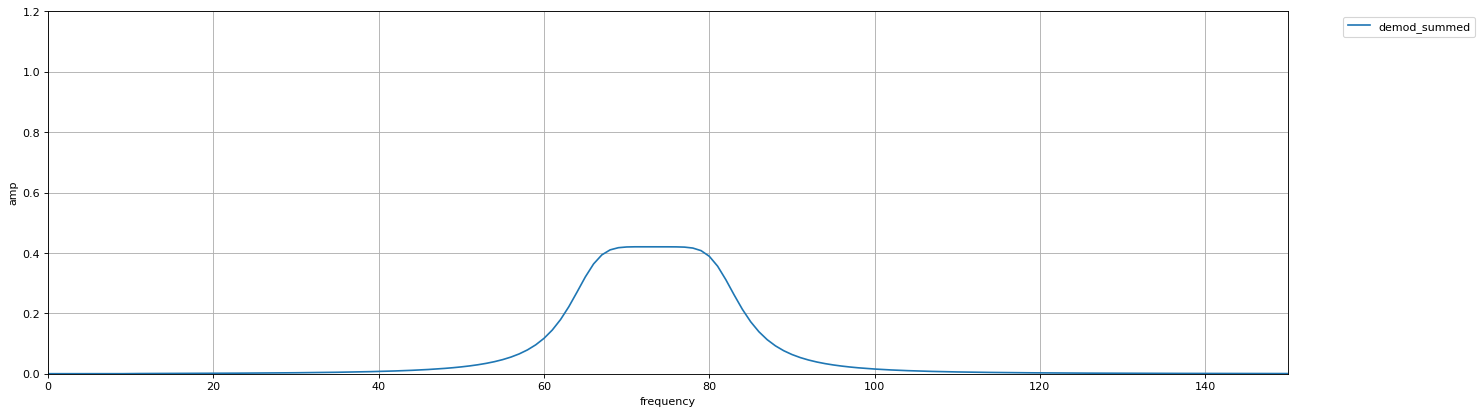

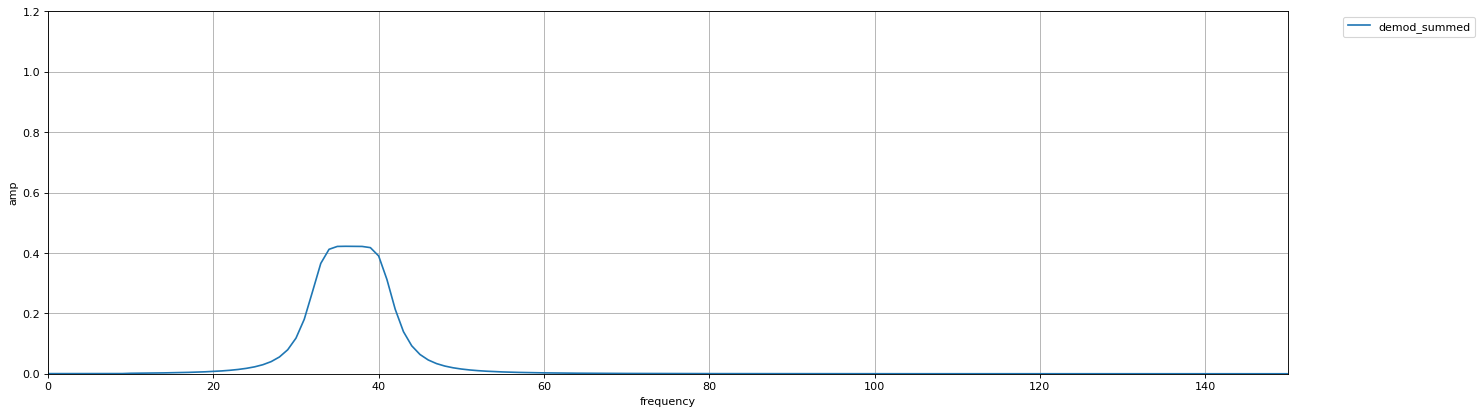

In [738]:
single_bank_fm = []

for i in range(8):
    single_bank_fm.append(starting_fm[5]/(2**i))
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])

for i in single_bank_fm:
    do_demodulation(sig, fs, i)

[4186.0, 2093.0, 1046.5, 523.25, 261.625, 130.8125, 65.40625, 32.703125]
[1705.529834963645, 852.7649174818225, 426.38245874091126, 213.19122937045563, 106.59561468522782, 53.29780734261391, 26.648903671306954, 13.324451835653477]


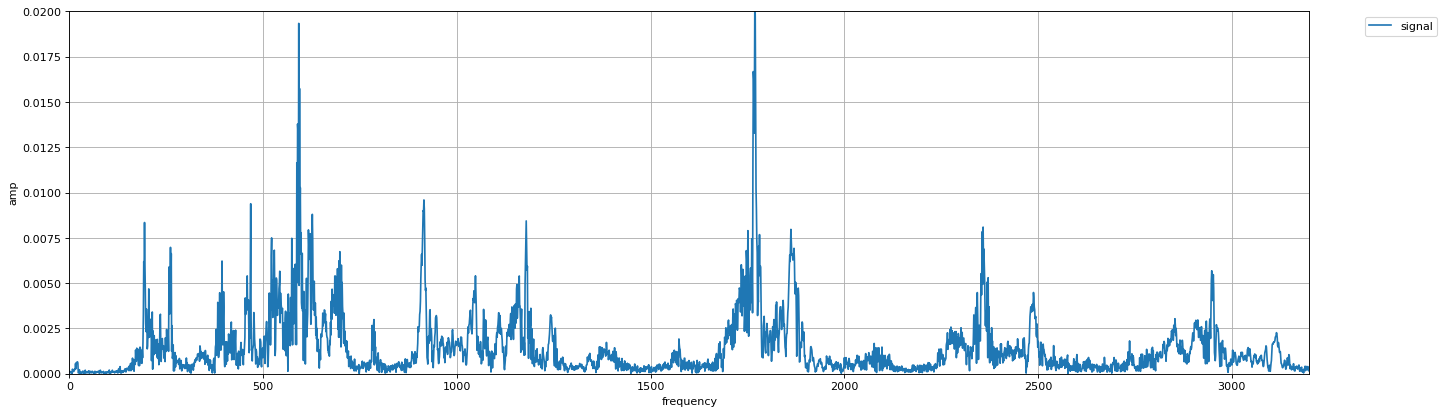

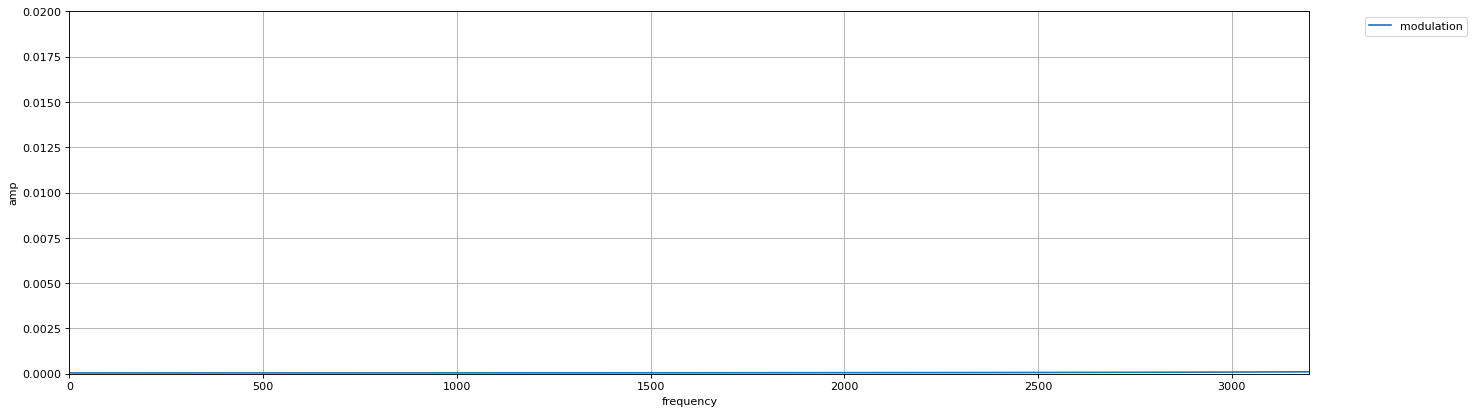

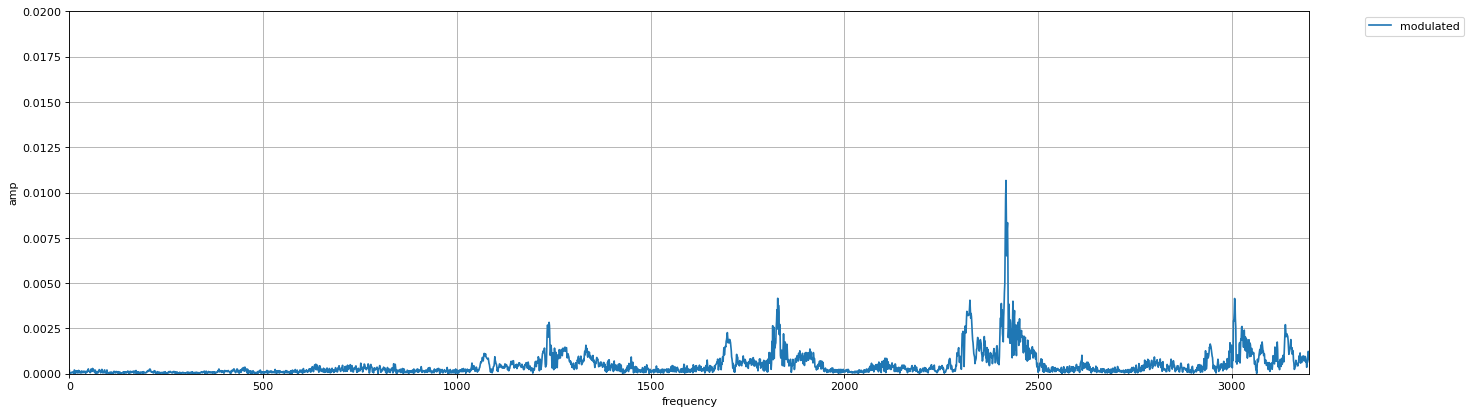

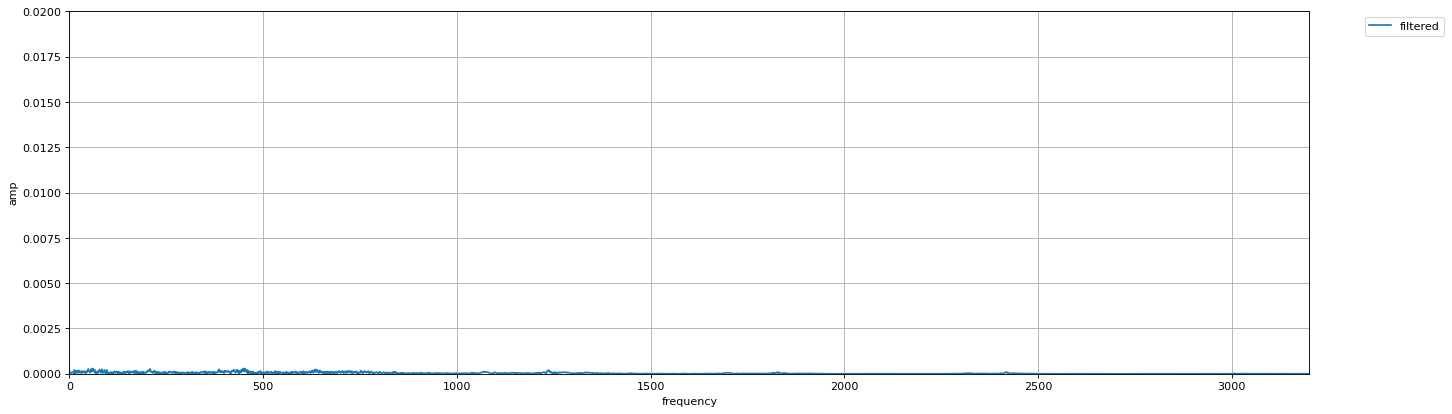

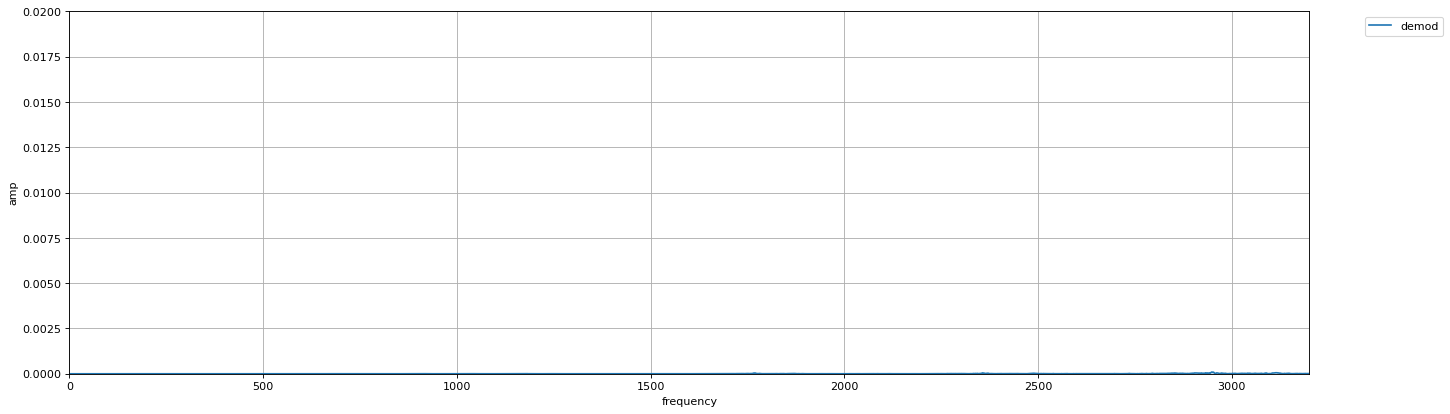

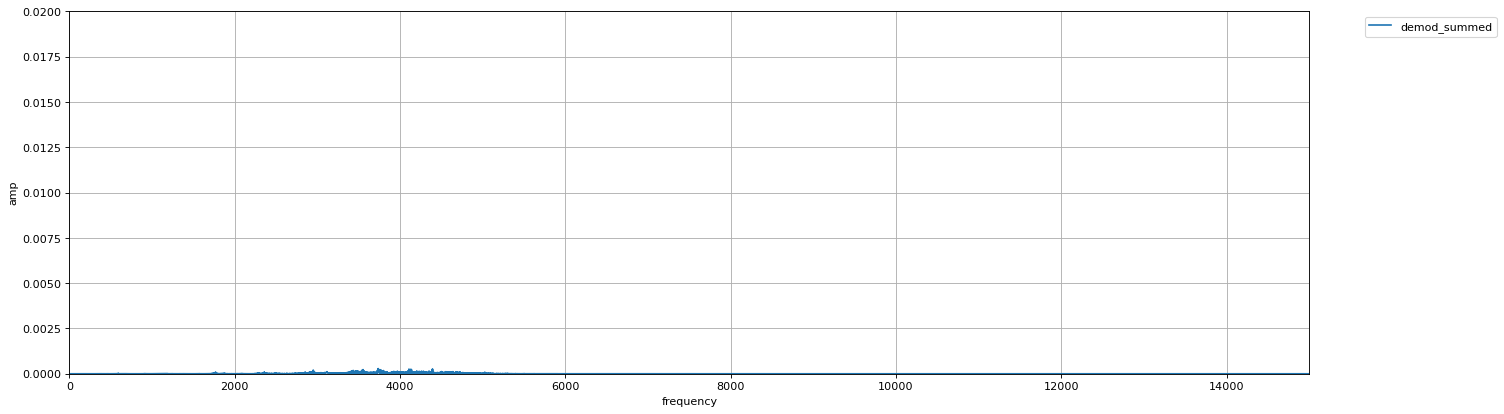

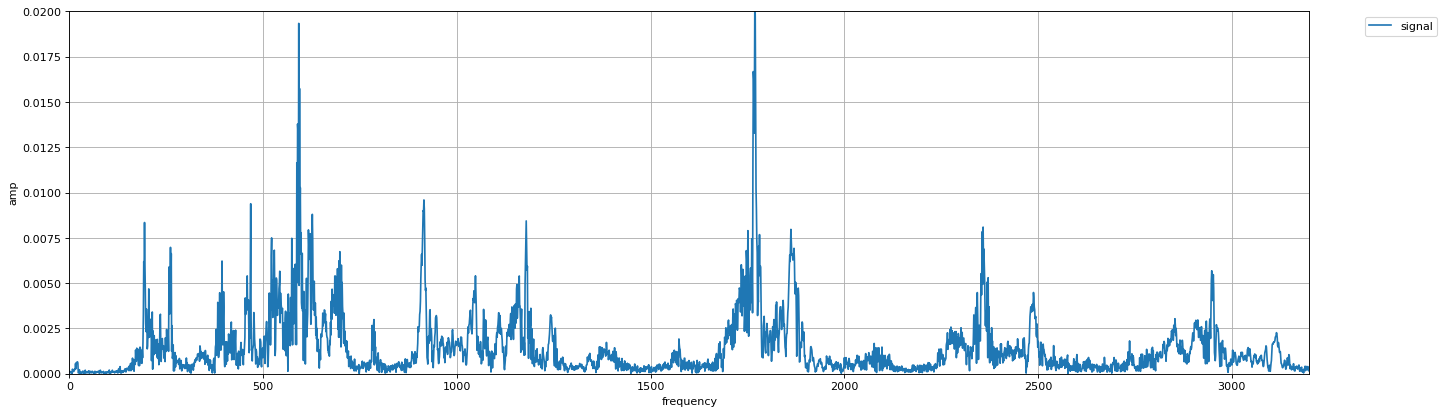

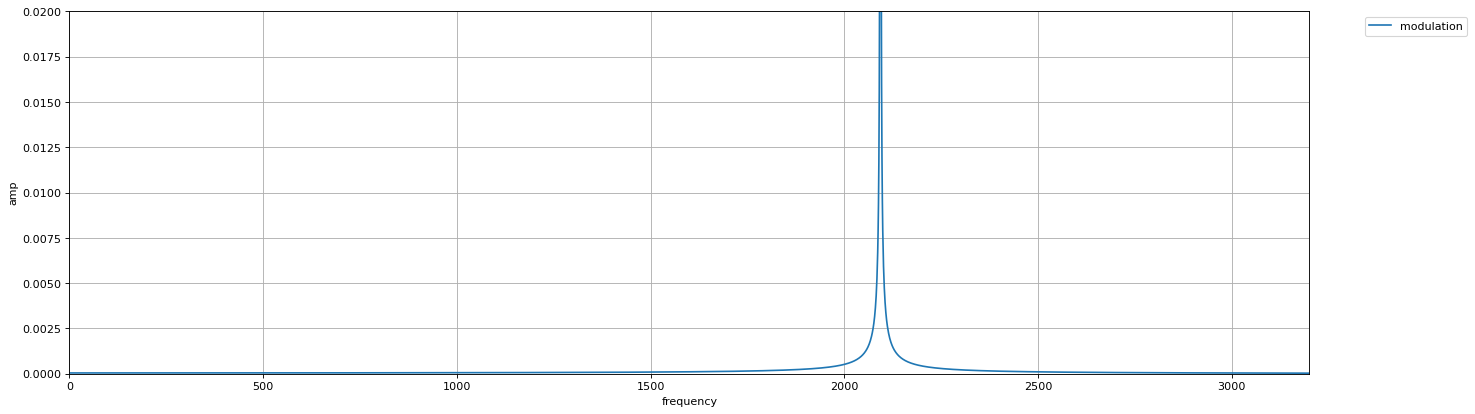

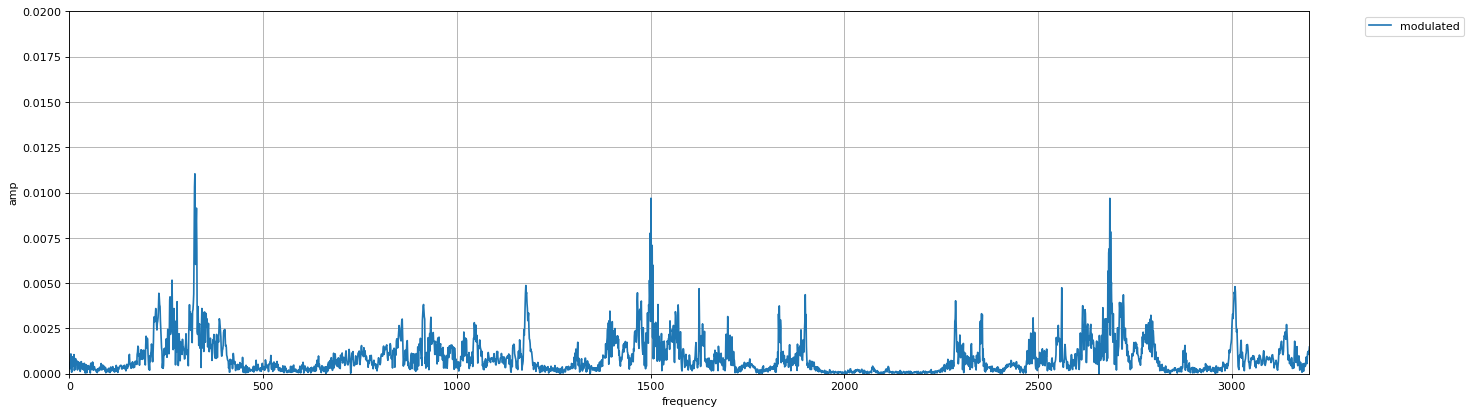

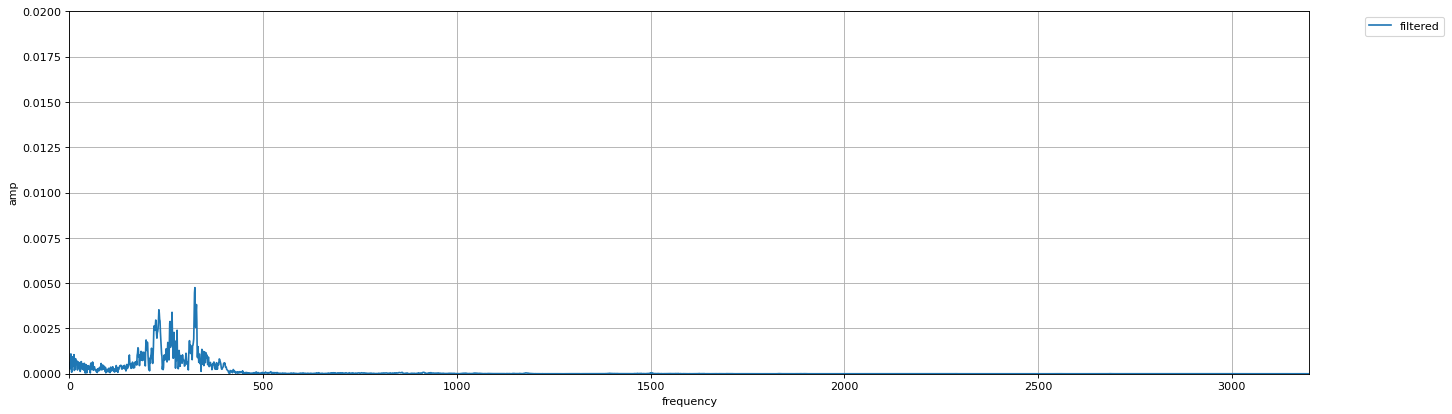

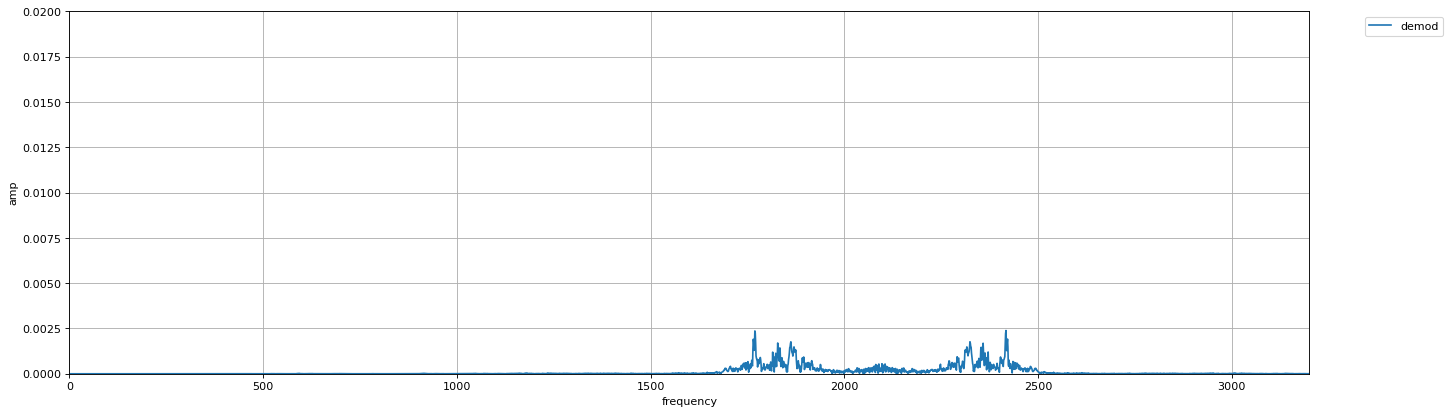

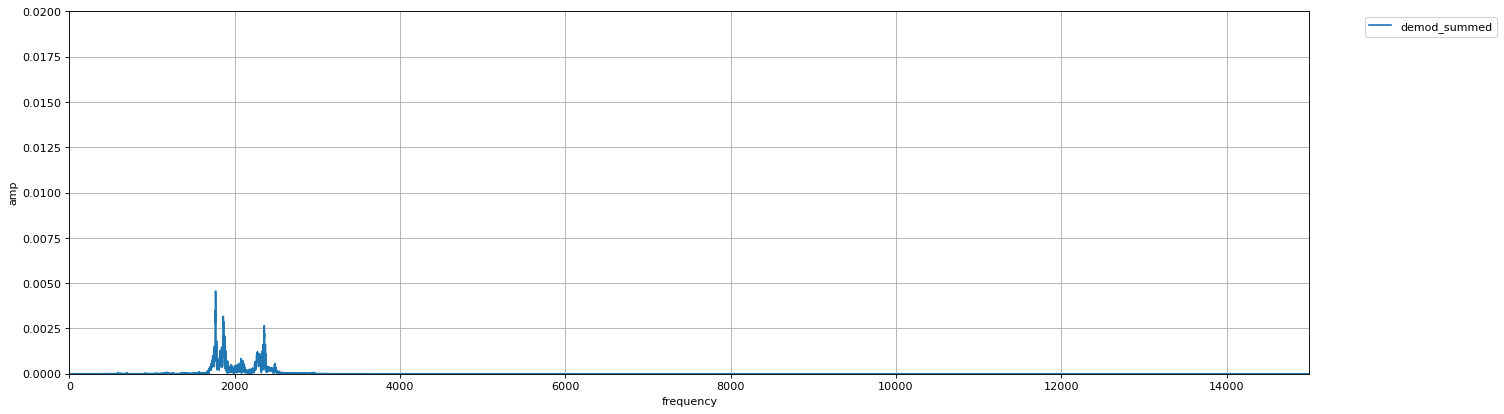

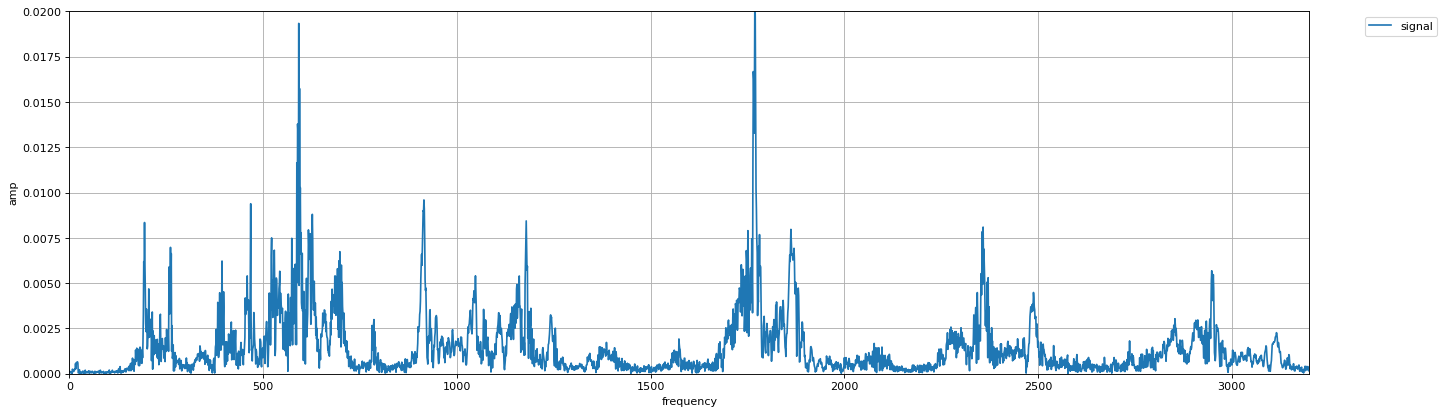

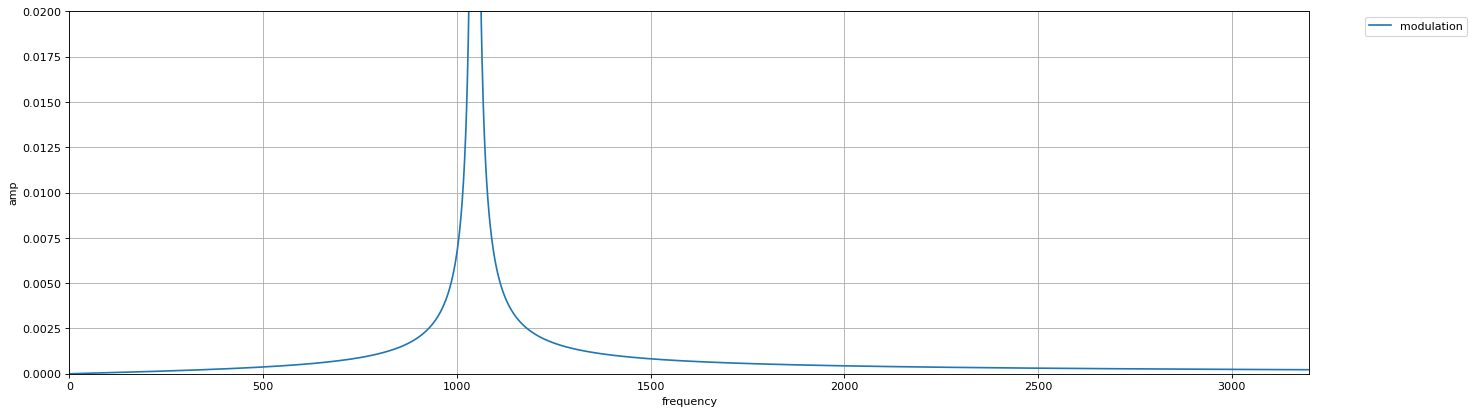

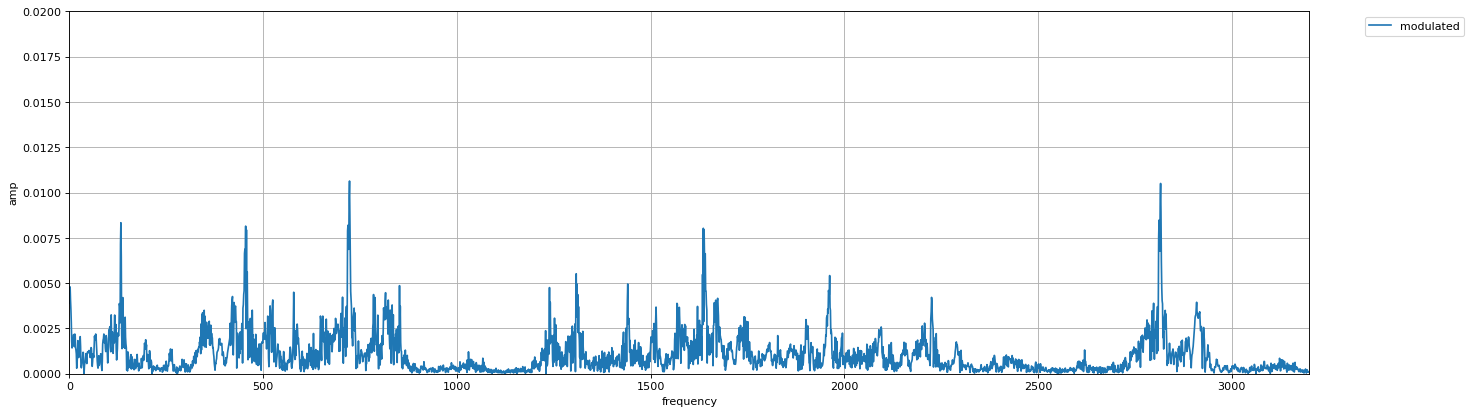

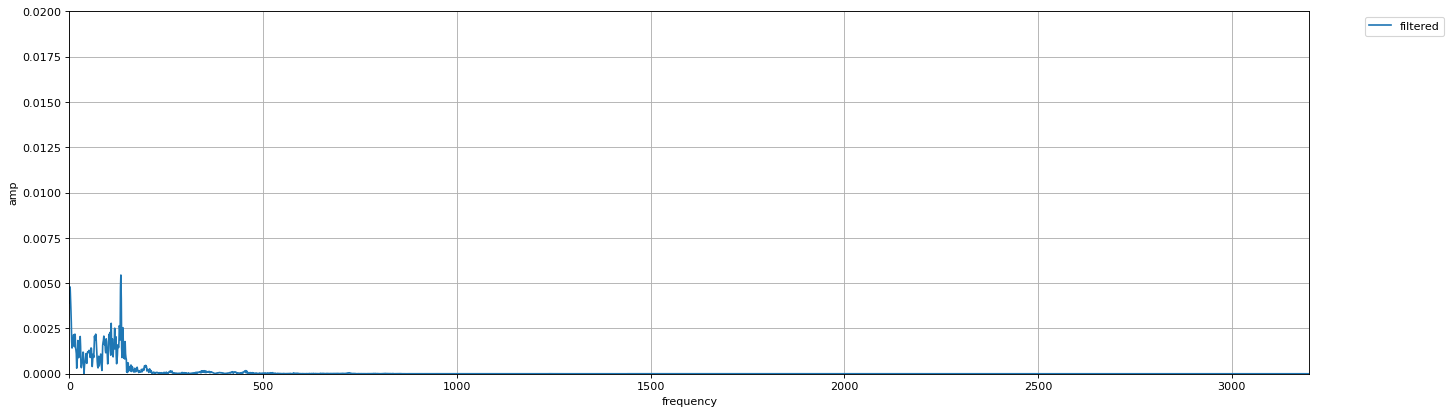

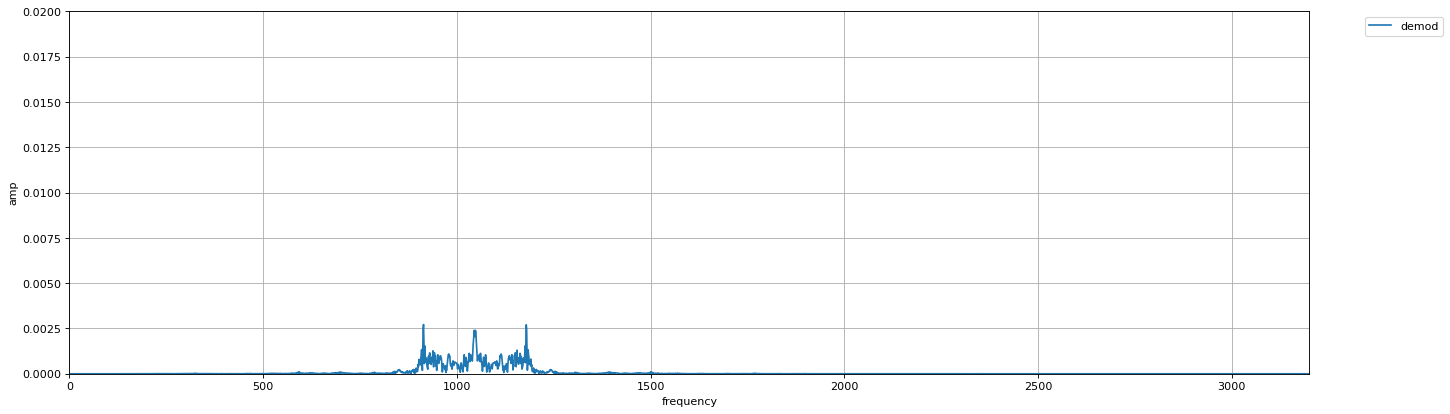

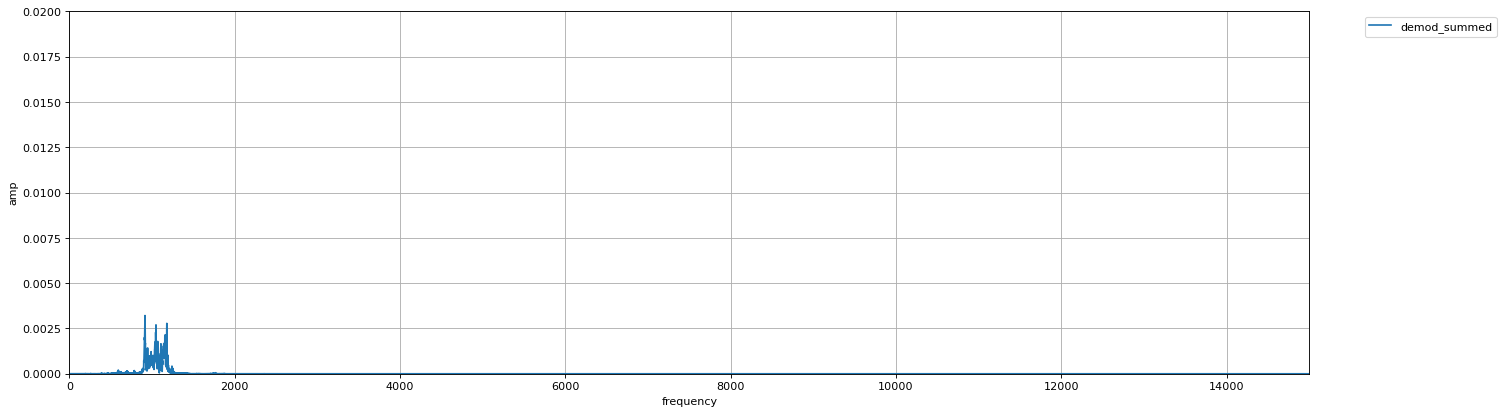

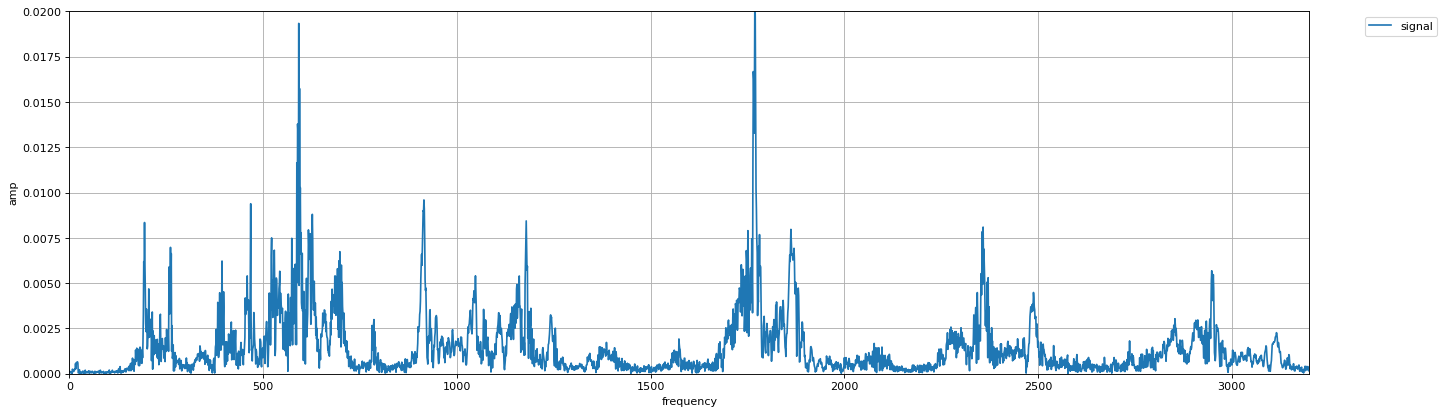

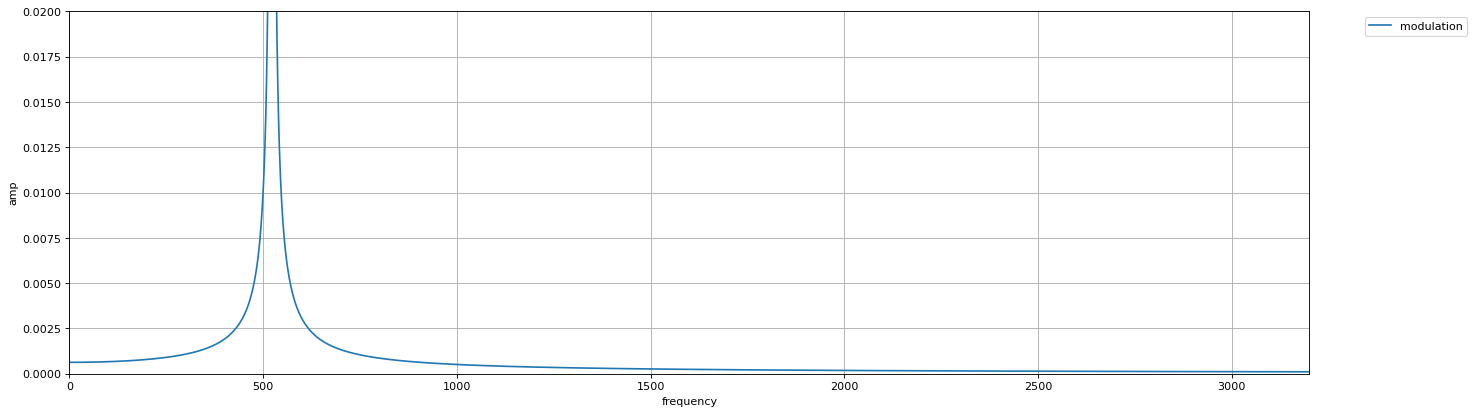

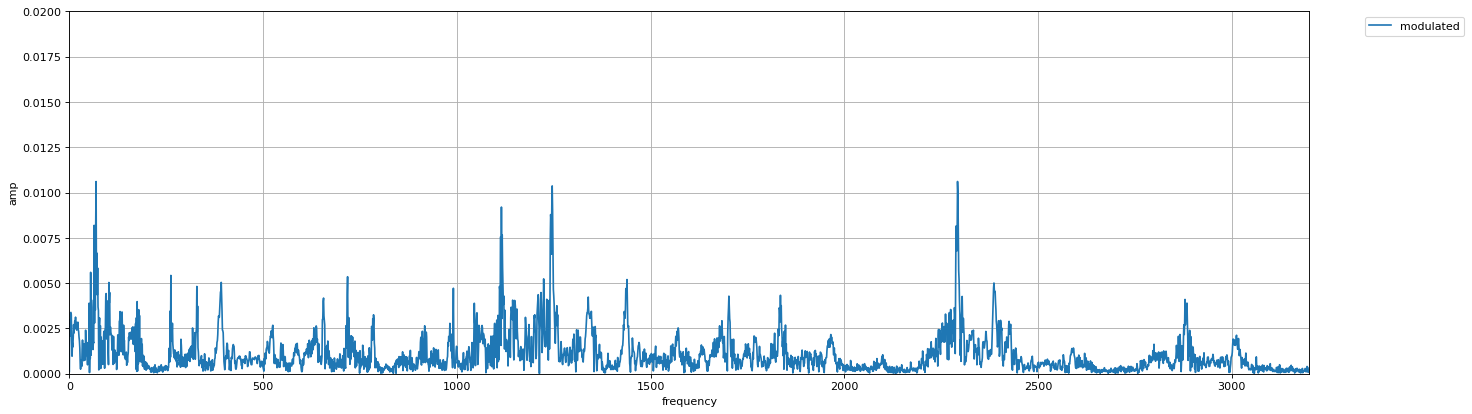

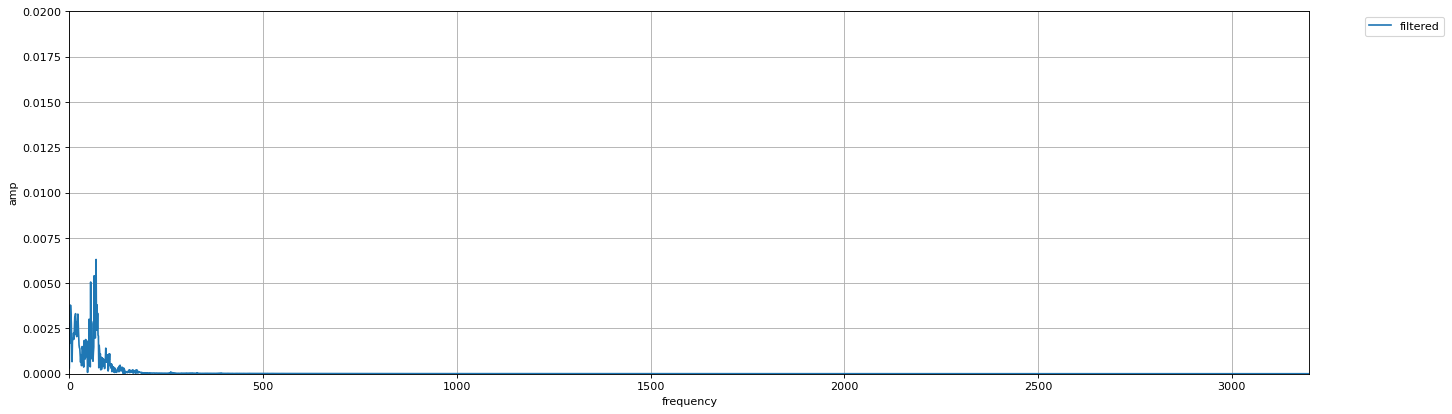

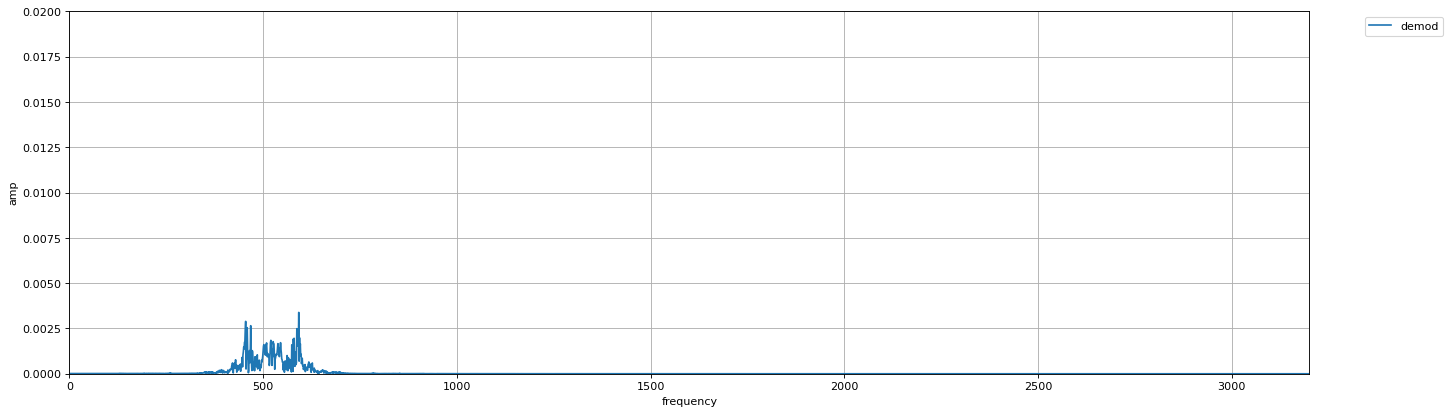

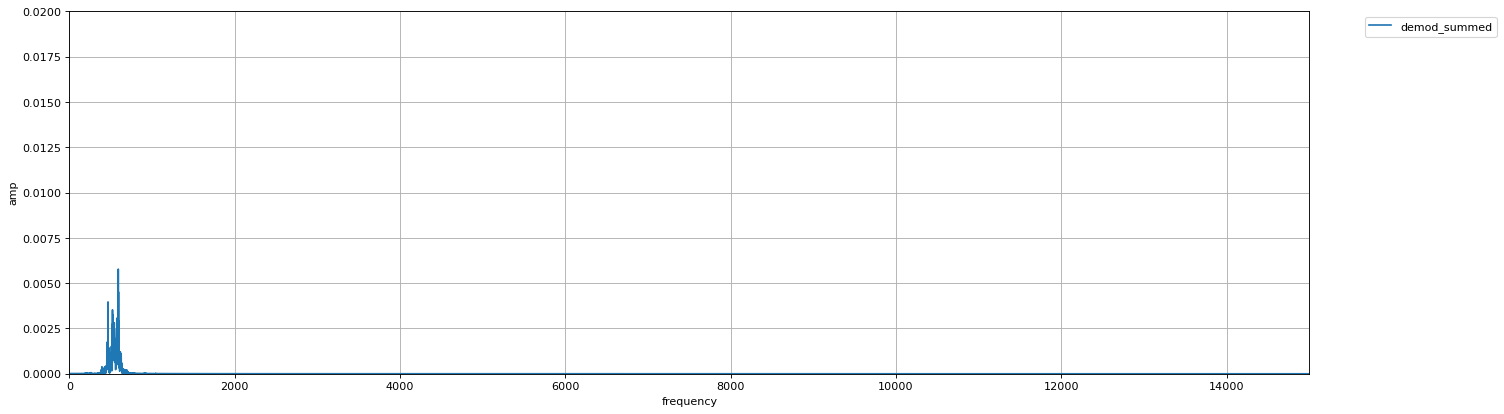

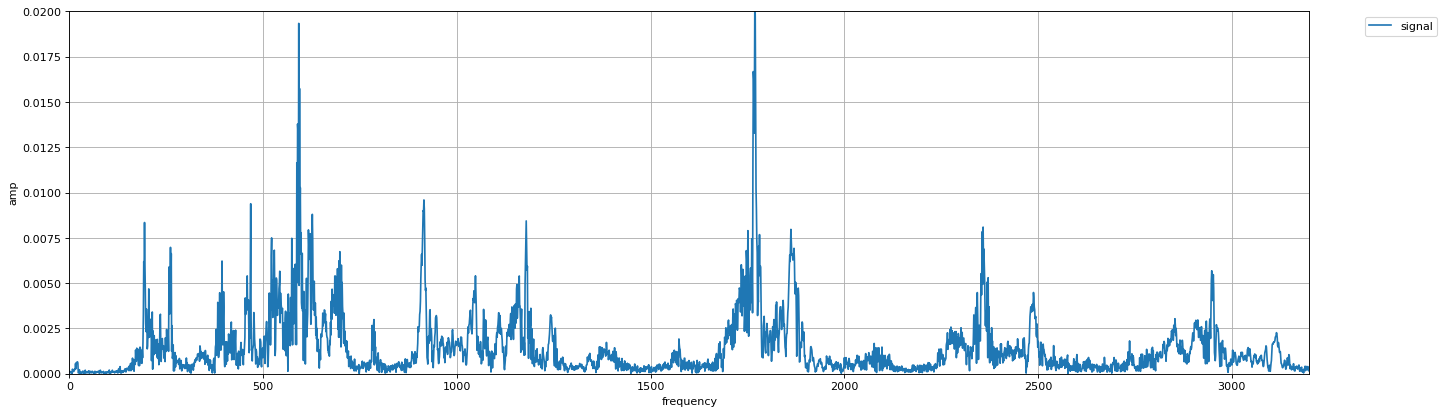

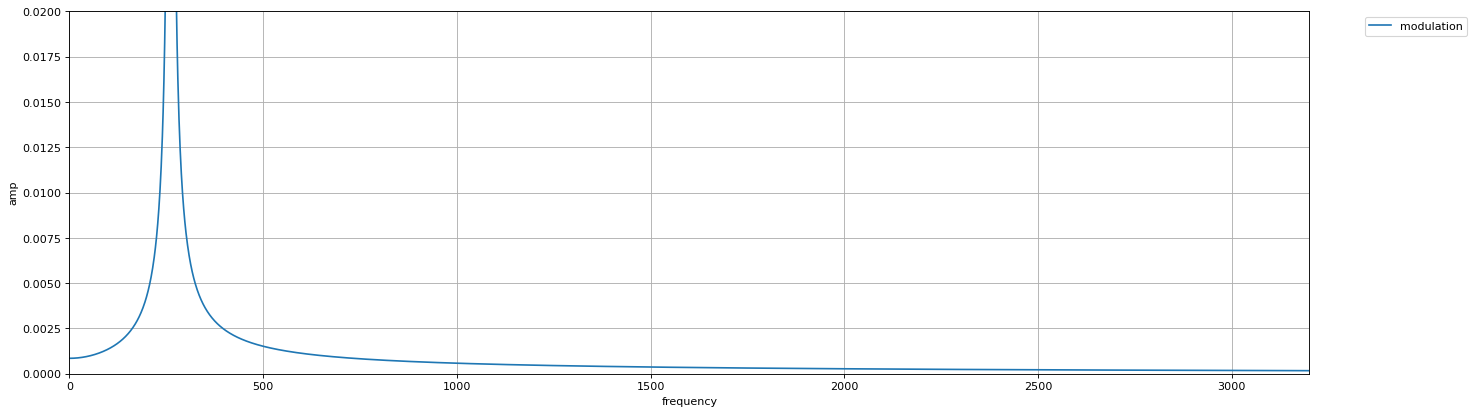

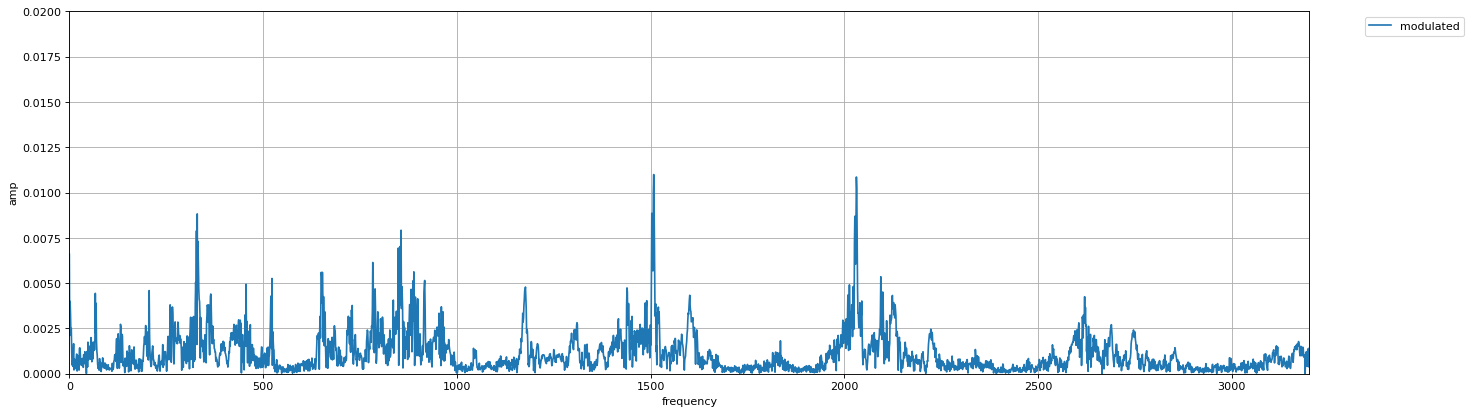

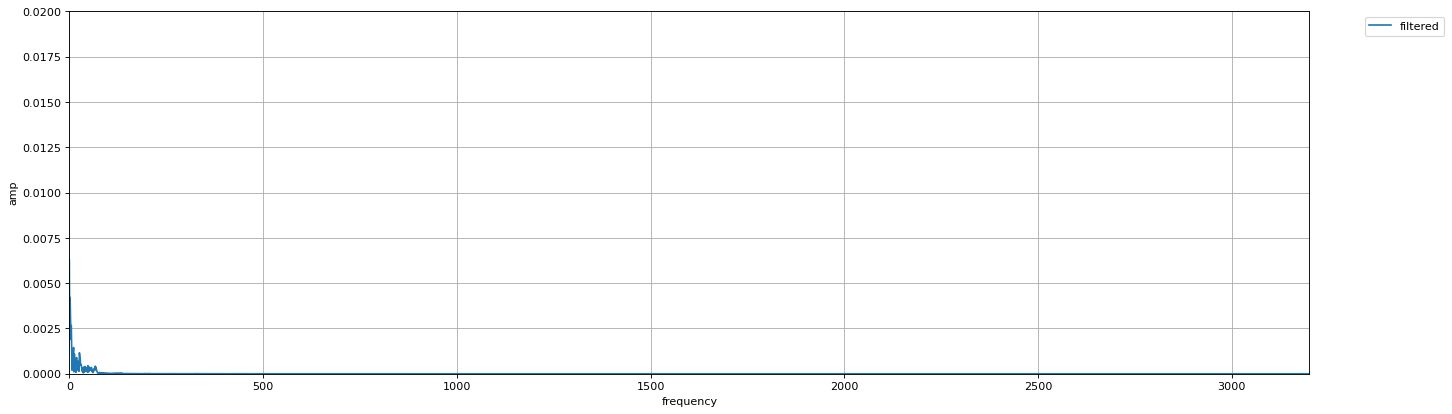

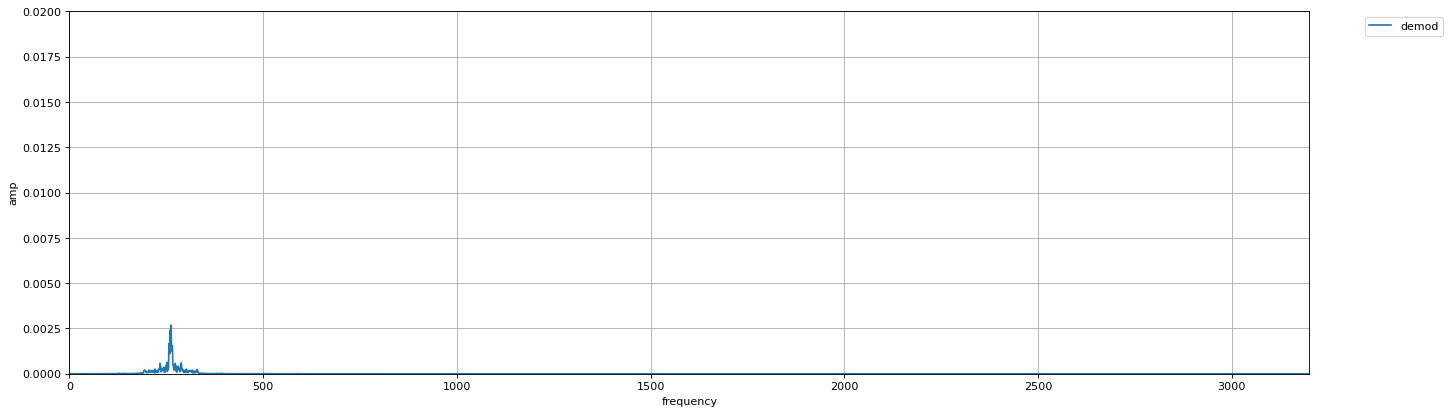

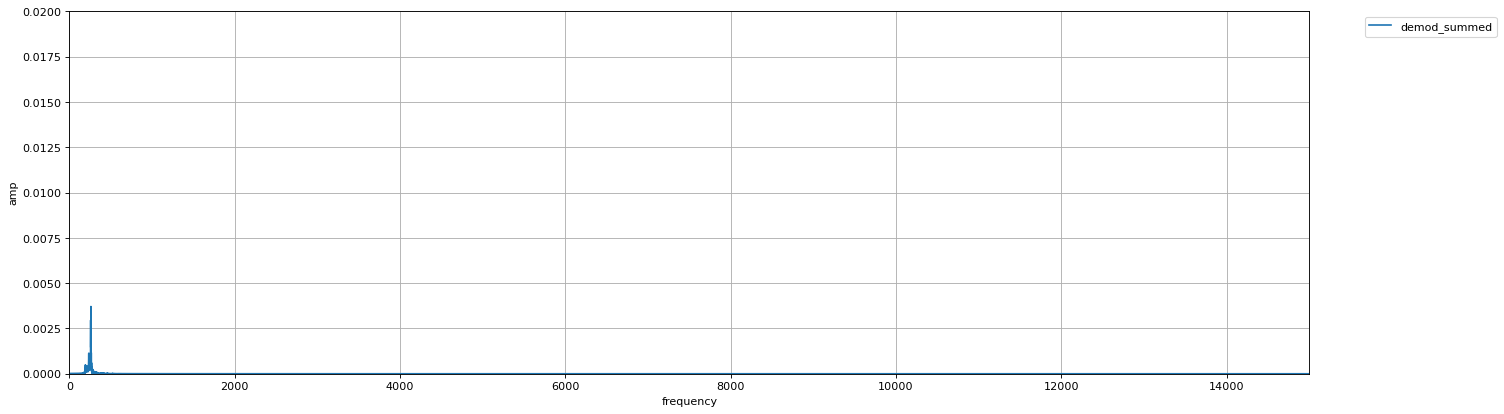

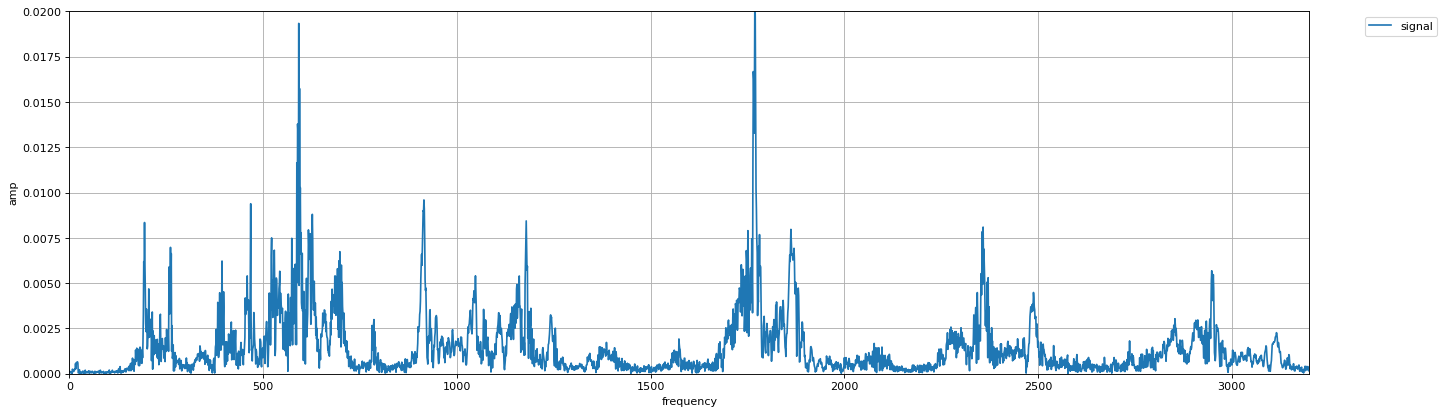

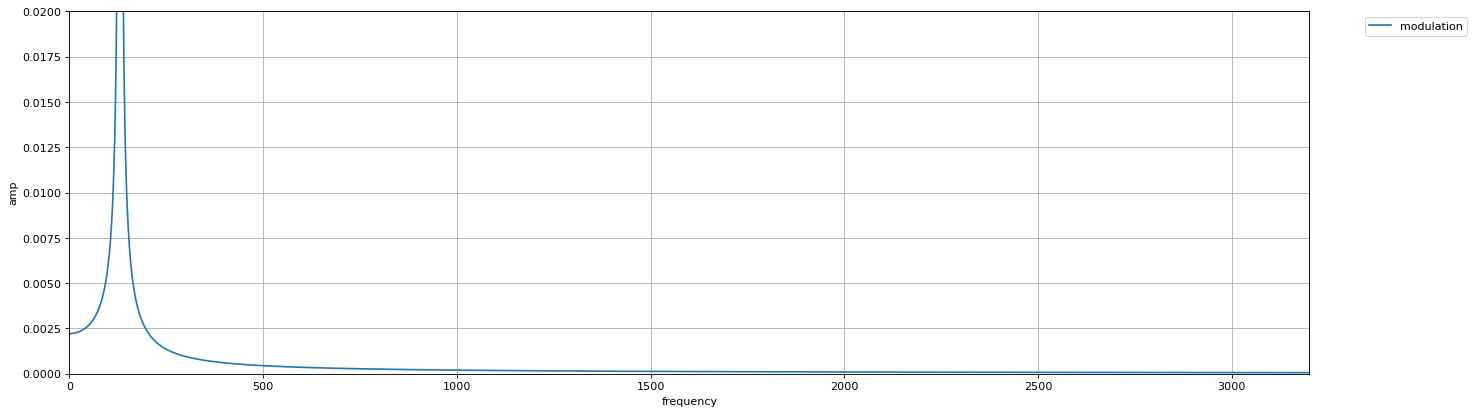

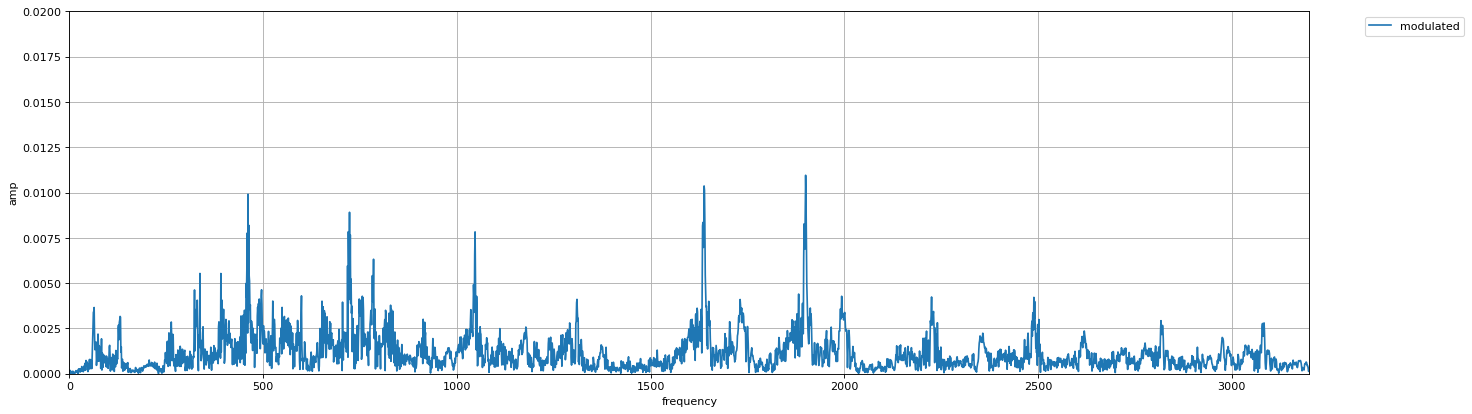

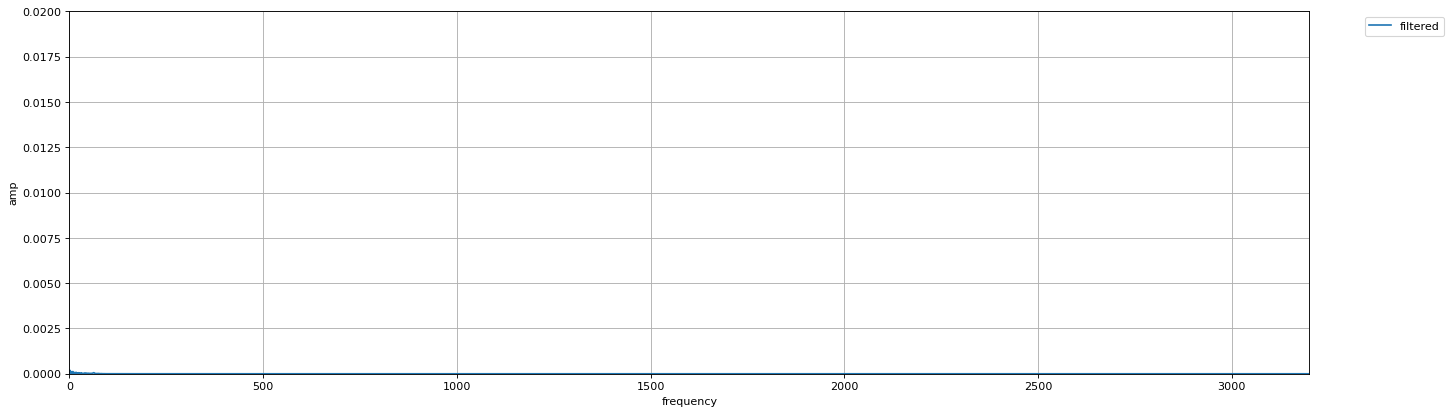

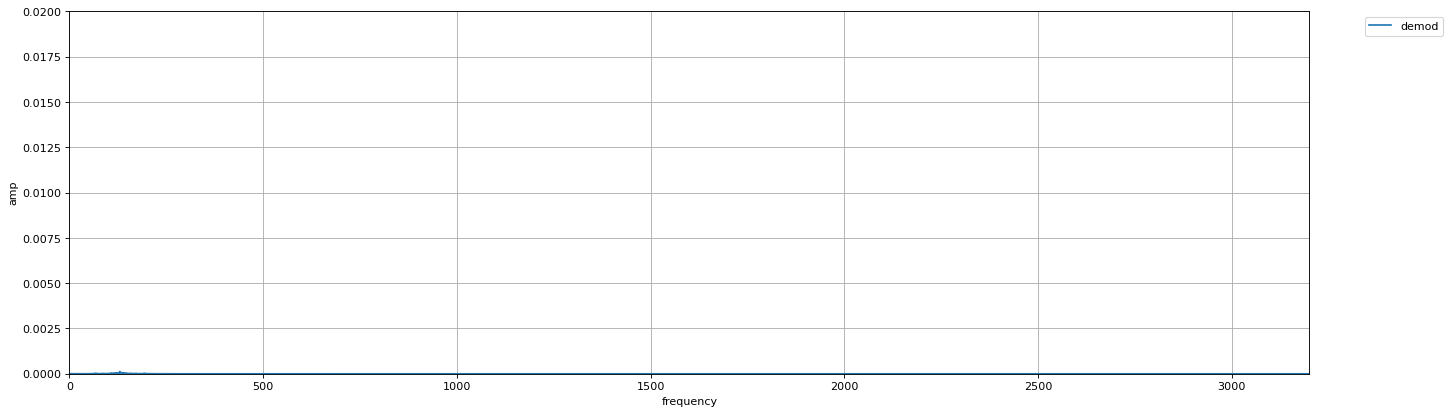

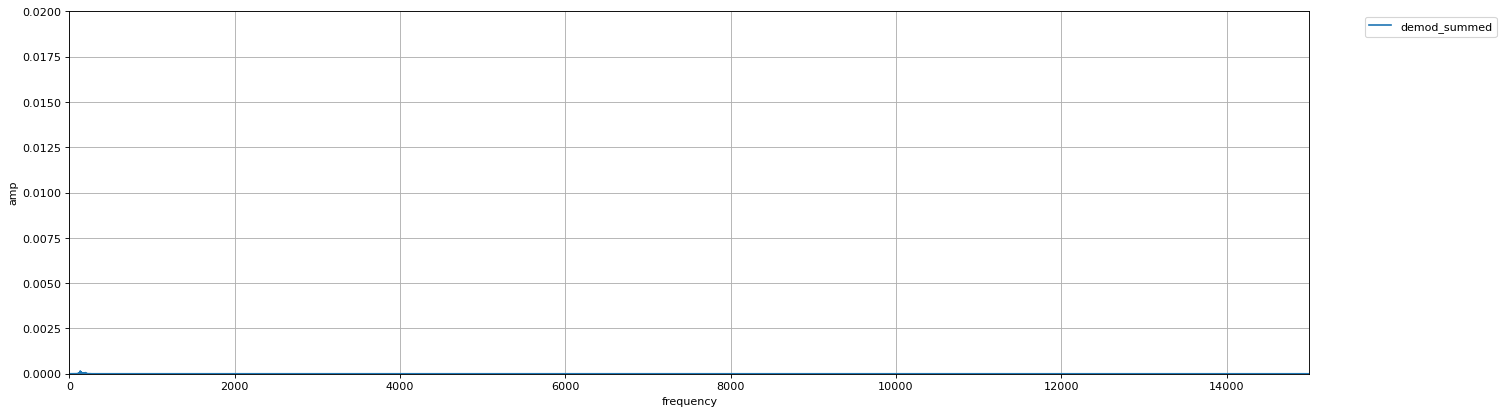

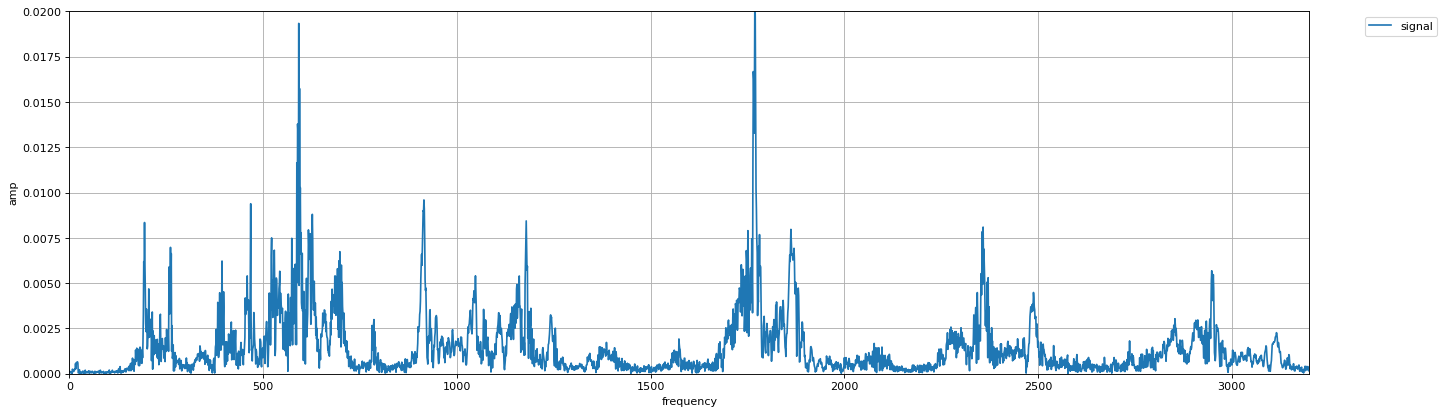

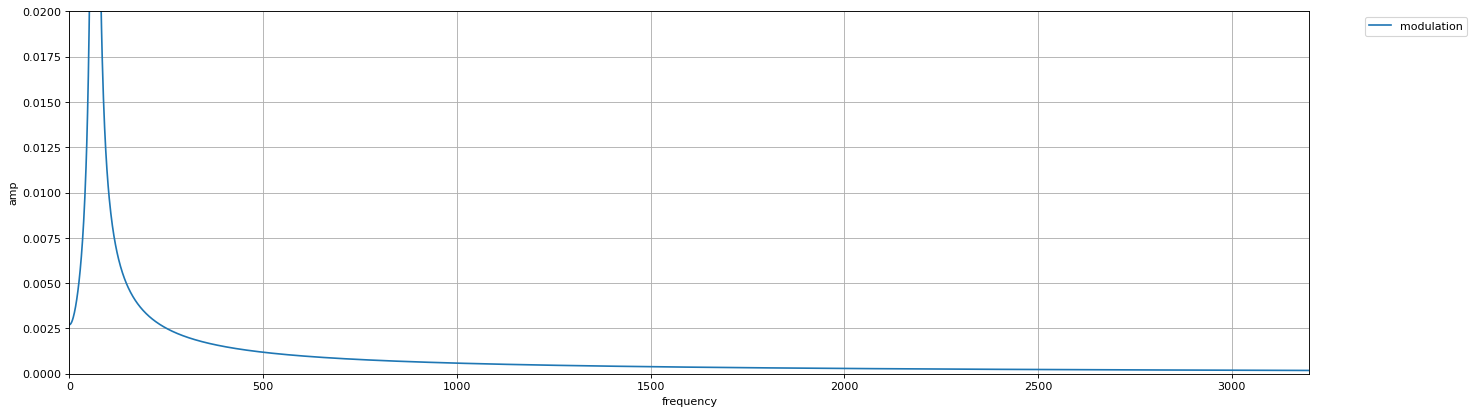

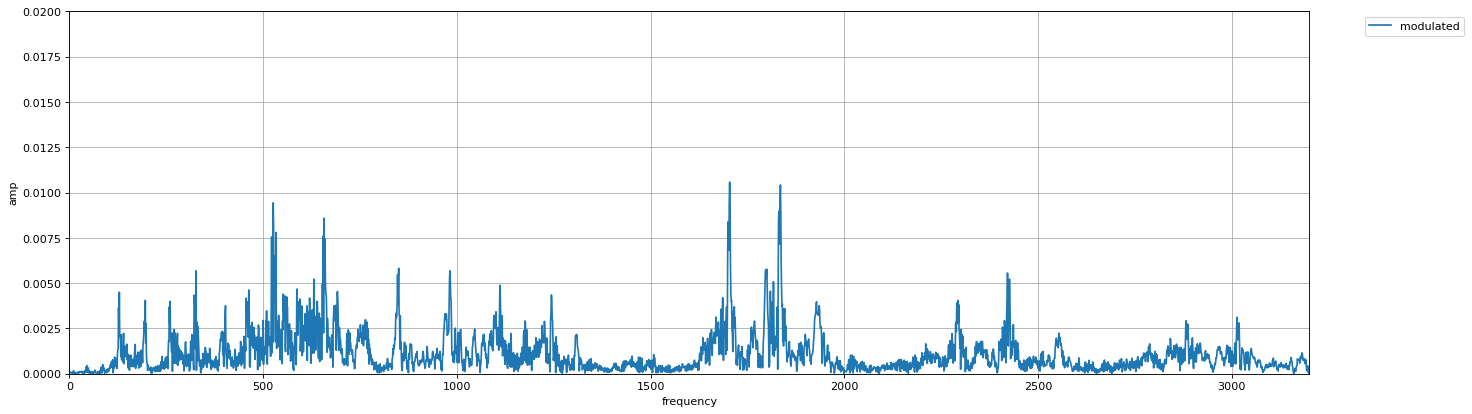

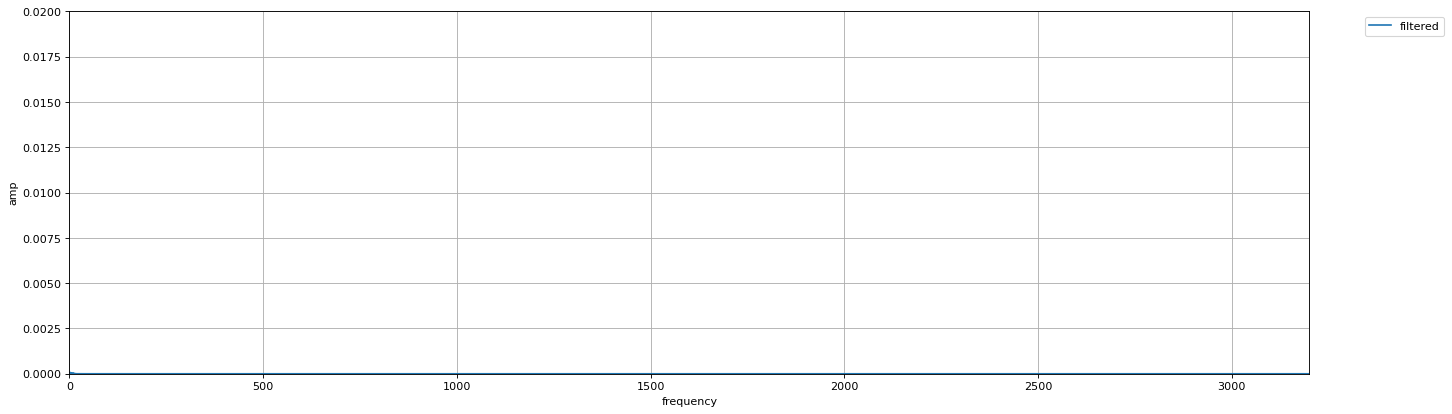

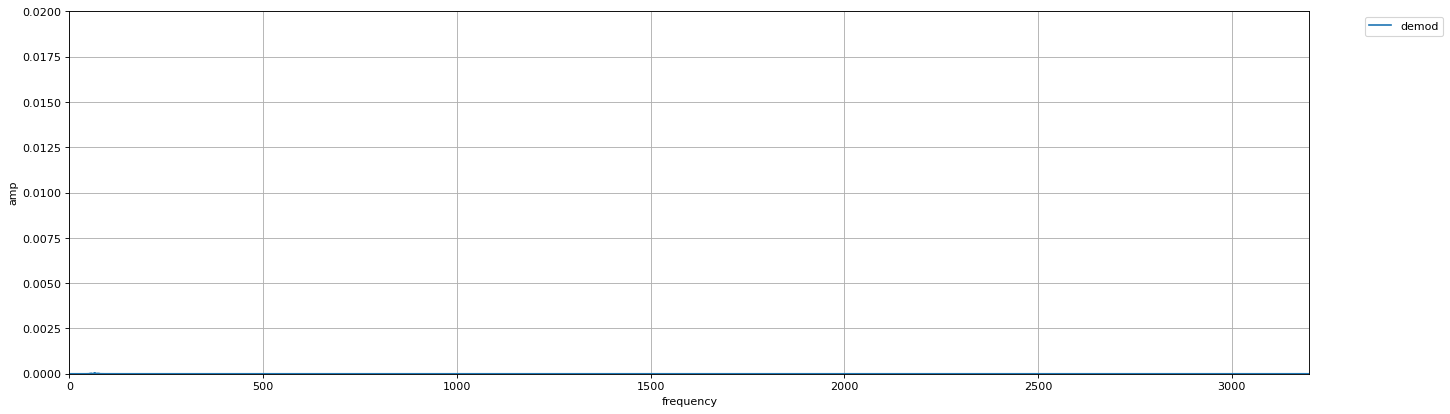

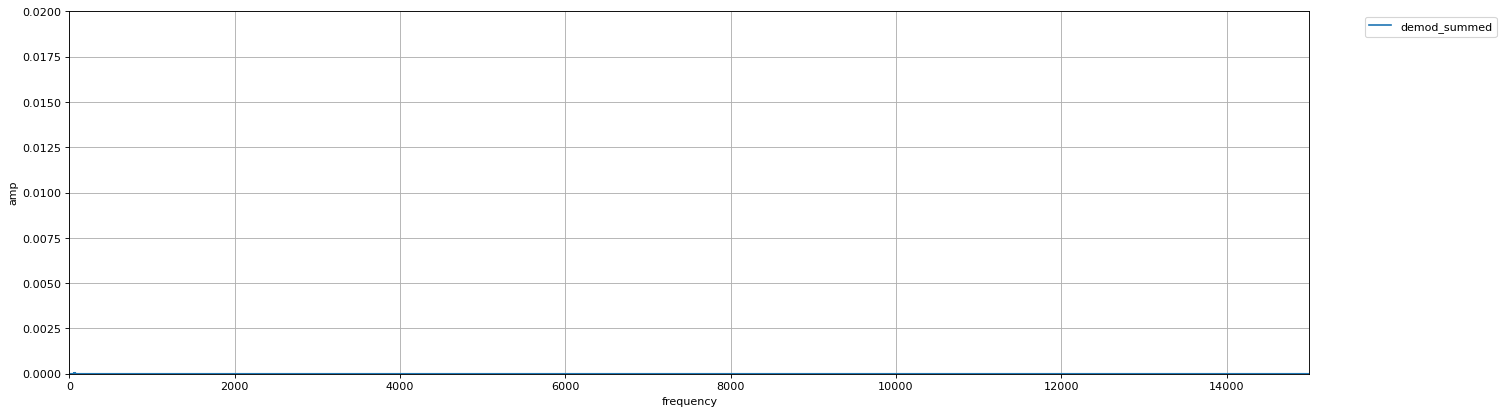

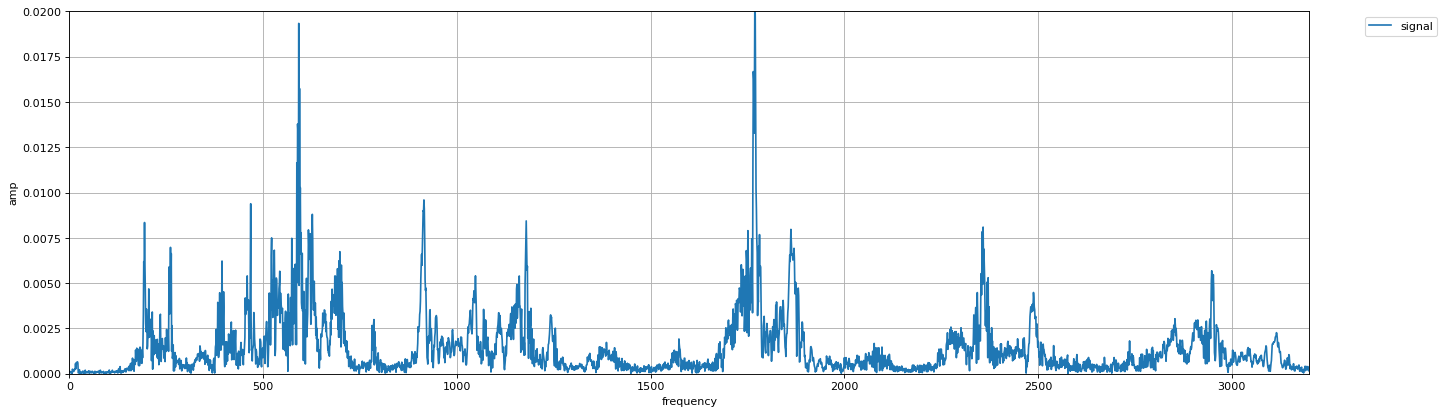

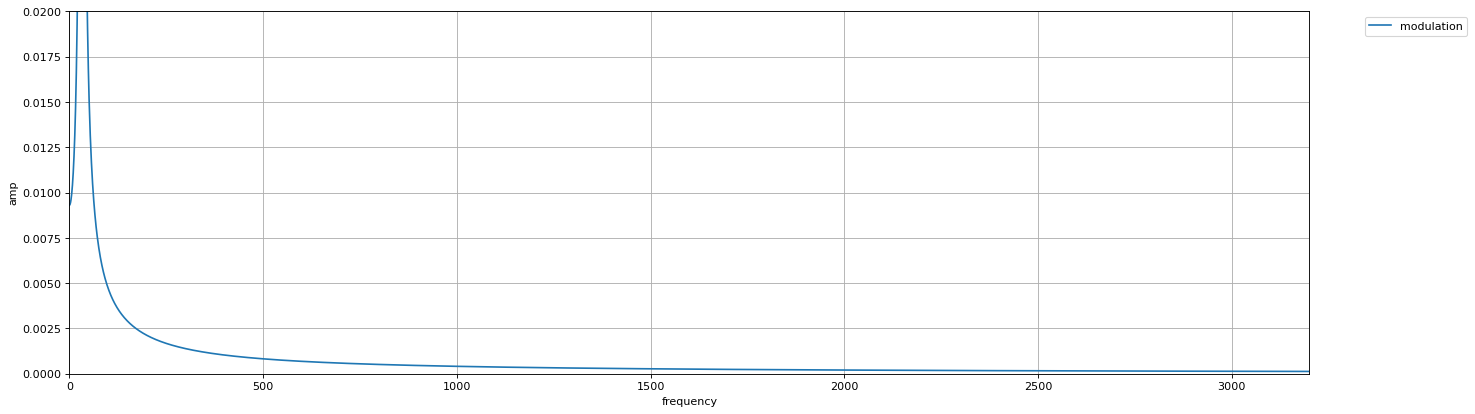

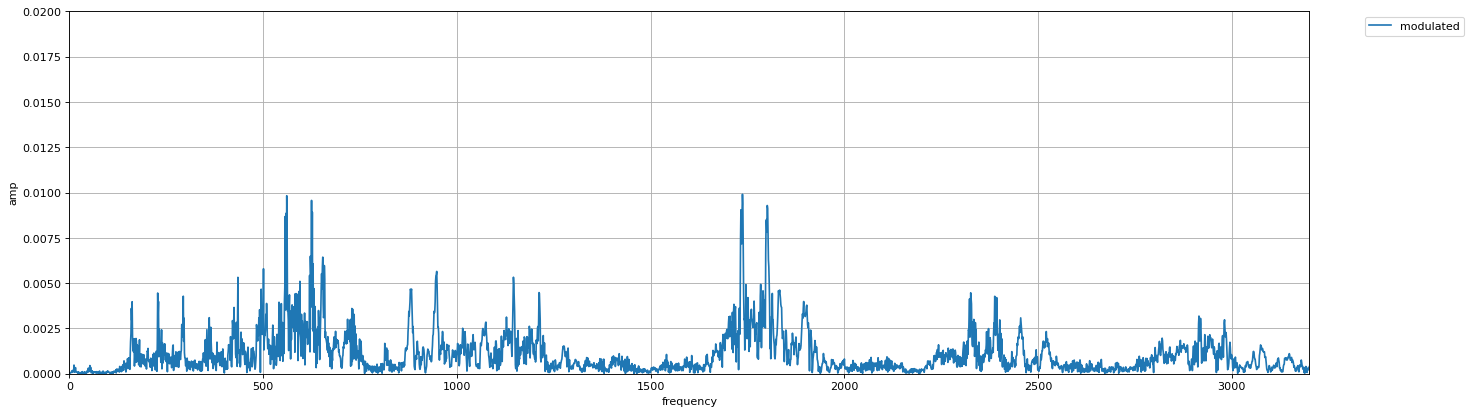

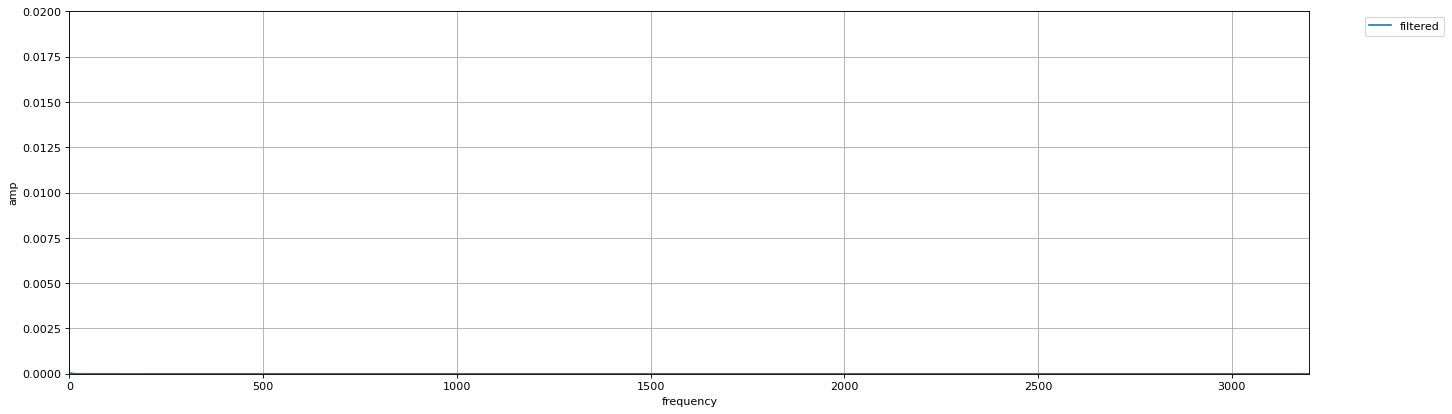

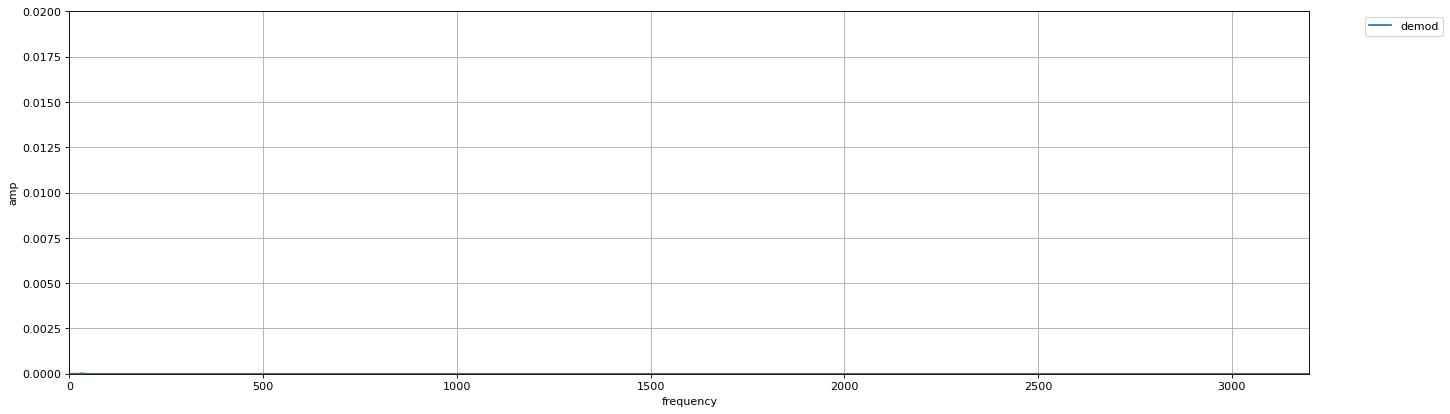

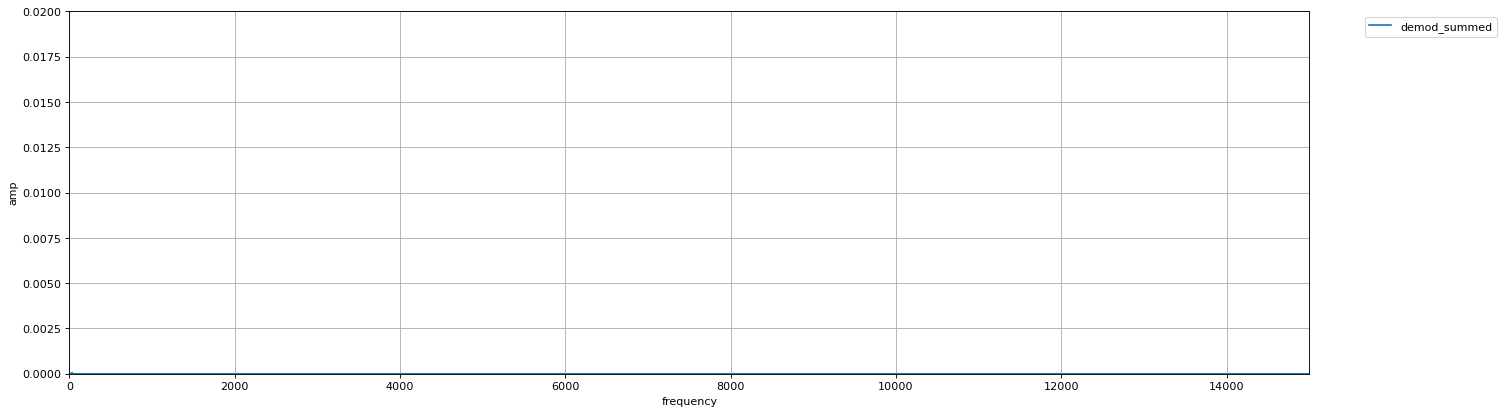

In [747]:
single_bank_fm = []

for i in range(8):
    single_bank_fm.append(starting_fm[6]/(2**i))
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])

for i in single_bank_fm:
    do_demodulation(audio, fs, i, 0.02, 1)

In [740]:
audio, sr = librosa.load('rhythms.wav')

In [ ]:
do_demodulation(audio, sr, f_modulation, 0.02, 1)